# Analysis of dynamic network ABM
Standard networks, no SDA yet

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import cProfile
import pstats
import mesa
pd.set_option('display.max_colwidth', 10000)
import joblib
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
from mesa.batchrunner import BatchRunner

/var/folders/53/cl5y6r2x7n5_942j6h59yyh00000gn/T/ipykernel_4447/4112914030.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#from model import ConsumatModel
from experiments_model import ConsumatModel

In [10]:
base_config = {
    'TP_percentage': 0.43,
    'tp_introduction_rate': 0.1,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'homophily_attribute': 'weight_social',  # Attribute to use for homophily
    'tolerance': 0.5,  # Tolerance range for homophily
    'seed': 42  # Seed for reproducibility
}

# Configuration for Watts-Strogatz network
watts_strogatz_config = base_config.copy()
watts_strogatz_config.update({
    'network_type': 'watts_strogatz',
    'network_params': {
        'n': 1600,
        'k': 8,
        'p': 0.3
    }
})


# Configuration for Barabasi-Albert network
barabasi_albert_config = base_config.copy()
barabasi_albert_config.update({
    'network_type': 'barabasi_albert',
    'network_params': {
        'n': 1600,
        'm': 8
    }
})

# Configuration for Random Regular network
random_regular_config = base_config.copy()
random_regular_config.update({
    'network_type': 'random_regular',
    'network_params': {
        'n': 1600,
        'd': 8
    }
})

# Configuration for Holme-Kim network
holme_kim_config = base_config.copy()
holme_kim_config.update({
    'network_type': 'holme_kim',
    'network_params': {
        'n': 1600,
        'm': 8,
        'p': 0.3
    }
})


## Network topology

### Watts-Strogatz Network
- **Type:** Small-world network
- **Known For:** High clustering coefficient and short average path lengths, which mimic many real-world social networks.
- **Formation:** Starts with a ring of `n` nodes each connected to `k` nearest neighbors. Rewires each edge with probability `p` to a randomly chosen node.
- **Key Parameters:**
  - `n`: Number of nodes
  - `k`: Number of nearest neighbors in the initial ring topology
  - `p`: Probability of rewiring each edge

### Barabasi-Albert Network
- **Type:** Scale-free network
- **Known For:** Its degree distribution follows a power law, which is typical for many large networks such as the internet, citation networks, and some social networks.
- **Formation:** Begins with a small number of nodes and adds new nodes one at a time. Each new node is connected to `k` existing nodes with a probability that depends on the number of links that the existing nodes already have.
- **Key Parameters:**
  - `n`: Total number of nodes
  - `m`: Number of edges to attach from a new node to existing nodes

### Random Regular Network
- **Type:** Regular graph
- **Known For:** Every node has the same number of connections. This uniformity can represent idealized conditions in network modeling.
- **Formation:** Constructed by connecting each node with `d` neighbors chosen at random, ensuring each has the same degree, while avoiding self-loops and duplicate edges.
- **Key Parameters:**
  - `n`: Total number of nodes
  - `d`: Degree of each node

### Holme-Kim Network
- **Type:** Small-world network with scale-free properties
- **Known For:** Combines high clustering and short path lengths (like Watts-Strogatz) with a degree distribution that follows a power law (like Barabasi-Albert).
- **Formation:** Starts like the Barabasi-Albert model by adding one node at a time, connecting to `m` existing nodes based on their degree. After each edge creation, with probability `p` adds an additional edge forming a triangle.
- **Key Parameters:**
  - `n`: Total number of nodes
  - `m`: Number of edges each new node will attempt to make
  - `p`: Triad formation probability



Running simulations for Watts-Strogatz network...


Simulation Progress:  20%|██        | 3/15 [00:06<00:24,  2.03s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  27%|██▋       | 4/15 [00:08<00:22,  2.05s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  33%|███▎      | 5/15 [00:10<00:20,  2.04s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  40%|████      | 6/15 [00:12<00:18,  2.05s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  47%|████▋     | 7/15 [00:14<00:16,  2.07s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  53%|█████▎    | 8/15 [00:16<00:14,  2.08s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  60%|██████    | 9/15 [00:18<00:12,  2.06s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  67%|██████▋   | 10/15 [00:20<00:10,  2.04s/it]

Time step 10: 8 True Price products available.


Simulation Progress:  73%|███████▎  | 11/15 [00:22<00:08,  2.04s/it]

Time step 11: 8 True Price products available.


Simulation Progress:  80%|████████  | 12/15 [00:24<00:06,  2.04s/it]

Time step 12: 8 True Price products available.


Simulation Progress:  87%|████████▋ | 13/15 [00:26<00:04,  2.03s/it]

Time step 13: 8 True Price products available.


Simulation Progress:  93%|█████████▎| 14/15 [00:28<00:02,  2.01s/it]

Time step 14: 8 True Price products available.


Simulation Progress: 100%|██████████| 15/15 [00:30<00:00,  2.03s/it]


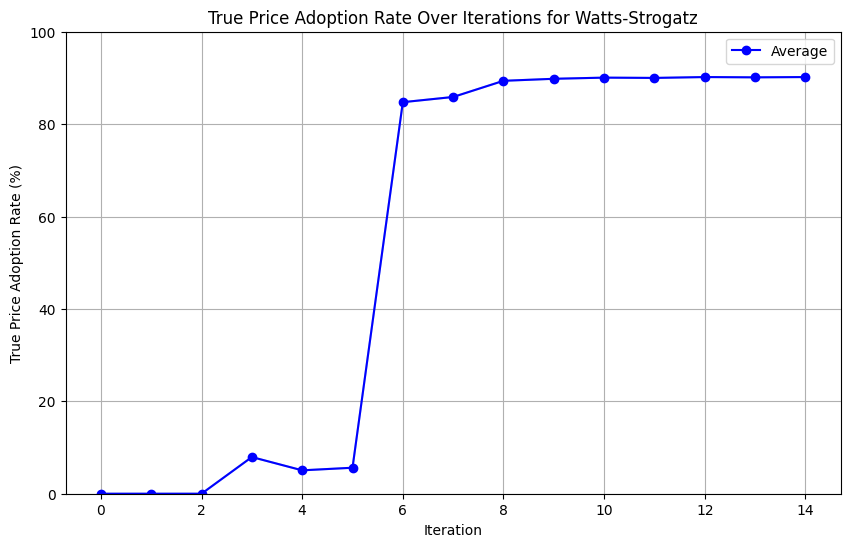

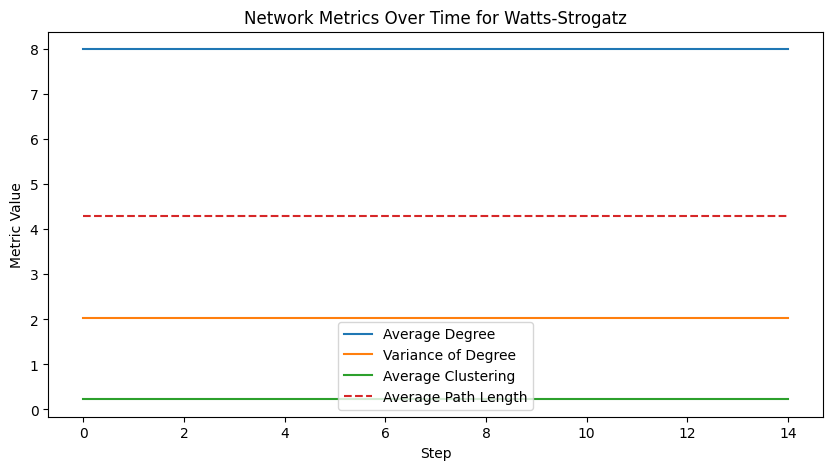

Running simulations for Barabasi-Albert network...


Simulation Progress:  20%|██        | 3/15 [00:06<00:25,  2.10s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  27%|██▋       | 4/15 [00:08<00:22,  2.07s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  33%|███▎      | 5/15 [00:10<00:20,  2.08s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  40%|████      | 6/15 [00:12<00:18,  2.07s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  47%|████▋     | 7/15 [00:14<00:16,  2.07s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  53%|█████▎    | 8/15 [00:16<00:14,  2.09s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  60%|██████    | 9/15 [00:18<00:12,  2.08s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  67%|██████▋   | 10/15 [00:20<00:10,  2.09s/it]

Time step 10: 8 True Price products available.


Simulation Progress:  73%|███████▎  | 11/15 [00:22<00:08,  2.09s/it]

Time step 11: 8 True Price products available.


Simulation Progress:  80%|████████  | 12/15 [00:25<00:06,  2.10s/it]

Time step 12: 8 True Price products available.


Simulation Progress:  87%|████████▋ | 13/15 [00:27<00:04,  2.10s/it]

Time step 13: 8 True Price products available.


Simulation Progress:  93%|█████████▎| 14/15 [00:29<00:02,  2.11s/it]

Time step 14: 8 True Price products available.


Simulation Progress: 100%|██████████| 15/15 [00:31<00:00,  2.11s/it]


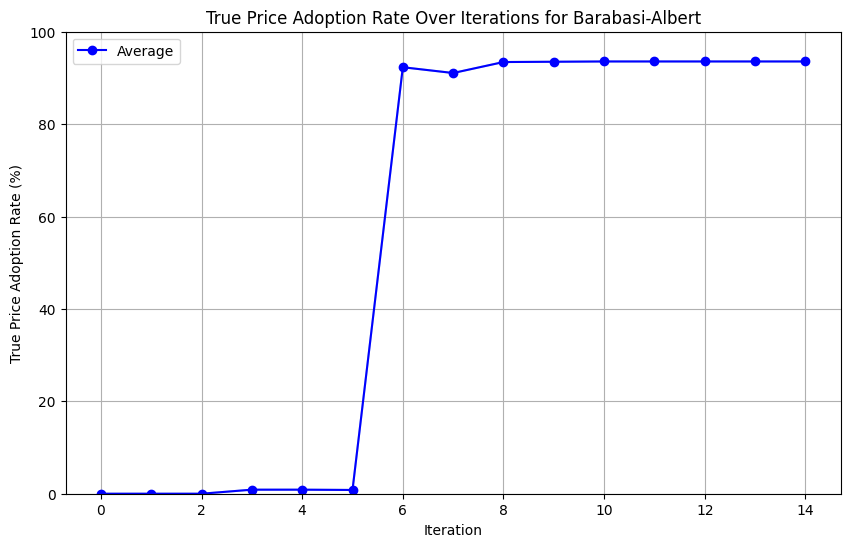

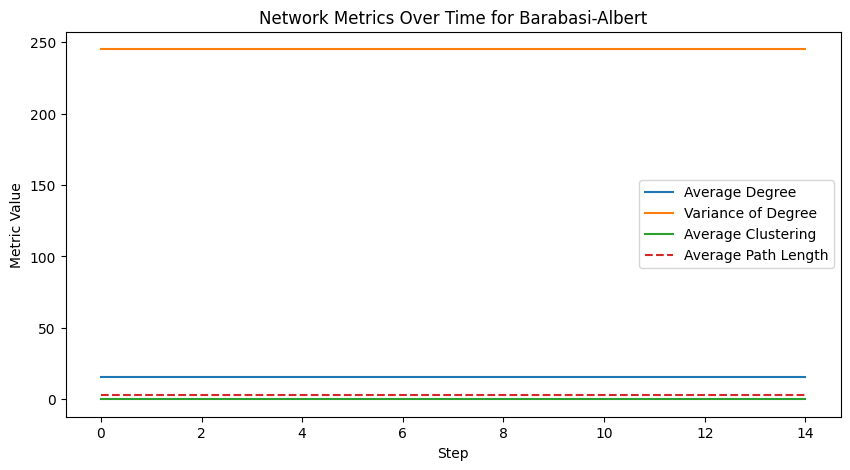

Running simulations for Random Regular network...


Simulation Progress:  20%|██        | 3/15 [00:06<00:24,  2.02s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  27%|██▋       | 4/15 [00:07<00:21,  1.96s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  33%|███▎      | 5/15 [00:09<00:19,  1.94s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  40%|████      | 6/15 [00:11<00:17,  1.94s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  47%|████▋     | 7/15 [00:13<00:15,  1.93s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  53%|█████▎    | 8/15 [00:15<00:13,  1.91s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  60%|██████    | 9/15 [00:17<00:11,  1.91s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  67%|██████▋   | 10/15 [00:19<00:09,  1.89s/it]

Time step 10: 8 True Price products available.


Simulation Progress:  73%|███████▎  | 11/15 [00:21<00:07,  1.87s/it]

Time step 11: 8 True Price products available.


Simulation Progress:  80%|████████  | 12/15 [00:22<00:05,  1.87s/it]

Time step 12: 8 True Price products available.


Simulation Progress:  87%|████████▋ | 13/15 [00:24<00:03,  1.86s/it]

Time step 13: 8 True Price products available.


Simulation Progress:  93%|█████████▎| 14/15 [00:26<00:01,  1.86s/it]

Time step 14: 8 True Price products available.


Simulation Progress: 100%|██████████| 15/15 [00:28<00:00,  1.90s/it]


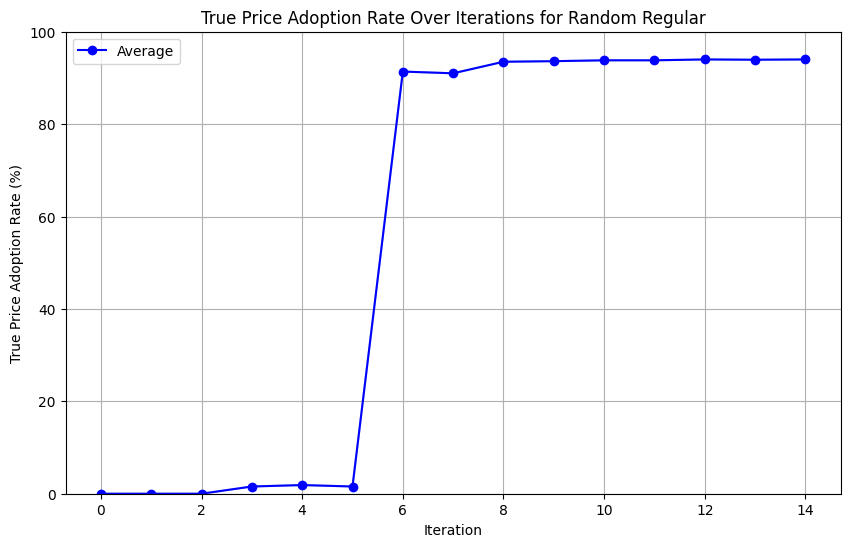

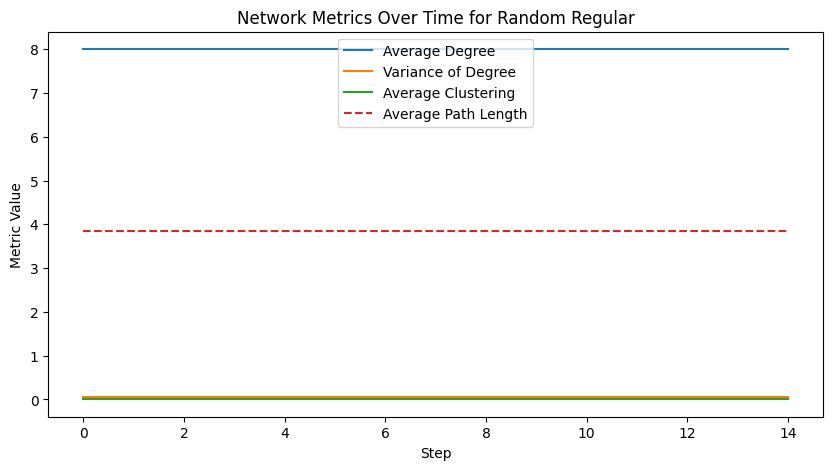

Running simulations for Holme-Kim network...


Simulation Progress:  20%|██        | 3/15 [00:06<00:25,  2.12s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  27%|██▋       | 4/15 [00:08<00:23,  2.11s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  33%|███▎      | 5/15 [00:10<00:21,  2.12s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  40%|████      | 6/15 [00:12<00:19,  2.12s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  47%|████▋     | 7/15 [00:14<00:16,  2.11s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  53%|█████▎    | 8/15 [00:16<00:14,  2.12s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  60%|██████    | 9/15 [00:19<00:12,  2.13s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  67%|██████▋   | 10/15 [00:21<00:10,  2.16s/it]

Time step 10: 8 True Price products available.


Simulation Progress:  73%|███████▎  | 11/15 [00:23<00:08,  2.16s/it]

Time step 11: 8 True Price products available.


Simulation Progress:  80%|████████  | 12/15 [00:25<00:06,  2.16s/it]

Time step 12: 8 True Price products available.


Simulation Progress:  87%|████████▋ | 13/15 [00:27<00:04,  2.16s/it]

Time step 13: 8 True Price products available.


Simulation Progress:  93%|█████████▎| 14/15 [00:29<00:02,  2.15s/it]

Time step 14: 8 True Price products available.


Simulation Progress: 100%|██████████| 15/15 [00:32<00:00,  2.14s/it]


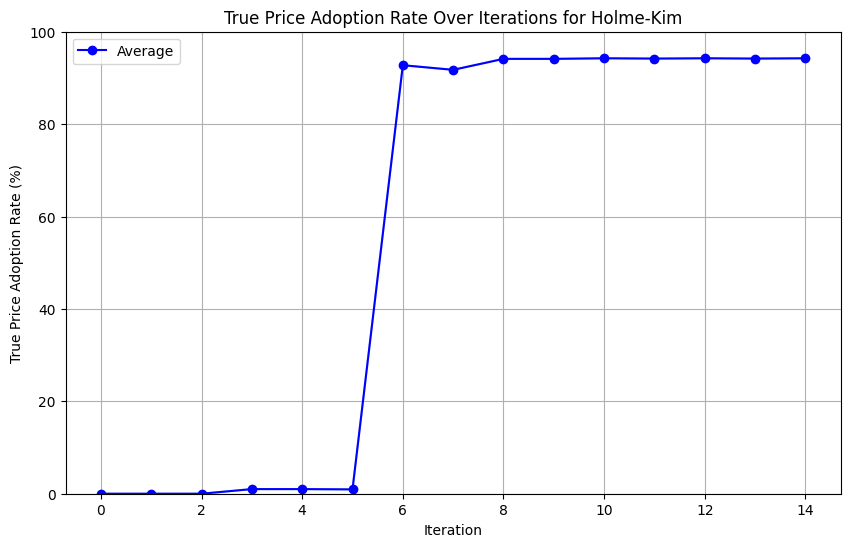

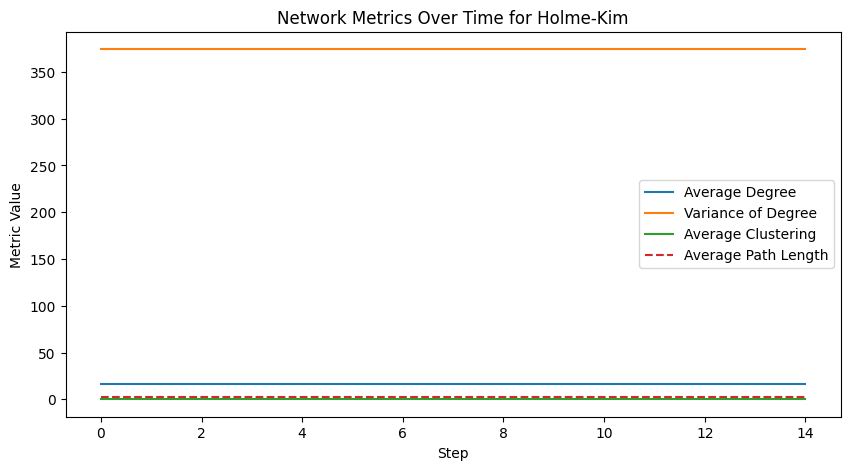

Simulation Progress:  20%|██        | 3/15 [00:06<00:25,  2.16s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  27%|██▋       | 4/15 [00:08<00:23,  2.16s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  33%|███▎      | 5/15 [00:10<00:21,  2.14s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  40%|████      | 6/15 [00:12<00:19,  2.13s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  47%|████▋     | 7/15 [00:15<00:17,  2.14s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  53%|█████▎    | 8/15 [00:17<00:15,  2.16s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  60%|██████    | 9/15 [00:19<00:13,  2.18s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  67%|██████▋   | 10/15 [00:21<00:10,  2.18s/it]

Time step 10: 8 True Price products available.


Simulation Progress:  73%|███████▎  | 11/15 [00:23<00:08,  2.20s/it]

Time step 11: 8 True Price products available.


Simulation Progress:  80%|████████  | 12/15 [00:26<00:06,  2.25s/it]

Time step 12: 8 True Price products available.


Simulation Progress:  87%|████████▋ | 13/15 [00:28<00:04,  2.25s/it]

Time step 13: 8 True Price products available.


Simulation Progress:  93%|█████████▎| 14/15 [00:30<00:02,  2.25s/it]

Time step 14: 8 True Price products available.


Simulation Progress: 100%|██████████| 15/15 [00:32<00:00,  2.20s/it]


Decision Mode Counts for Watts-Strogatz network:
      Repeat  Imitate  Deliberate  Social_Compare
Step                                             
1        126      977         163             334
2        332      953          39             276
3        386      996          15             203
4        524      855          75             146
5        607      846          43             104
6        542      946          34              78
7       1143      148         164             145
8       1397       68         109              26
9       1444       70          66              20
10      1449       71          64              16
11      1451       70          62              17
12      1451       71          62              16
13      1451       70          62              17
14      1451       71          62              16
15      1451       70          62              17


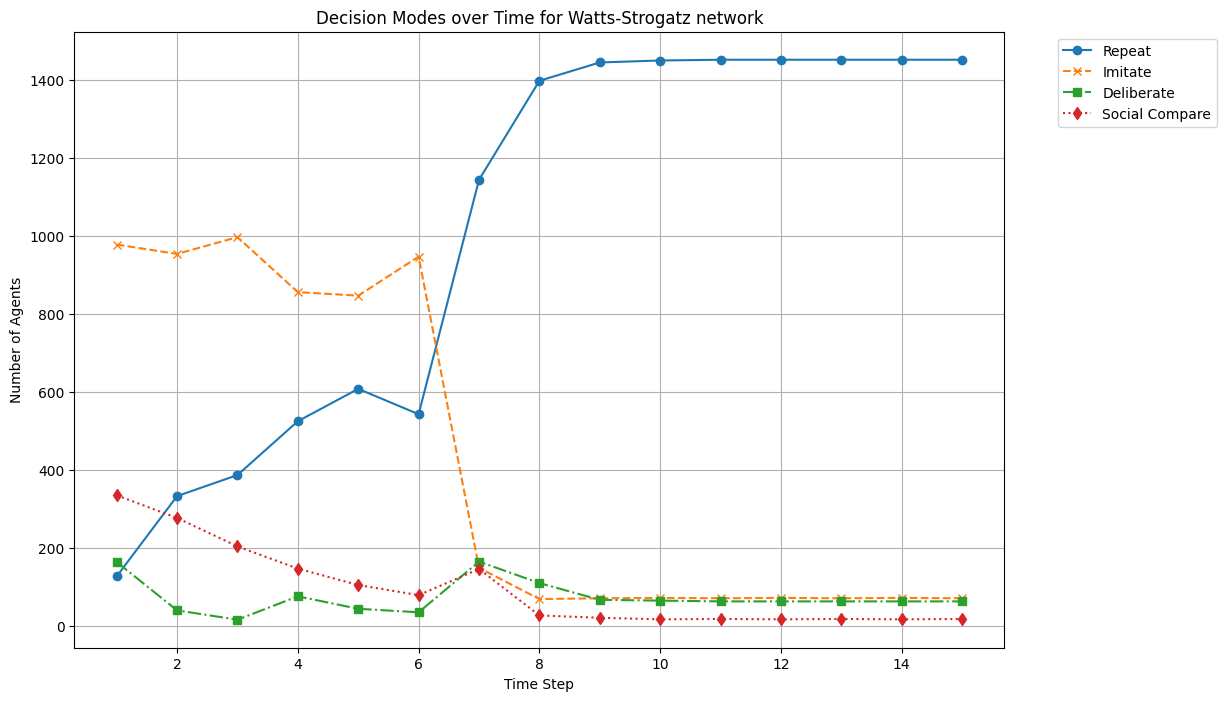

Simulation Progress:  20%|██        | 3/15 [00:07<00:30,  2.52s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  27%|██▋       | 4/15 [00:10<00:27,  2.50s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  33%|███▎      | 5/15 [00:12<00:24,  2.49s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  40%|████      | 6/15 [00:14<00:21,  2.43s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  47%|████▋     | 7/15 [00:17<00:19,  2.40s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  53%|█████▎    | 8/15 [00:19<00:16,  2.38s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  60%|██████    | 9/15 [00:21<00:14,  2.36s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  67%|██████▋   | 10/15 [00:24<00:11,  2.34s/it]

Time step 10: 8 True Price products available.


Simulation Progress:  73%|███████▎  | 11/15 [00:26<00:09,  2.33s/it]

Time step 11: 8 True Price products available.


Simulation Progress:  80%|████████  | 12/15 [00:28<00:06,  2.32s/it]

Time step 12: 8 True Price products available.


Simulation Progress:  87%|████████▋ | 13/15 [00:31<00:04,  2.32s/it]

Time step 13: 8 True Price products available.


Simulation Progress:  93%|█████████▎| 14/15 [00:33<00:02,  2.32s/it]

Time step 14: 8 True Price products available.


Simulation Progress: 100%|██████████| 15/15 [00:35<00:00,  2.38s/it]


Decision Mode Counts for Barabasi-Albert network:
      Repeat  Imitate  Deliberate  Social_Compare
Step                                             
1        126      977         163             334
2        336      968          30             266
3        429     1090           7              74
4        500     1037          20              43
5        553      992          14              41
6        506     1053          12              29
7       1246       77         199              78
8       1428       64          96              12
9       1462       67          60              11
10      1465       68          59               8
11      1467       67          57               9
12      1467       68          57               8
13      1467       67          57               9
14      1467       68          57               8
15      1467       67          57               9


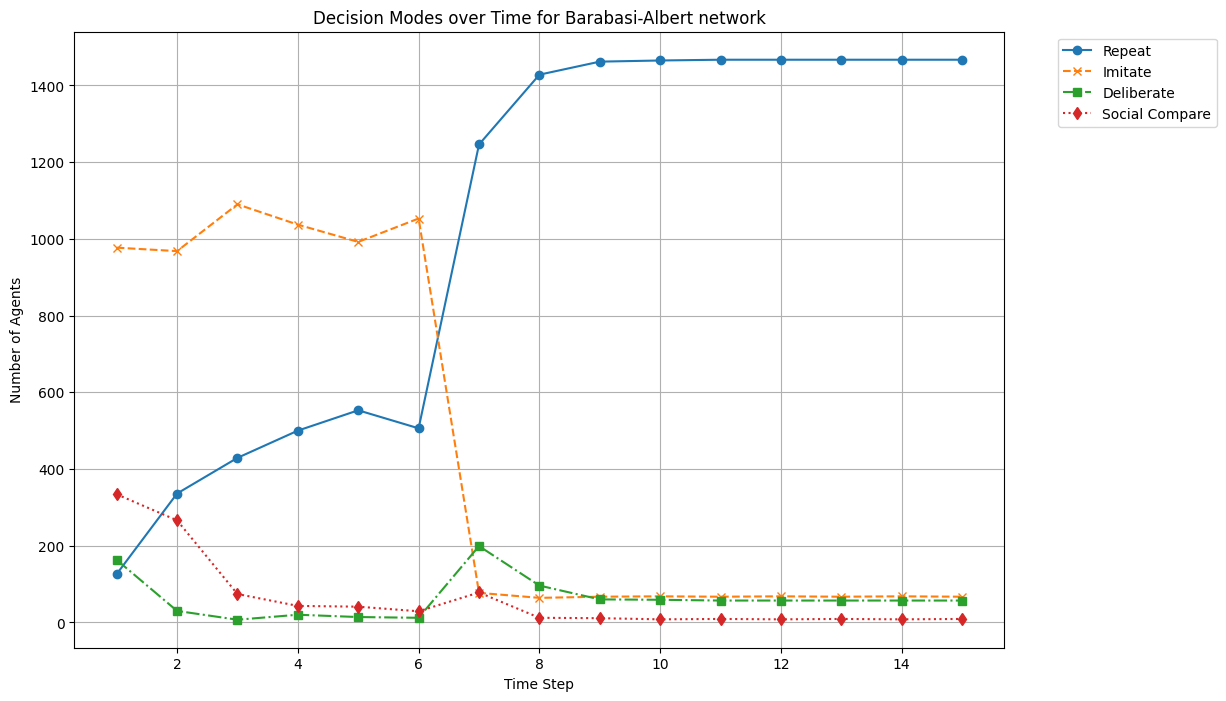

Simulation Progress:  20%|██        | 3/15 [00:06<00:24,  2.02s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  27%|██▋       | 4/15 [00:08<00:22,  2.02s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  33%|███▎      | 5/15 [00:10<00:20,  2.04s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  40%|████      | 6/15 [00:12<00:18,  2.05s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  47%|████▋     | 7/15 [00:14<00:16,  2.04s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  53%|█████▎    | 8/15 [00:16<00:14,  2.02s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  60%|██████    | 9/15 [00:18<00:12,  2.02s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  67%|██████▋   | 10/15 [00:20<00:10,  2.02s/it]

Time step 10: 8 True Price products available.


Simulation Progress:  73%|███████▎  | 11/15 [00:22<00:08,  2.01s/it]

Time step 11: 8 True Price products available.


Simulation Progress:  80%|████████  | 12/15 [00:24<00:06,  2.02s/it]

Time step 12: 8 True Price products available.


Simulation Progress:  87%|████████▋ | 13/15 [00:26<00:04,  2.01s/it]

Time step 13: 8 True Price products available.


Simulation Progress:  93%|█████████▎| 14/15 [00:28<00:02,  2.01s/it]

Time step 14: 8 True Price products available.


Simulation Progress: 100%|██████████| 15/15 [00:30<00:00,  2.02s/it]

Decision Mode Counts for Random Regular network:
      Repeat  Imitate  Deliberate  Social_Compare
Step                                             
1        126      977         163             334
2        345      936          37             282
3        412     1012          10             166
4        488     1022          23              67
5        548      985          21              46
6        506     1040          20              34
7       1215       83         175             127
8       1428       65          97              10
9       1464       66          61               9
10      1468       68          57               7
11      1468       67          57               8
12      1469       68          56               7
13      1469       67          56               8
14      1469       68          56               7
15      1469       67          56               8


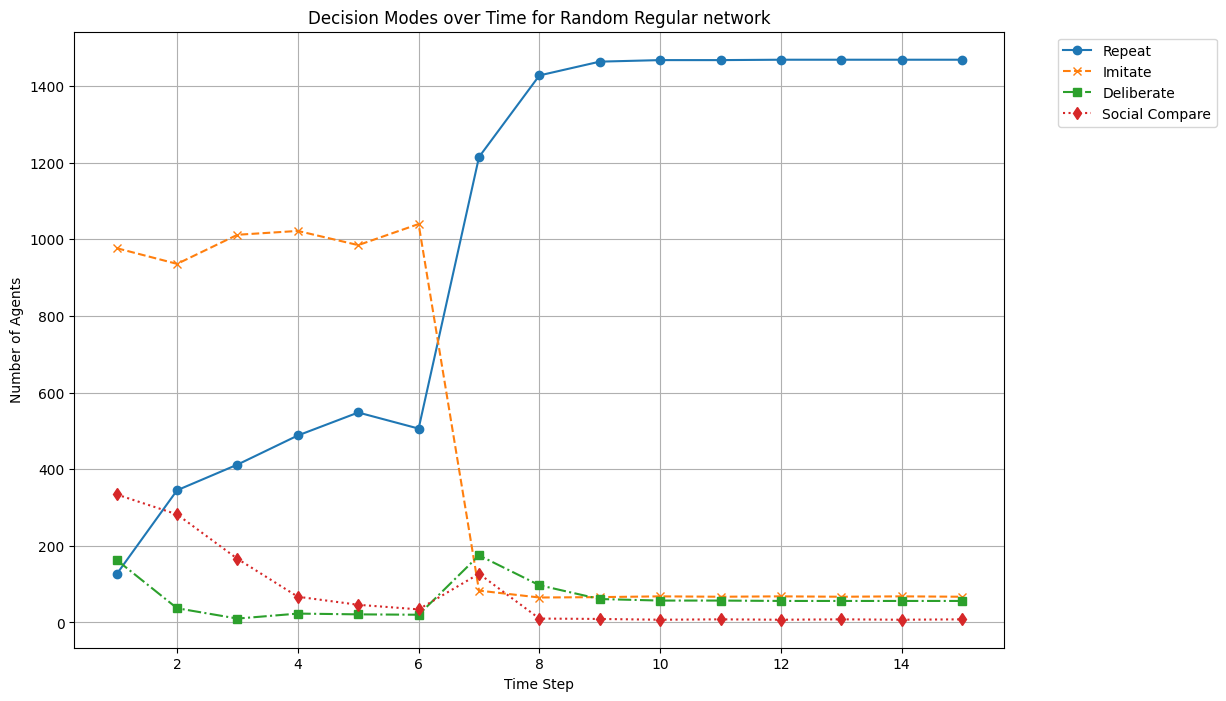

Simulation Progress:  20%|██        | 3/15 [00:06<00:27,  2.26s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  27%|██▋       | 4/15 [00:09<00:24,  2.27s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  33%|███▎      | 5/15 [00:11<00:22,  2.27s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  40%|████      | 6/15 [00:13<00:20,  2.26s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  47%|████▋     | 7/15 [00:15<00:18,  2.27s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  53%|█████▎    | 8/15 [00:18<00:16,  2.35s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  60%|██████    | 9/15 [00:20<00:14,  2.35s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  67%|██████▋   | 10/15 [00:23<00:11,  2.34s/it]

Time step 10: 8 True Price products available.


Simulation Progress:  73%|███████▎  | 11/15 [00:25<00:09,  2.32s/it]

Time step 11: 8 True Price products available.


Simulation Progress:  80%|████████  | 12/15 [00:27<00:07,  2.35s/it]

Time step 12: 8 True Price products available.


Simulation Progress:  87%|████████▋ | 13/15 [00:30<00:04,  2.32s/it]

Time step 13: 8 True Price products available.


Simulation Progress:  93%|█████████▎| 14/15 [00:32<00:02,  2.31s/it]

Time step 14: 8 True Price products available.


Simulation Progress: 100%|██████████| 15/15 [00:34<00:00,  2.30s/it]


Decision Mode Counts for Holme-Kim network:
      Repeat  Imitate  Deliberate  Social_Compare
Step                                             
1        126      977         163             334
2        336      902          45             317
3        429     1078           8              85
4        489     1056          20              35
5        585      963          17              35
6        541     1018          16              25
7       1248       85         170              97
8       1427       59          98              16
9       1461       63          59              17
10      1460       62          62              16
11      1461       62          60              17
12      1461       63          60              16
13      1461       62          60              17
14      1461       63          60              16
15      1461       62          60              17


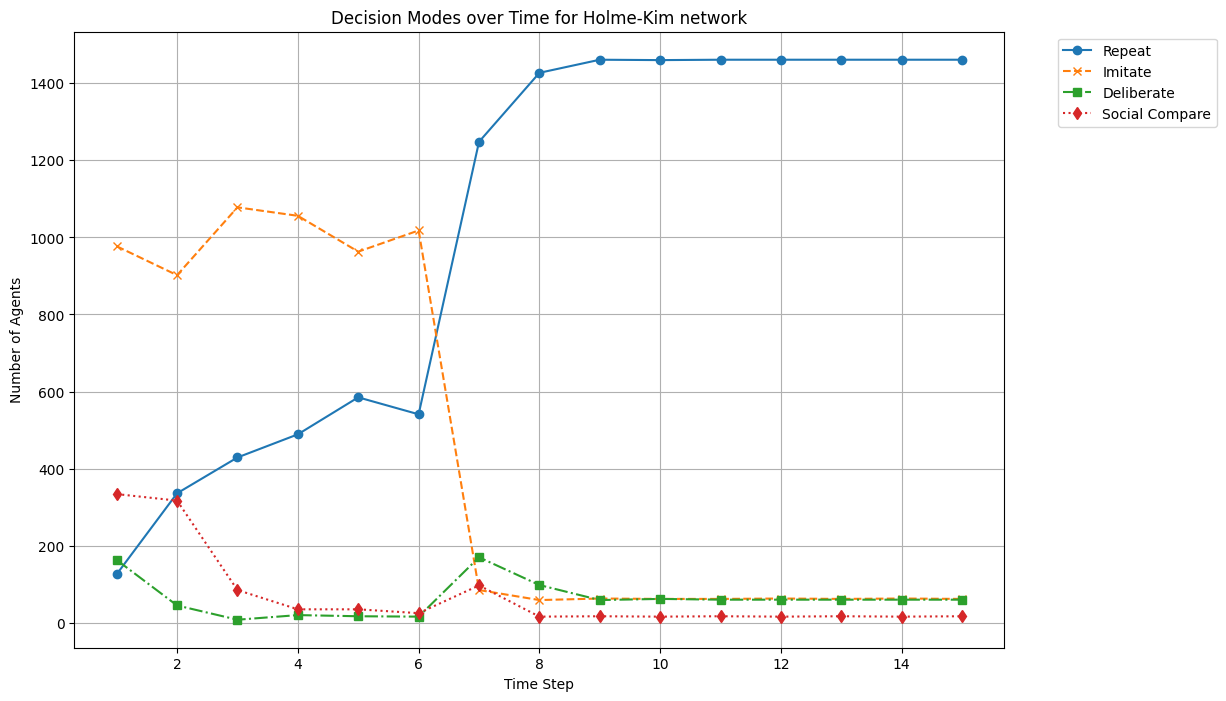

In [11]:
def run_simulation(model, num_steps):
    # List to store True Price Adoption Rates
    adoption_rates = []

    # Run the model for a specified number of steps with tqdm for progress tracking
    for _ in tqdm(range(num_steps), desc='Simulation Progress'):
        model.step()
        # Calculate and append the current adoption rate to the list
        current_adoption_rate = model.calculate_true_price_adoption_rate()
        adoption_rates.append(current_adoption_rate)

    # Retrieve collected data from the model's DataCollector
    model_data = model.datacollector.get_model_vars_dataframe()
    agent_data = model.datacollector.get_agent_vars_dataframe()
    # Append the adoption rates to the DataFrame
    model_data['Adoption Rates'] = adoption_rates

    return model_data, agent_data

def run_all_simulations(configurations, num_steps, num_simulations):
    results = {}
    for config_name, config in configurations.items():
        print(f"Running simulations for {config_name} network...")

        # Store all simulation data for the current configuration
        all_simulation_data = []
        
        # Loop over the number of simulations
        for simulation in range(num_simulations):
            # Initialize the model with the current configuration
            model = ConsumatModel(config)
            
            # Run the model and collect data
            model_data, agent_data = run_simulation(model, num_steps)
            all_simulation_data.append(model_data)

        # Aggregate results for plotting
        aggregated_data = pd.concat(all_simulation_data).groupby(level=0).mean()

        results[config_name] = aggregated_data

        # Plotting True Price Adoption Rates
        plt.figure(figsize=(10, 6))
        for sim_data in all_simulation_data:
            plt.plot(sim_data['Adoption Rates'], alpha=0.3)  # Plot individual simulations with transparency
        plt.plot(aggregated_data['Adoption Rates'], marker='o', color='b', label='Average')
        plt.title(f'True Price Adoption Rate Over Iterations for {config_name}')
        plt.xlabel('Iteration')
        plt.ylim(0,100)
        plt.ylabel('True Price Adoption Rate (%)')
        plt.grid(True)
        plt.legend()
        plt.show()

        # Plotting Network Metrics
        plt.figure(figsize=(10, 5))
        if 'Average Degree' in aggregated_data.columns:
            plt.plot(aggregated_data['Average Degree'], label='Average Degree')
        if 'Variance of Degree' in aggregated_data.columns:
            plt.plot(aggregated_data['Variance of Degree'], label='Variance of Degree')
        if 'Average Clustering' in aggregated_data.columns:
            plt.plot(aggregated_data['Average Clustering'], label='Average Clustering')
        if 'Average Path Length' in aggregated_data.columns:
            plt.plot(aggregated_data['Average Path Length'], label='Average Path Length', linestyle='--')
        plt.xlabel('Step')
        plt.ylabel('Metric Value')
        plt.title(f'Network Metrics Over Time for {config_name}')
        plt.legend()
        plt.show()

    return results

def generate_decision_modes_count(agent_data):
    decision_modes_count = agent_data.groupby(['Step'])[['Repeat', 'Imitate', 'Deliberate', 'Social_Compare']].sum()
    return decision_modes_count

# Example network configurations (replace with actual configurations)
network_configurations = {
    'Watts-Strogatz': watts_strogatz_config,
    'Barabasi-Albert': barabasi_albert_config,
    'Random Regular': random_regular_config,
    'Holme-Kim': holme_kim_config
}

# Define the number of simulations and steps
num_simulations = 1
num_steps = 15

# Run all simulations
results = run_all_simulations(network_configurations, num_steps, num_simulations)

# Generate and plot decision mode counts
for network_name, config in network_configurations.items():
    model = ConsumatModel(config)
    _, agent_data = run_simulation(model, num_steps)
    
    # Generate the decision modes count DataFrame
    decision_modes_count = generate_decision_modes_count(agent_data)
    print(f"Decision Mode Counts for {network_name} network:")
    print(decision_modes_count)

    # Plot the decision modes count over time
    plt.figure(figsize=(12, 8))
    plt.plot(decision_modes_count.index, decision_modes_count['Repeat'], label='Repeat', linestyle='-', marker='o')
    plt.plot(decision_modes_count.index, decision_modes_count['Imitate'], label='Imitate', linestyle='--', marker='x')
    plt.plot(decision_modes_count.index, decision_modes_count['Deliberate'], label='Deliberate', linestyle='-.', marker='s')
    plt.plot(decision_modes_count.index, decision_modes_count['Social_Compare'], label='Social Compare', linestyle=':', marker='d')
    plt.title(f'Decision Modes over Time for {network_name} network')
    plt.xlabel('Time Step')
    plt.ylabel('Number of Agents')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()


### Multiple runs of the same model:

Running simulations for Watts-Strogatz network...


Simulation Progress:  30%|███       | 3/10 [00:07<00:16,  2.41s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:09<00:14,  2.38s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:11<00:11,  2.35s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:14<00:09,  2.31s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:16<00:06,  2.27s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:18<00:04,  2.23s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:20<00:02,  2.24s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  30%|███       | 3/10 [00:06<00:15,  2.23s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:08<00:13,  2.20s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:11<00:11,  2.29s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:13<00:09,  2.32s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:15<00:06,  2.26s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:18<00:04,  2.24s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:20<00:02,  2.23s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  30%|███       | 3/10 [00:06<00:15,  2.24s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:09<00:13,  2.29s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:11<00:11,  2.25s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:13<00:09,  2.26s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:15<00:06,  2.30s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:18<00:04,  2.25s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:20<00:02,  2.23s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  30%|███       | 3/10 [00:06<00:15,  2.21s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:08<00:13,  2.21s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:10<00:10,  2.18s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:13<00:08,  2.18s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:15<00:06,  2.16s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:17<00:04,  2.15s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:19<00:02,  2.15s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  30%|███       | 3/10 [00:06<00:15,  2.16s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:08<00:12,  2.14s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:10<00:10,  2.13s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:12<00:08,  2.12s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:14<00:06,  2.11s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:17<00:04,  2.11s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:19<00:02,  2.11s/it]

Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


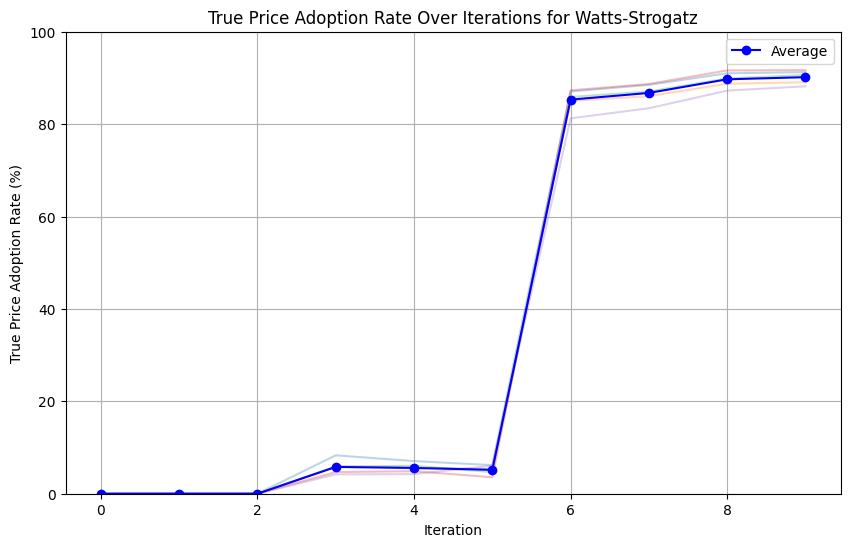

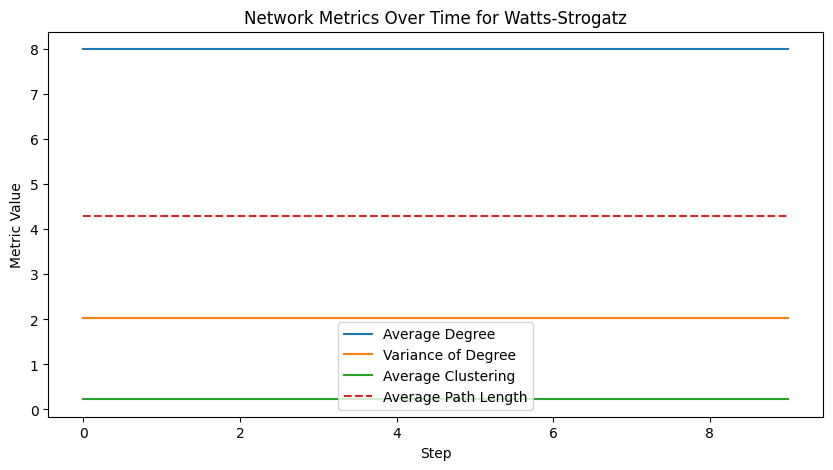

Running simulations for Barabasi-Albert network...


Simulation Progress:  30%|███       | 3/10 [00:07<00:17,  2.49s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:09<00:14,  2.39s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:12<00:11,  2.40s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:14<00:09,  2.38s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:17<00:07,  2.48s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:19<00:05,  2.54s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:22<00:02,  2.62s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  30%|███       | 3/10 [00:07<00:18,  2.58s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:10<00:15,  2.51s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:12<00:12,  2.54s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:15<00:10,  2.56s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:17<00:07,  2.52s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:20<00:05,  2.58s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:23<00:02,  2.65s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  30%|███       | 3/10 [00:07<00:16,  2.38s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:09<00:14,  2.46s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:12<00:12,  2.48s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:14<00:09,  2.45s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:17<00:07,  2.44s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:19<00:04,  2.45s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:22<00:02,  2.49s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  30%|███       | 3/10 [00:07<00:17,  2.43s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:09<00:14,  2.41s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:12<00:11,  2.40s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:14<00:09,  2.39s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:16<00:07,  2.39s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:19<00:04,  2.39s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:21<00:02,  2.38s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  30%|███       | 3/10 [00:07<00:16,  2.38s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:09<00:14,  2.38s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:11<00:11,  2.39s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:14<00:09,  2.43s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:17<00:07,  2.48s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:19<00:04,  2.47s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:21<00:02,  2.44s/it]

Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


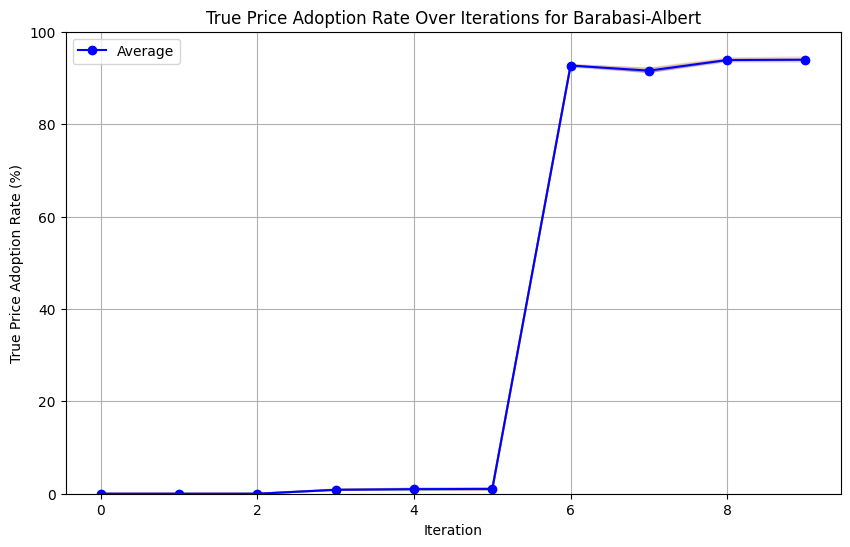

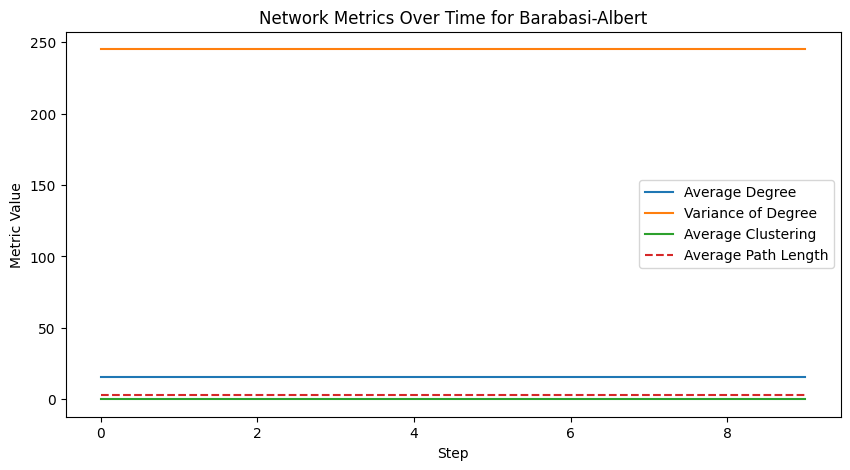

Running simulations for Random Regular network...


Simulation Progress:  30%|███       | 3/10 [00:06<00:14,  2.04s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:08<00:12,  2.04s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:10<00:10,  2.03s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:12<00:08,  2.02s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:14<00:06,  2.03s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:16<00:04,  2.01s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:18<00:02,  2.00s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  30%|███       | 3/10 [00:05<00:13,  1.98s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:07<00:11,  1.96s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:09<00:09,  1.97s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:11<00:07,  1.95s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:13<00:05,  1.99s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:16<00:04,  2.08s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:18<00:02,  2.07s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  30%|███       | 3/10 [00:06<00:15,  2.25s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:08<00:13,  2.21s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:10<00:10,  2.17s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:12<00:08,  2.11s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:15<00:06,  2.22s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:17<00:04,  2.15s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:19<00:02,  2.26s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  30%|███       | 3/10 [00:06<00:14,  2.02s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:08<00:11,  1.99s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:10<00:11,  2.22s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:12<00:08,  2.19s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:15<00:07,  2.41s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:18<00:05,  2.57s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:21<00:02,  2.68s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  30%|███       | 3/10 [00:06<00:14,  2.09s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:08<00:12,  2.04s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:10<00:10,  2.01s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:12<00:08,  2.01s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:14<00:06,  2.05s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:16<00:04,  2.10s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:18<00:02,  2.07s/it]

Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


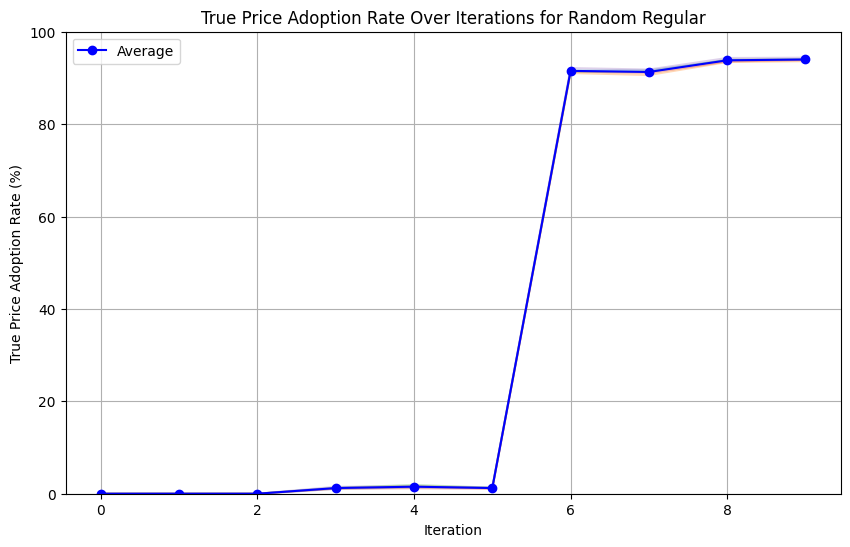

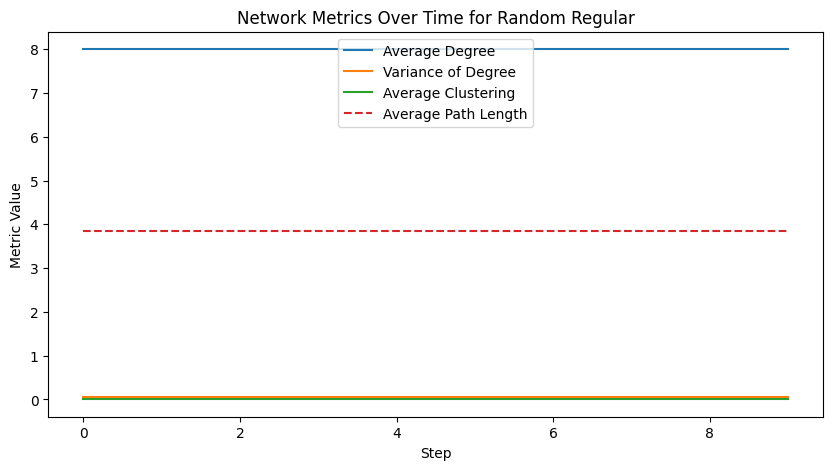

Running simulations for Holme-Kim network...


Simulation Progress:  30%|███       | 3/10 [00:07<00:16,  2.37s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:09<00:14,  2.35s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:11<00:11,  2.31s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:13<00:09,  2.29s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:16<00:06,  2.29s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:18<00:04,  2.29s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:20<00:02,  2.26s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  30%|███       | 3/10 [00:06<00:15,  2.24s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:08<00:13,  2.24s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:11<00:11,  2.25s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:14<00:09,  2.45s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:16<00:07,  2.44s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:19<00:05,  2.67s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:22<00:02,  2.83s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  30%|███       | 3/10 [00:07<00:16,  2.42s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:09<00:14,  2.47s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:12<00:13,  2.63s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:15<00:10,  2.63s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:17<00:07,  2.53s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:20<00:04,  2.48s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:22<00:02,  2.43s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  30%|███       | 3/10 [00:07<00:16,  2.39s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:09<00:14,  2.34s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:11<00:11,  2.33s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:14<00:09,  2.31s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:16<00:07,  2.34s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:18<00:04,  2.32s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:20<00:02,  2.29s/it]

Time step 9: 8 True Price products available.


Simulation Progress:  30%|███       | 3/10 [00:06<00:15,  2.28s/it]

Time step 3: 2 True Price products available.


Simulation Progress:  40%|████      | 4/10 [00:09<00:13,  2.27s/it]

Time step 4: 4 True Price products available.


Simulation Progress:  50%|█████     | 5/10 [00:11<00:11,  2.30s/it]

Time step 5: 6 True Price products available.


Simulation Progress:  60%|██████    | 6/10 [00:13<00:09,  2.28s/it]

Time step 6: 8 True Price products available.


Simulation Progress:  70%|███████   | 7/10 [00:15<00:06,  2.28s/it]

Time step 7: 8 True Price products available.


Simulation Progress:  80%|████████  | 8/10 [00:18<00:04,  2.31s/it]

Time step 8: 8 True Price products available.


Simulation Progress:  90%|█████████ | 9/10 [00:20<00:02,  2.28s/it]

Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


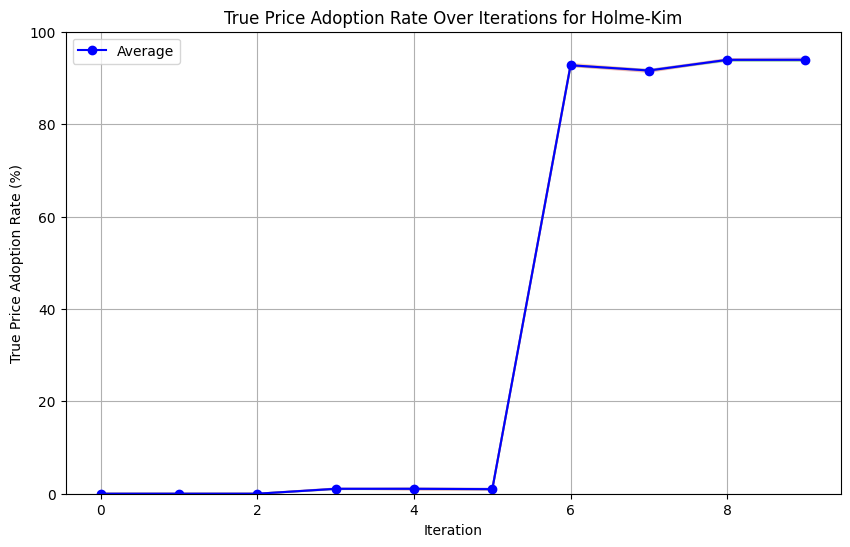

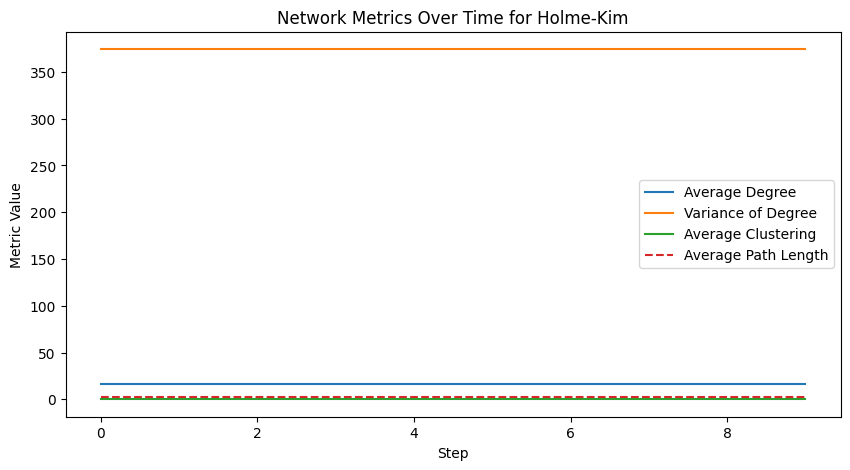

In [12]:
# Define the number of simulations and steps
num_simulations = 5
num_steps = 10

# Run all simulations
results = run_all_simulations(network_configurations, num_steps, num_simulations)

### Vary network parameters

Simulation Progress: 100%|██████████| 10/10 [00:25<00:00,  2.52s/it]


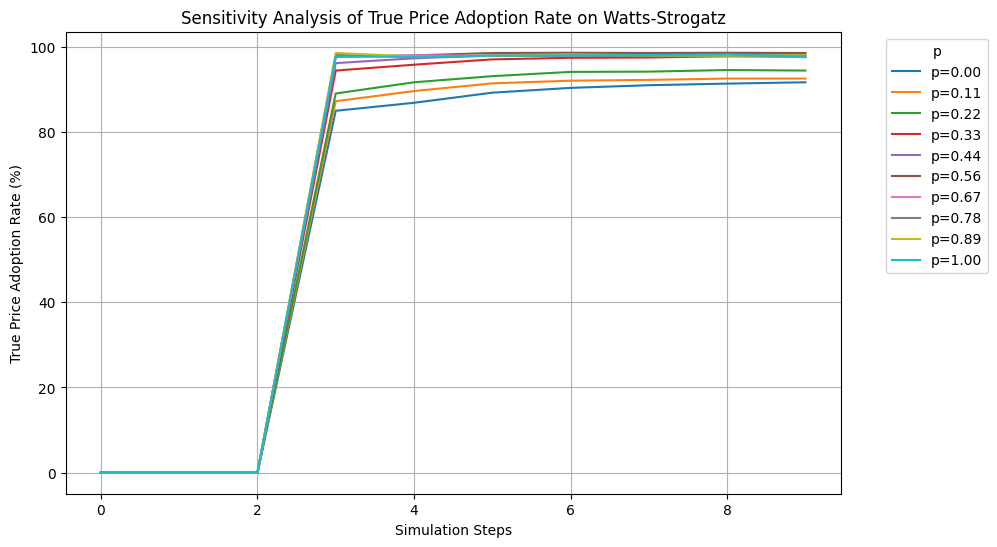

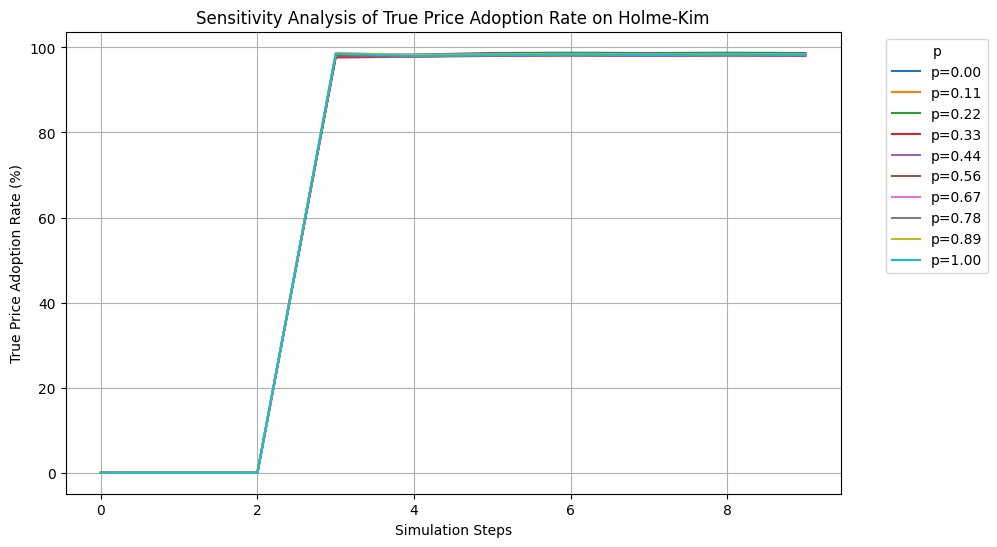

In [18]:
def run_simulation_with_varying_network_params(base_config, parameter_name, parameter_values, num_steps):
    all_results = {}
    for value in parameter_values:
        # Update the network parameter
        config = base_config.copy()
        config['network_params'][parameter_name] = value
        model = ConsumatModel(config)
        result, _ = run_simulation(model, num_steps)
        all_results[value] = result['Adoption Rates']
    return all_results


# Example for varying 'p' in a Watts-Strogatz network
parameter_name = 'p'
parameter_values = np.linspace(0, 1, 10)
num_steps = 10

watts_strogatz_results = run_simulation_with_varying_network_params(
    watts_strogatz_config,
    parameter_name,
    parameter_values,
    num_steps
)

holme_kim_results = run_simulation_with_varying_network_params(
    holme_kim_config,
    parameter_name,
    parameter_values,
    num_steps
)

# Plot the results for Watts-Strogatz
plt.figure(figsize=(10, 6))
for value, adoption_rates in watts_strogatz_results.items():
    plt.plot(range(num_steps), adoption_rates, label=f'{parameter_name}={value:.2f}')
plt.title('Sensitivity Analysis of True Price Adoption Rate on Watts-Strogatz')
plt.xlabel('Simulation Steps')
plt.ylabel('True Price Adoption Rate (%)')
plt.legend(title=parameter_name, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Plot the results for Holme-Kim
plt.figure(figsize=(10, 6))
for value, adoption_rates in holme_kim_results.items():
    plt.plot(range(num_steps), adoption_rates, label=f'{parameter_name}={value:.2f}')
plt.title('Sensitivity Analysis of True Price Adoption Rate on Holme-Kim')
plt.xlabel('Simulation Steps')
plt.ylabel('True Price Adoption Rate (%)')
plt.legend(title=parameter_name, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Vary True Price percentage

Running simulations for Watts-Strogatz network with introduction rate 0.2...


TP Percentage Progress for rate 0.2:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:   9%|▉         | 1/11 [00:32<05:29, 32.93s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:  18%|█▊        | 2/11 [01:07<05:02, 33.66s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:  27%|██▋       | 3/11 [01:40<04:27, 33.40s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:  36%|███▋      | 4/11 [02:12<03:51, 33.08s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:  45%|████▌     | 5/11 [02:45<03:18, 33.03s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  55%|█████▍    | 6/11 [03:18<02:44, 32.90s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  64%|██████▎   | 7/11 [03:50<02:11, 32.78s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  73%|███████▎  | 8/11 [04:23<01:38, 32.84s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  82%|████████▏ | 9/11 [04:56<01:05, 32.79s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  91%|█████████ | 10/11 [05:29<00:32, 32.73s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


TP Percentage Progress for rate 0.2: 100%|██████████| 11/11 [06:01<00:00, 32.89s/it]


Running simulations for Watts-Strogatz network with introduction rate 0.4...


TP Percentage Progress for rate 0.4:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:   9%|▉         | 1/11 [00:32<05:26, 32.70s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:  18%|█▊        | 2/11 [01:04<04:51, 32.43s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:  27%|██▋       | 3/11 [01:38<04:23, 32.99s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:  36%|███▋      | 4/11 [02:12<03:53, 33.31s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:  45%|████▌     | 5/11 [02:44<03:18, 33.04s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  55%|█████▍    | 6/11 [03:18<02:45, 33.18s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  64%|██████▎   | 7/11 [03:51<02:12, 33.06s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  73%|███████▎  | 8/11 [04:23<01:38, 32.90s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  82%|████████▏ | 9/11 [04:56<01:05, 32.74s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  91%|█████████ | 10/11 [05:28<00:32, 32.64s/it]

Time step 3: 8 True Price products available.


Time step 4: 10 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


TP Percentage Progress for rate 0.4: 100%|██████████| 11/11 [06:00<00:00, 32.81s/it]


Running simulations for Watts-Strogatz network with introduction rate 0.6000000000000001...


TP Percentage Progress for rate 0.6000000000000001:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:32<00:00,  3.20s/it]
TP Percentage Progress for rate 0.6000000000000001:   9%|▉         | 1/11 [00:32<05:28, 32.80s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:31<00:00,  3.18s/it]
TP Percentage Progress for rate 0.6000000000000001:  18%|█▊        | 2/11 [01:05<04:52, 32.55s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:31<00:00,  3.19s/it]
TP Percentage Progress for rate 0.6000000000000001:  27%|██▋       | 3/11 [01:37<04:19, 32.49s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:32<00:00,  3.20s/it]
TP Percentage Progress for rate 0.6000000000000001:  36%|███▋      | 4/11 [02:10<03:47, 32.52s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:31<00:00,  3.19s/it]
TP Percentage Progress for rate 0.6000000000000001:  45%|████▌     | 5/11 [02:42<03:14, 32.50s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:31<00:00,  3.18s/it]
TP Percentage Progress for rate 0.6000000000000001:  55%|█████▍    | 6/11 [03:14<02:42, 32.43s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:31<00:00,  3.17s/it]
TP Percentage Progress for rate 0.6000000000000001:  64%|██████▎   | 7/11 [03:47<02:09, 32.37s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:32<00:00,  3.21s/it]
TP Percentage Progress for rate 0.6000000000000001:  73%|███████▎  | 8/11 [04:19<01:37, 32.46s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:32<00:00,  3.24s/it]
TP Percentage Progress for rate 0.6000000000000001:  82%|████████▏ | 9/11 [04:52<01:05, 32.61s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:31<00:00,  3.19s/it]
TP Percentage Progress for rate 0.6000000000000001:  91%|█████████ | 10/11 [05:25<00:32, 32.57s/it]

Time step 3: 10 True Price products available.


Time step 4: 10 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:31<00:00,  3.20s/it]
TP Percentage Progress for rate 0.6000000000000001: 100%|██████████| 11/11 [05:57<00:00, 32.52s/it]


Running simulations for Watts-Strogatz network with introduction rate 0.8...


TP Percentage Progress for rate 0.8:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:   9%|▉         | 1/11 [00:34<05:45, 34.53s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:  18%|█▊        | 2/11 [01:07<05:02, 33.65s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:  27%|██▋       | 3/11 [01:40<04:25, 33.24s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:  36%|███▋      | 4/11 [02:12<03:50, 32.89s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:  45%|████▌     | 5/11 [02:45<03:16, 32.83s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  55%|█████▍    | 6/11 [03:18<02:44, 32.83s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  64%|██████▎   | 7/11 [03:50<02:10, 32.72s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  73%|███████▎  | 8/11 [04:23<01:37, 32.64s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  82%|████████▏ | 9/11 [04:55<01:05, 32.66s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  91%|█████████ | 10/11 [05:28<00:32, 32.66s/it]

Time step 3: 10 True Price products available.


Time step 4: 10 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


TP Percentage Progress for rate 0.8: 100%|██████████| 11/11 [06:00<00:00, 32.81s/it]


Running simulations for Watts-Strogatz network with introduction rate 1.0...


TP Percentage Progress for rate 1.0:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:   9%|▉         | 1/11 [00:32<05:27, 32.72s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:  18%|█▊        | 2/11 [01:05<04:55, 32.85s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:  27%|██▋       | 3/11 [01:39<04:25, 33.23s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:  36%|███▋      | 4/11 [02:12<03:52, 33.21s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:  45%|████▌     | 5/11 [02:46<03:20, 33.34s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  55%|█████▍    | 6/11 [03:18<02:44, 32.90s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  64%|██████▎   | 7/11 [03:51<02:11, 32.96s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  73%|███████▎  | 8/11 [04:23<01:38, 32.78s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  82%|████████▏ | 9/11 [04:56<01:05, 32.83s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  91%|█████████ | 10/11 [05:29<00:32, 32.95s/it]

Time step 3: 10 True Price products available.


Time step 4: 10 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


TP Percentage Progress for rate 1.0: 100%|██████████| 11/11 [06:02<00:00, 33.00s/it]


Running simulations for Barabasi-Albert network with introduction rate 0.2...


TP Percentage Progress for rate 0.2:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:   9%|▉         | 1/11 [00:34<05:49, 34.97s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:  18%|█▊        | 2/11 [01:09<05:12, 34.69s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:  27%|██▋       | 3/11 [01:45<04:40, 35.08s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:  36%|███▋      | 4/11 [02:19<04:02, 34.67s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:  45%|████▌     | 5/11 [02:53<03:27, 34.61s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  55%|█████▍    | 6/11 [03:29<02:54, 34.93s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  64%|██████▎   | 7/11 [04:03<02:19, 34.86s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  73%|███████▎  | 8/11 [04:39<01:45, 35.09s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  82%|████████▏ | 9/11 [05:14<01:10, 35.04s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  91%|█████████ | 10/11 [05:49<00:35, 35.12s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


TP Percentage Progress for rate 0.2: 100%|██████████| 11/11 [06:24<00:00, 35.00s/it]


Running simulations for Barabasi-Albert network with introduction rate 0.4...


TP Percentage Progress for rate 0.4:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:   9%|▉         | 1/11 [00:34<05:41, 34.20s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:  18%|█▊        | 2/11 [01:09<05:12, 34.67s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:  27%|██▋       | 3/11 [01:43<04:35, 34.47s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:  36%|███▋      | 4/11 [02:18<04:01, 34.55s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:  45%|████▌     | 5/11 [02:52<03:27, 34.57s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  55%|█████▍    | 6/11 [03:26<02:52, 34.47s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  64%|██████▎   | 7/11 [04:01<02:17, 34.48s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  73%|███████▎  | 8/11 [04:35<01:43, 34.38s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  82%|████████▏ | 9/11 [05:09<01:08, 34.36s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  91%|█████████ | 10/11 [05:44<00:34, 34.46s/it]

Time step 3: 8 True Price products available.


Time step 4: 10 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


TP Percentage Progress for rate 0.4: 100%|██████████| 11/11 [06:19<00:00, 34.50s/it]


Running simulations for Barabasi-Albert network with introduction rate 0.6000000000000001...


TP Percentage Progress for rate 0.6000000000000001:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.38s/it]
TP Percentage Progress for rate 0.6000000000000001:   9%|▉         | 1/11 [00:34<05:45, 34.57s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.39s/it]
TP Percentage Progress for rate 0.6000000000000001:  18%|█▊        | 2/11 [01:09<05:11, 34.64s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.38s/it]
TP Percentage Progress for rate 0.6000000000000001:  27%|██▋       | 3/11 [01:43<04:36, 34.62s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:34<00:00,  3.50s/it]
TP Percentage Progress for rate 0.6000000000000001:  36%|███▋      | 4/11 [02:19<04:05, 35.09s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.37s/it]
TP Percentage Progress for rate 0.6000000000000001:  45%|████▌     | 5/11 [02:54<03:29, 34.89s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:34<00:00,  3.48s/it]
TP Percentage Progress for rate 0.6000000000000001:  55%|█████▍    | 6/11 [03:29<02:55, 35.15s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.37s/it]
TP Percentage Progress for rate 0.6000000000000001:  64%|██████▎   | 7/11 [04:04<02:19, 34.94s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.37s/it]
TP Percentage Progress for rate 0.6000000000000001:  73%|███████▎  | 8/11 [04:38<01:44, 34.80s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.36s/it]
TP Percentage Progress for rate 0.6000000000000001:  82%|████████▏ | 9/11 [05:13<01:09, 34.67s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.38s/it]
TP Percentage Progress for rate 0.6000000000000001:  91%|█████████ | 10/11 [05:47<00:34, 34.66s/it]

Time step 3: 10 True Price products available.


Time step 4: 10 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:34<00:00,  3.43s/it]
TP Percentage Progress for rate 0.6000000000000001: 100%|██████████| 11/11 [06:22<00:00, 34.82s/it]


Running simulations for Barabasi-Albert network with introduction rate 0.8...


TP Percentage Progress for rate 0.8:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:   9%|▉         | 1/11 [00:34<05:45, 34.55s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:  18%|█▊        | 2/11 [01:09<05:11, 34.56s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:  27%|██▋       | 3/11 [01:43<04:35, 34.41s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:  36%|███▋      | 4/11 [02:17<04:01, 34.46s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:  45%|████▌     | 5/11 [02:52<03:26, 34.42s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  55%|█████▍    | 6/11 [03:26<02:51, 34.32s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  64%|██████▎   | 7/11 [04:00<02:17, 34.29s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  73%|███████▎  | 8/11 [04:36<01:44, 34.75s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  82%|████████▏ | 9/11 [05:10<01:09, 34.73s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  91%|█████████ | 10/11 [05:45<00:34, 34.69s/it]

Time step 3: 10 True Price products available.


Time step 4: 10 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


TP Percentage Progress for rate 0.8: 100%|██████████| 11/11 [06:20<00:00, 34.59s/it]


Running simulations for Barabasi-Albert network with introduction rate 1.0...


TP Percentage Progress for rate 1.0:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:   9%|▉         | 1/11 [00:34<05:44, 34.50s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:  18%|█▊        | 2/11 [01:09<05:12, 34.72s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:  27%|██▋       | 3/11 [01:43<04:35, 34.49s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:  36%|███▋      | 4/11 [02:16<03:56, 33.74s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:  45%|████▌     | 5/11 [02:50<03:23, 33.88s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  55%|█████▍    | 6/11 [03:25<02:50, 34.19s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  64%|██████▎   | 7/11 [04:00<02:17, 34.43s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  73%|███████▎  | 8/11 [04:34<01:43, 34.44s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  82%|████████▏ | 9/11 [05:10<01:09, 34.83s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  91%|█████████ | 10/11 [05:45<00:34, 34.84s/it]

Time step 3: 10 True Price products available.


Time step 4: 10 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


TP Percentage Progress for rate 1.0: 100%|██████████| 11/11 [06:19<00:00, 34.50s/it]


Running simulations for Random Regular network with introduction rate 0.2...


TP Percentage Progress for rate 0.2:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:   9%|▉         | 1/11 [00:29<04:56, 29.65s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:  18%|█▊        | 2/11 [00:59<04:30, 30.05s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:  27%|██▋       | 3/11 [01:30<04:01, 30.14s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:  36%|███▋      | 4/11 [01:59<03:29, 29.98s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:  45%|████▌     | 5/11 [02:34<03:08, 31.45s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  55%|█████▍    | 6/11 [03:06<02:39, 31.95s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  64%|██████▎   | 7/11 [03:39<02:08, 32.17s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  73%|███████▎  | 8/11 [04:09<01:34, 31.55s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  82%|████████▏ | 9/11 [04:39<01:02, 31.09s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  91%|█████████ | 10/11 [05:10<00:30, 30.87s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


TP Percentage Progress for rate 0.2: 100%|██████████| 11/11 [05:40<00:00, 30.95s/it]


Running simulations for Random Regular network with introduction rate 0.4...


TP Percentage Progress for rate 0.4:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:   9%|▉         | 1/11 [00:31<05:13, 31.38s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:  18%|█▊        | 2/11 [01:01<04:35, 30.59s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:  27%|██▋       | 3/11 [01:31<04:03, 30.40s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:  36%|███▋      | 4/11 [02:01<03:31, 30.18s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:  45%|████▌     | 5/11 [02:31<03:00, 30.04s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  55%|█████▍    | 6/11 [03:01<02:30, 30.12s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  64%|██████▎   | 7/11 [03:31<02:00, 30.07s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  73%|███████▎  | 8/11 [04:00<01:29, 29.85s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  82%|████████▏ | 9/11 [04:30<00:59, 29.83s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  91%|█████████ | 10/11 [05:00<00:29, 29.83s/it]

Time step 3: 8 True Price products available.


Time step 4: 10 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


TP Percentage Progress for rate 0.4: 100%|██████████| 11/11 [05:30<00:00, 30.01s/it]


Running simulations for Random Regular network with introduction rate 0.6000000000000001...


TP Percentage Progress for rate 0.6000000000000001:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:29<00:00,  2.92s/it]
TP Percentage Progress for rate 0.6000000000000001:   9%|▉         | 1/11 [00:29<04:57, 29.76s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:29<00:00,  2.92s/it]
TP Percentage Progress for rate 0.6000000000000001:  18%|█▊        | 2/11 [00:59<04:27, 29.71s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:29<00:00,  2.98s/it]
TP Percentage Progress for rate 0.6000000000000001:  27%|██▋       | 3/11 [01:29<04:00, 30.09s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:29<00:00,  2.97s/it]
TP Percentage Progress for rate 0.6000000000000001:  36%|███▋      | 4/11 [02:00<03:31, 30.15s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:29<00:00,  2.90s/it]
TP Percentage Progress for rate 0.6000000000000001:  45%|████▌     | 5/11 [02:29<02:59, 29.95s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:29<00:00,  2.92s/it]
TP Percentage Progress for rate 0.6000000000000001:  55%|█████▍    | 6/11 [02:59<02:29, 29.89s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:29<00:00,  2.93s/it]
TP Percentage Progress for rate 0.6000000000000001:  64%|██████▎   | 7/11 [03:29<01:59, 29.88s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:29<00:00,  2.93s/it]
TP Percentage Progress for rate 0.6000000000000001:  73%|███████▎  | 8/11 [03:59<01:29, 29.86s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:30<00:00,  3.03s/it]
TP Percentage Progress for rate 0.6000000000000001:  82%|████████▏ | 9/11 [04:30<01:00, 30.17s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:29<00:00,  2.97s/it]
TP Percentage Progress for rate 0.6000000000000001:  91%|█████████ | 10/11 [05:00<00:30, 30.18s/it]

Time step 3: 10 True Price products available.


Time step 4: 10 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:29<00:00,  2.99s/it]
TP Percentage Progress for rate 0.6000000000000001: 100%|██████████| 11/11 [05:30<00:00, 30.07s/it]


Running simulations for Random Regular network with introduction rate 0.8...


TP Percentage Progress for rate 0.8:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:   9%|▉         | 1/11 [00:30<05:07, 30.72s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:  18%|█▊        | 2/11 [01:01<04:34, 30.55s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:  27%|██▋       | 3/11 [01:31<04:02, 30.31s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:  36%|███▋      | 4/11 [02:01<03:32, 30.38s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:  45%|████▌     | 5/11 [02:31<03:00, 30.11s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  55%|█████▍    | 6/11 [03:02<02:32, 30.52s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  64%|██████▎   | 7/11 [03:32<02:01, 30.26s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  73%|███████▎  | 8/11 [04:02<01:30, 30.18s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  82%|████████▏ | 9/11 [04:31<00:59, 29.97s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  91%|█████████ | 10/11 [05:01<00:29, 29.92s/it]

Time step 3: 10 True Price products available.


Time step 4: 10 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


TP Percentage Progress for rate 0.8: 100%|██████████| 11/11 [05:31<00:00, 30.14s/it]


Running simulations for Random Regular network with introduction rate 1.0...


TP Percentage Progress for rate 1.0:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:   9%|▉         | 1/11 [00:30<05:07, 30.72s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:  18%|█▊        | 2/11 [01:00<04:28, 29.88s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:  27%|██▋       | 3/11 [01:30<04:00, 30.08s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:  36%|███▋      | 4/11 [01:59<03:29, 29.87s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:  45%|████▌     | 5/11 [02:29<02:59, 29.96s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  55%|█████▍    | 6/11 [02:59<02:29, 29.85s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  64%|██████▎   | 7/11 [03:29<01:59, 29.82s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  73%|███████▎  | 8/11 [03:58<01:29, 29.75s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  82%|████████▏ | 9/11 [04:28<00:59, 29.68s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  91%|█████████ | 10/11 [04:57<00:29, 29.61s/it]

Time step 3: 10 True Price products available.


Time step 4: 10 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


TP Percentage Progress for rate 1.0: 100%|██████████| 11/11 [05:28<00:00, 29.85s/it]


Running simulations for Holme-Kim network with introduction rate 0.2...


TP Percentage Progress for rate 0.2:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:   9%|▉         | 1/11 [00:33<05:34, 33.44s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:  18%|█▊        | 2/11 [01:06<05:01, 33.50s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:  27%|██▋       | 3/11 [01:40<04:28, 33.53s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:  36%|███▋      | 4/11 [02:14<03:56, 33.85s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.2:  45%|████▌     | 5/11 [02:48<03:22, 33.72s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  55%|█████▍    | 6/11 [03:23<02:51, 34.29s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  64%|██████▎   | 7/11 [03:58<02:17, 34.46s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  73%|███████▎  | 8/11 [04:32<01:43, 34.40s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  82%|████████▏ | 9/11 [05:07<01:08, 34.40s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.2:  91%|█████████ | 10/11 [05:41<00:34, 34.37s/it]

Time step 3: 4 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


TP Percentage Progress for rate 0.2: 100%|██████████| 11/11 [06:16<00:00, 34.19s/it]


Running simulations for Holme-Kim network with introduction rate 0.4...


TP Percentage Progress for rate 0.4:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:   9%|▉         | 1/11 [00:34<05:44, 34.41s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:  18%|█▊        | 2/11 [01:08<05:08, 34.26s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:  27%|██▋       | 3/11 [01:43<04:36, 34.61s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:  36%|███▋      | 4/11 [02:18<04:02, 34.60s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.4:  45%|████▌     | 5/11 [02:52<03:26, 34.37s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  55%|█████▍    | 6/11 [03:26<02:51, 34.32s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  64%|██████▎   | 7/11 [04:00<02:16, 34.16s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  73%|███████▎  | 8/11 [04:34<01:42, 34.16s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  82%|████████▏ | 9/11 [05:09<01:08, 34.40s/it]

Time step 3: 8 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.4:  91%|█████████ | 10/11 [05:47<00:35, 35.53s/it]

Time step 3: 8 True Price products available.


Time step 4: 10 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


TP Percentage Progress for rate 0.4: 100%|██████████| 11/11 [06:21<00:00, 34.71s/it]


Running simulations for Holme-Kim network with introduction rate 0.6000000000000001...


TP Percentage Progress for rate 0.6000000000000001:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.32s/it]
TP Percentage Progress for rate 0.6000000000000001:   9%|▉         | 1/11 [00:33<05:39, 33.99s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.31s/it]
TP Percentage Progress for rate 0.6000000000000001:  18%|█▊        | 2/11 [01:07<05:05, 33.96s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.35s/it]
TP Percentage Progress for rate 0.6000000000000001:  27%|██▋       | 3/11 [01:42<04:33, 34.14s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.30s/it]
TP Percentage Progress for rate 0.6000000000000001:  36%|███▋      | 4/11 [02:16<03:58, 34.04s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.32s/it]
TP Percentage Progress for rate 0.6000000000000001:  45%|████▌     | 5/11 [02:50<03:24, 34.05s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.31s/it]
TP Percentage Progress for rate 0.6000000000000001:  55%|█████▍    | 6/11 [03:24<02:50, 34.02s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.34s/it]
TP Percentage Progress for rate 0.6000000000000001:  64%|██████▎   | 7/11 [03:58<02:16, 34.09s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.38s/it]
TP Percentage Progress for rate 0.6000000000000001:  73%|███████▎  | 8/11 [04:33<01:43, 34.39s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.37s/it]
TP Percentage Progress for rate 0.6000000000000001:  82%|████████▏ | 9/11 [05:07<01:08, 34.43s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.33s/it]
TP Percentage Progress for rate 0.6000000000000001:  91%|█████████ | 10/11 [05:42<00:34, 34.36s/it]

Time step 3: 10 True Price products available.


Time step 4: 10 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.30s/it]
TP Percentage Progress for rate 0.6000000000000001: 100%|██████████| 11/11 [06:16<00:00, 34.19s/it]


Running simulations for Holme-Kim network with introduction rate 0.8...


TP Percentage Progress for rate 0.8:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:   9%|▉         | 1/11 [00:34<05:42, 34.29s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:  18%|█▊        | 2/11 [01:08<05:05, 34.00s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:  27%|██▋       | 3/11 [01:41<04:31, 33.90s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:  36%|███▋      | 4/11 [02:16<03:57, 33.99s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 0.8:  45%|████▌     | 5/11 [02:49<03:23, 33.96s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  55%|█████▍    | 6/11 [03:24<02:50, 34.02s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  64%|██████▎   | 7/11 [03:58<02:16, 34.16s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  73%|███████▎  | 8/11 [04:32<01:42, 34.13s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  82%|████████▏ | 9/11 [05:06<01:08, 34.09s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 0.8:  91%|█████████ | 10/11 [05:40<00:34, 34.00s/it]

Time step 3: 10 True Price products available.


Time step 4: 10 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


TP Percentage Progress for rate 0.8: 100%|██████████| 11/11 [06:14<00:00, 34.03s/it]


Running simulations for Holme-Kim network with introduction rate 1.0...


TP Percentage Progress for rate 1.0:   0%|          | 0/11 [00:00<?, ?it/s]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:   9%|▉         | 1/11 [00:34<05:44, 34.43s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:  18%|█▊        | 2/11 [01:08<05:08, 34.28s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:  27%|██▋       | 3/11 [01:42<04:33, 34.21s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:  36%|███▋      | 4/11 [02:16<03:58, 34.10s/it]

Time step 3: 8 True Price products available.


Time step 4: 8 True Price products available.


Time step 5: 8 True Price products available.


Time step 6: 8 True Price products available.


Time step 7: 8 True Price products available.


Time step 8: 8 True Price products available.


Time step 9: 8 True Price products available.


TP Percentage Progress for rate 1.0:  45%|████▌     | 5/11 [02:50<03:24, 34.09s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  55%|█████▍    | 6/11 [03:24<02:50, 34.02s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  64%|██████▎   | 7/11 [03:58<02:15, 33.94s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  73%|███████▎  | 8/11 [04:32<01:41, 33.86s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  82%|████████▏ | 9/11 [05:05<01:07, 33.79s/it]

Time step 3: 9 True Price products available.


Time step 4: 9 True Price products available.


Time step 5: 9 True Price products available.


Time step 6: 9 True Price products available.


Time step 7: 9 True Price products available.


Time step 8: 9 True Price products available.


Time step 9: 9 True Price products available.


TP Percentage Progress for rate 1.0:  91%|█████████ | 10/11 [05:39<00:33, 33.65s/it]

Time step 3: 10 True Price products available.


Time step 4: 10 True Price products available.


Time step 5: 10 True Price products available.


Time step 6: 10 True Price products available.


Time step 7: 10 True Price products available.


Time step 8: 10 True Price products available.


Time step 9: 10 True Price products available.


TP Percentage Progress for rate 1.0: 100%|██████████| 11/11 [06:12<00:00, 33.88s/it]


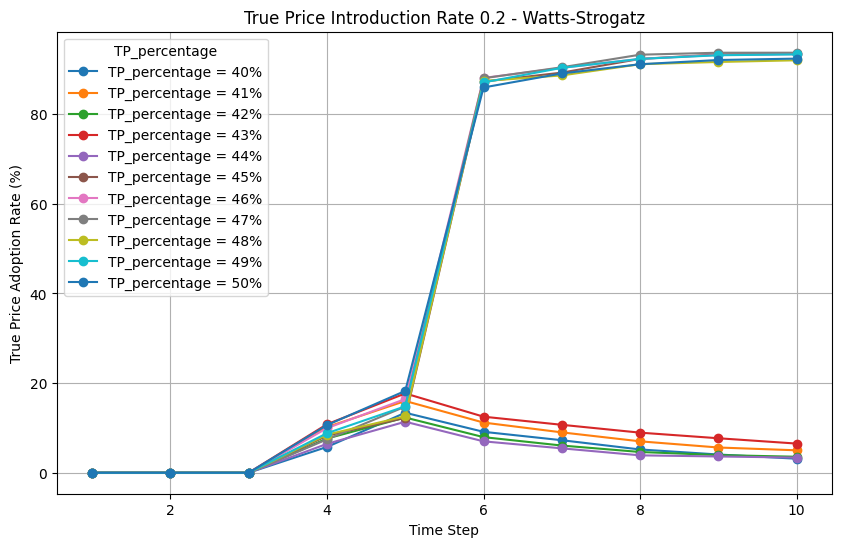

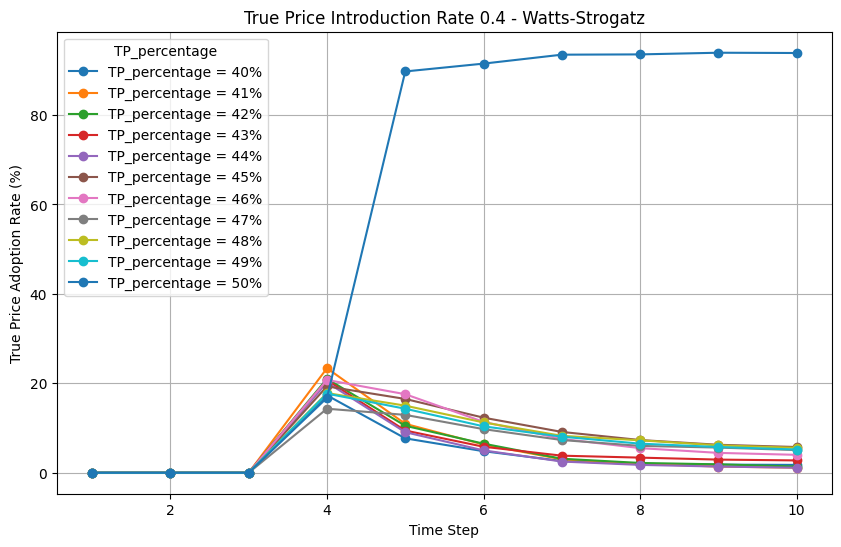

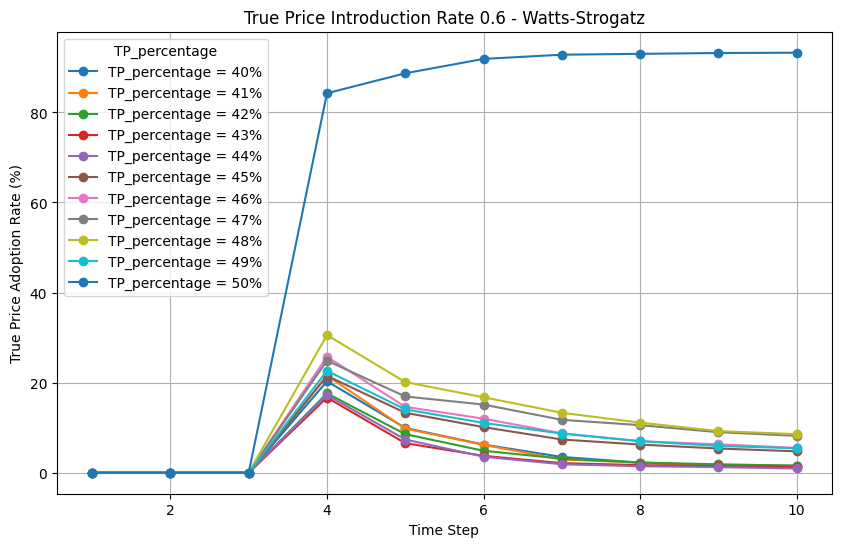

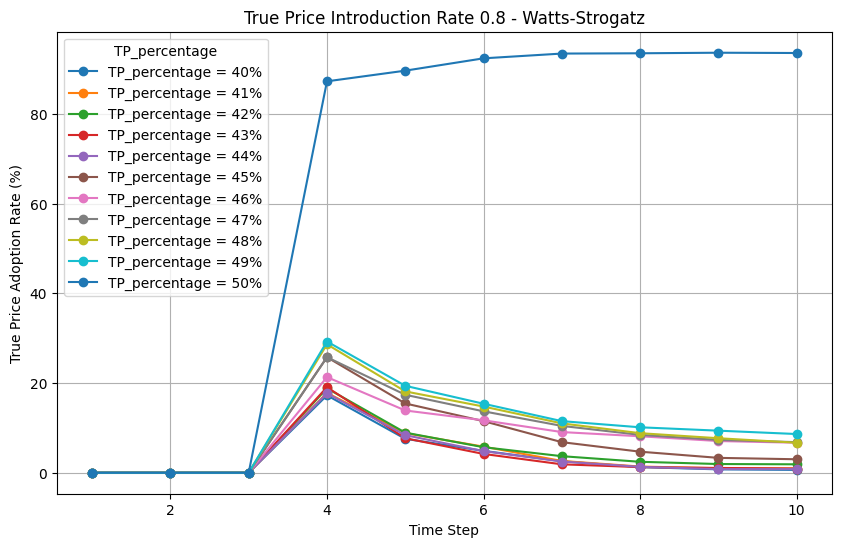

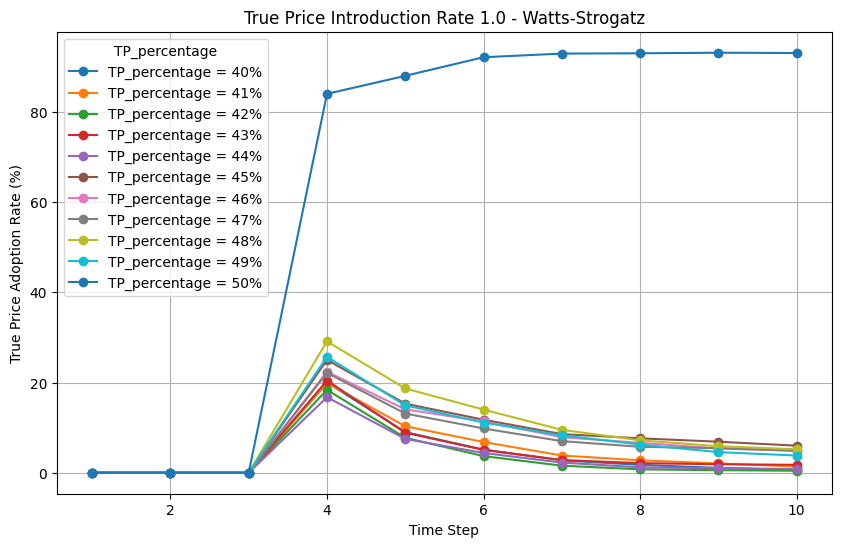

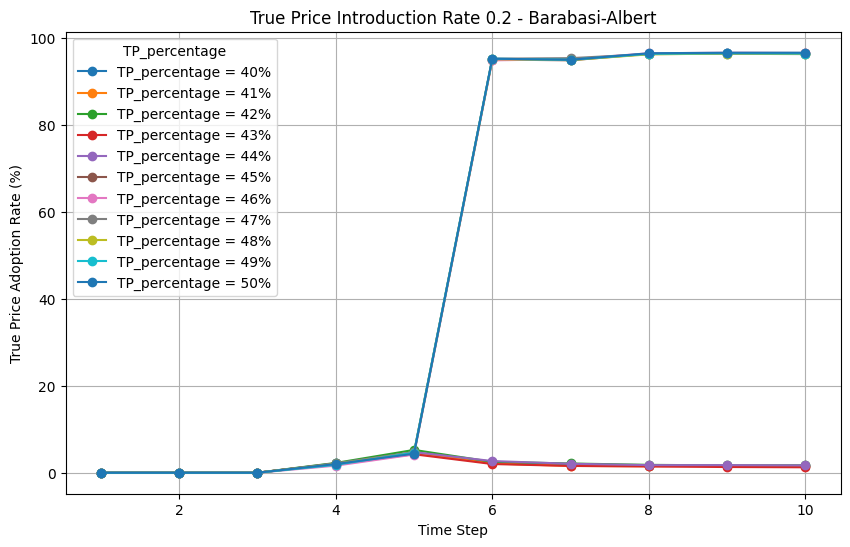

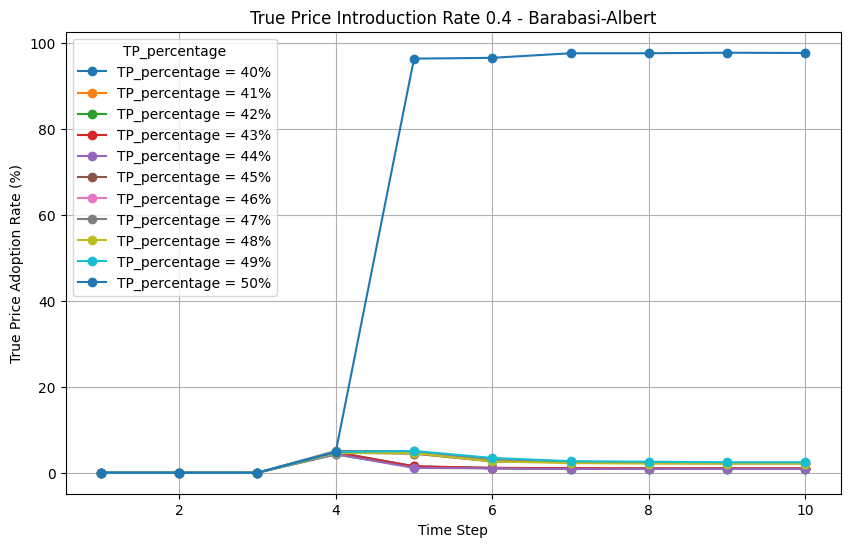

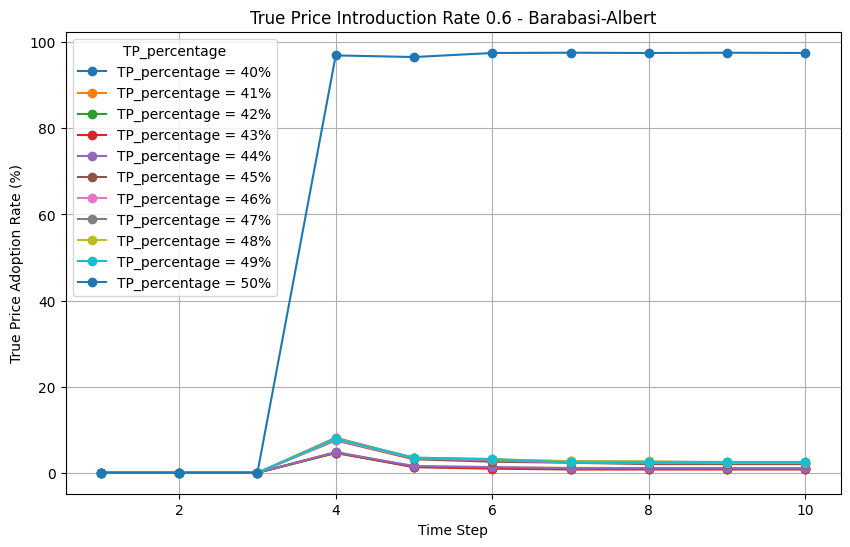

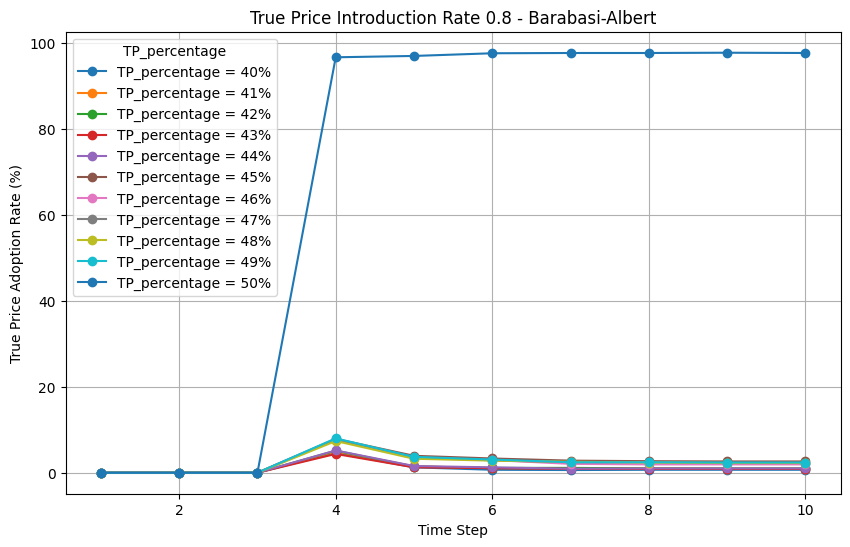

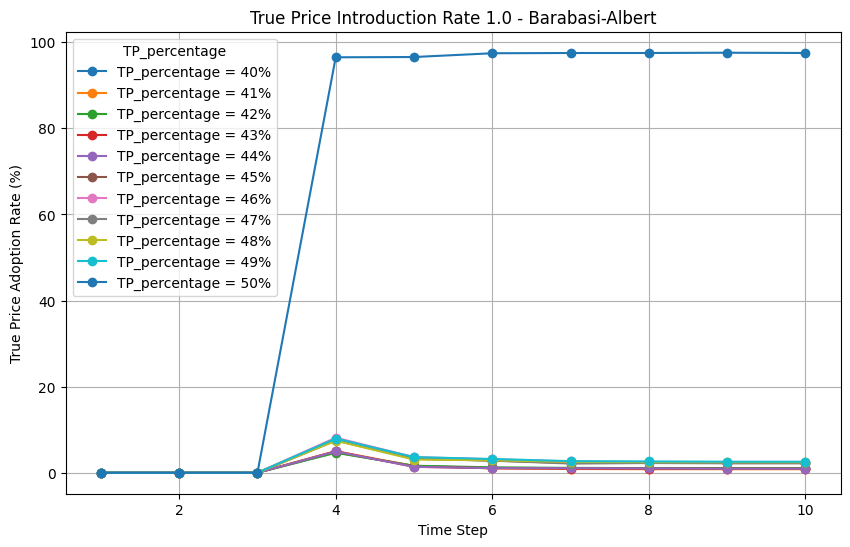

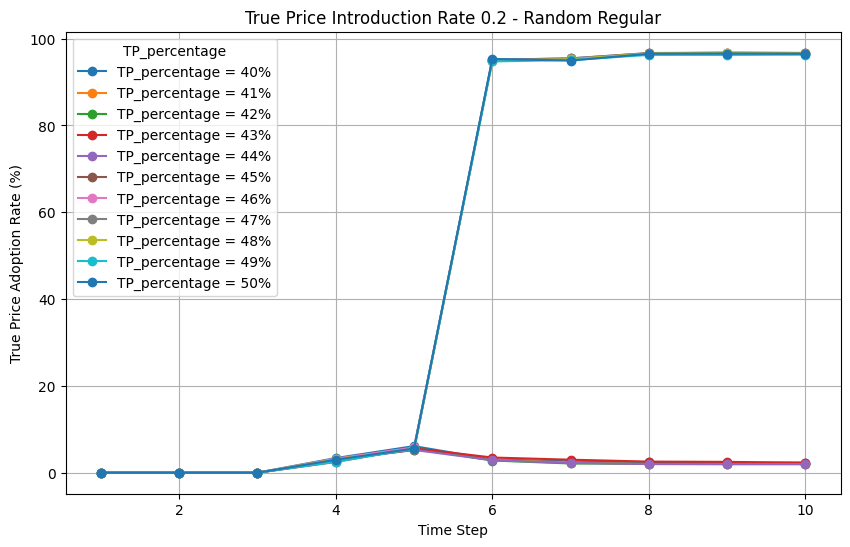

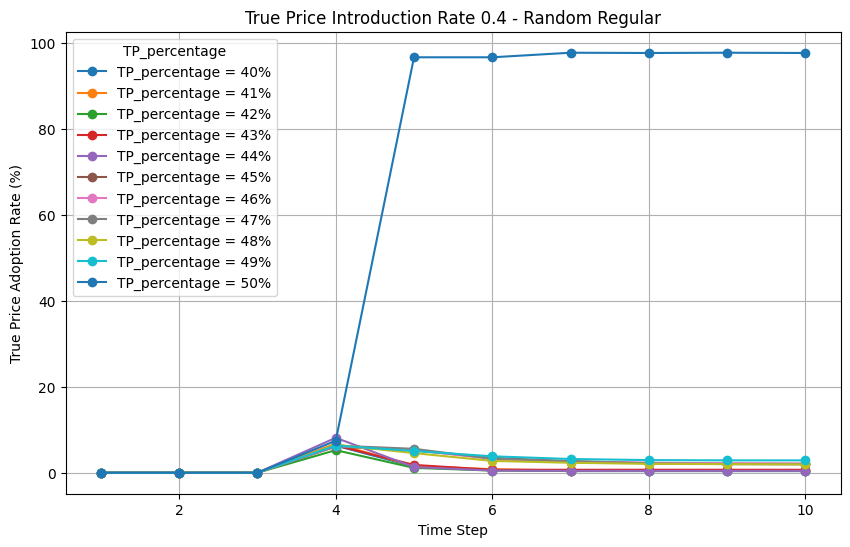

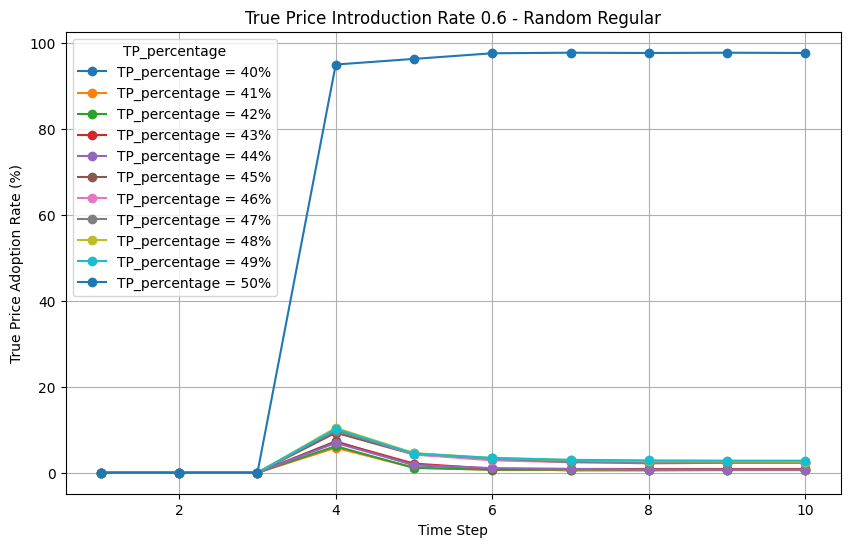

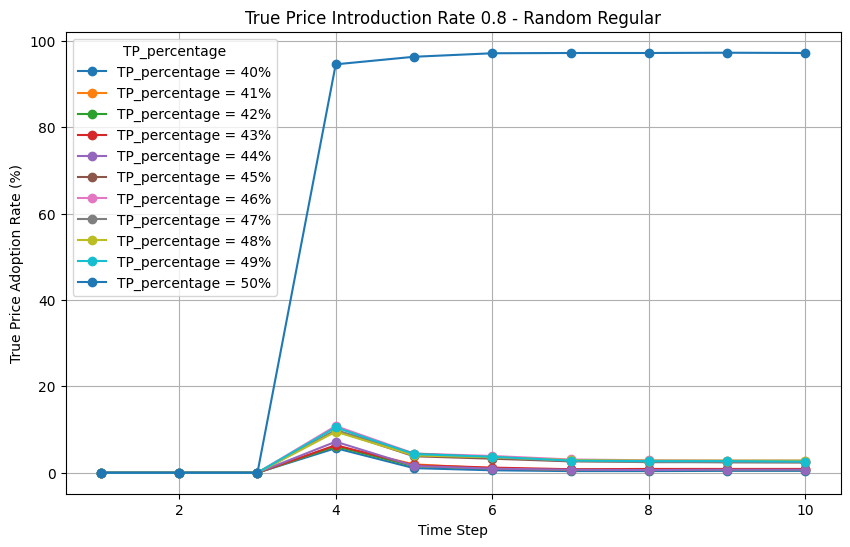

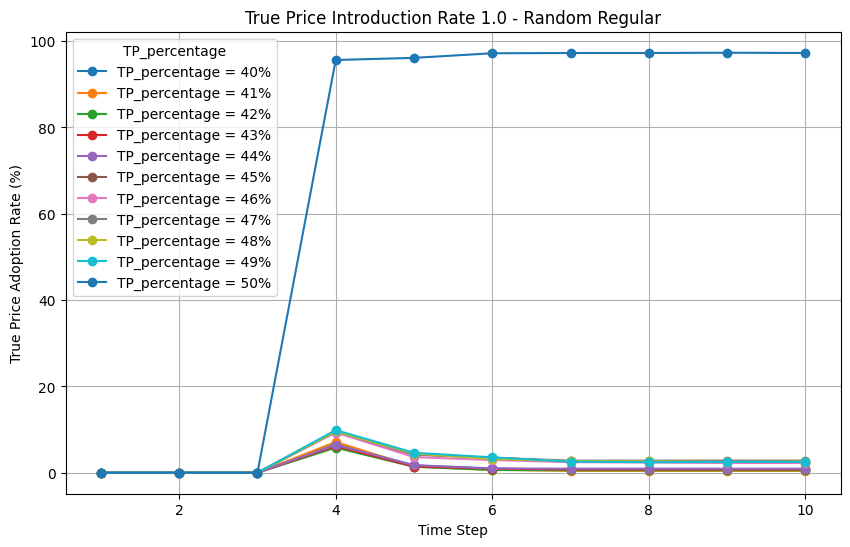

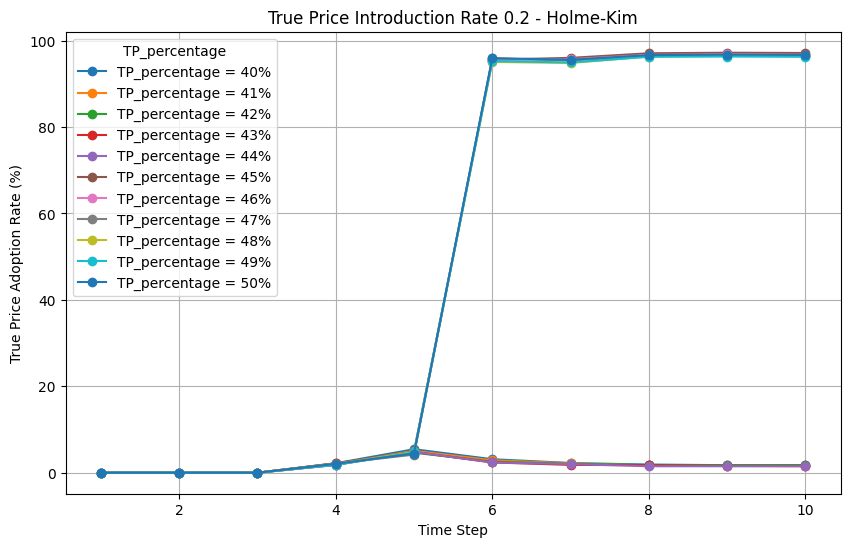

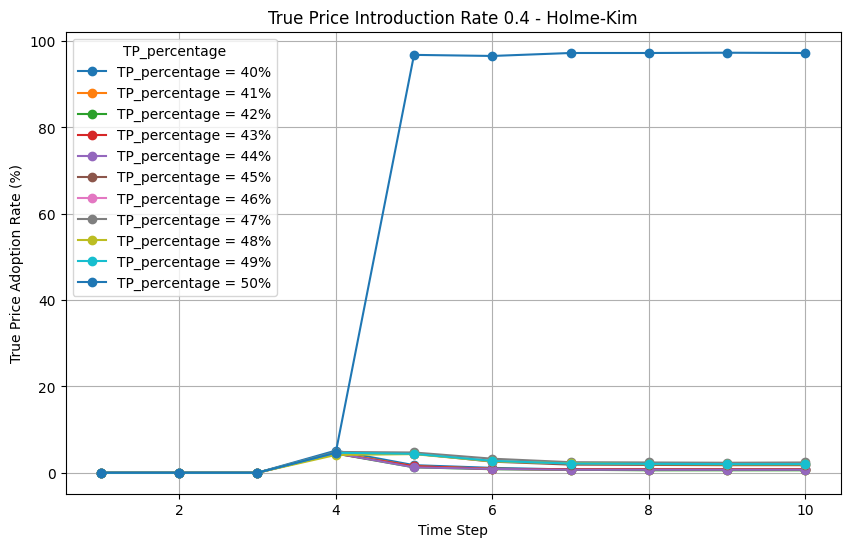

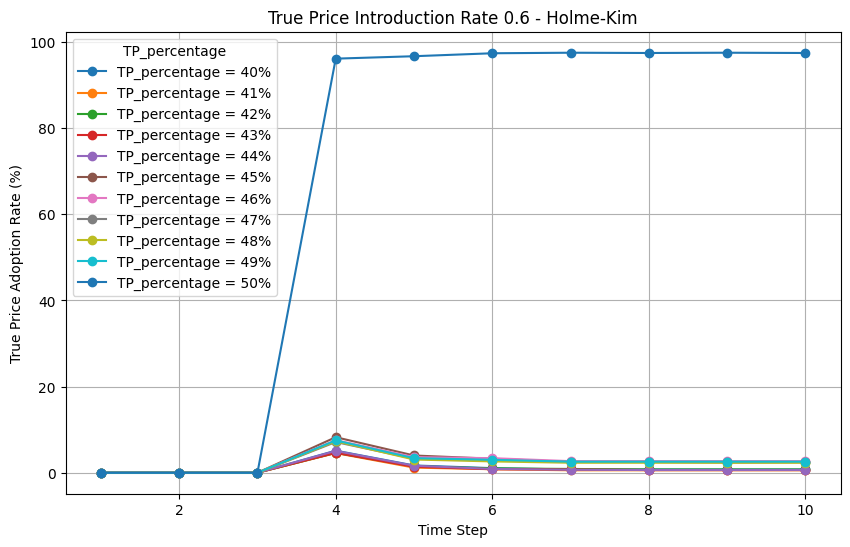

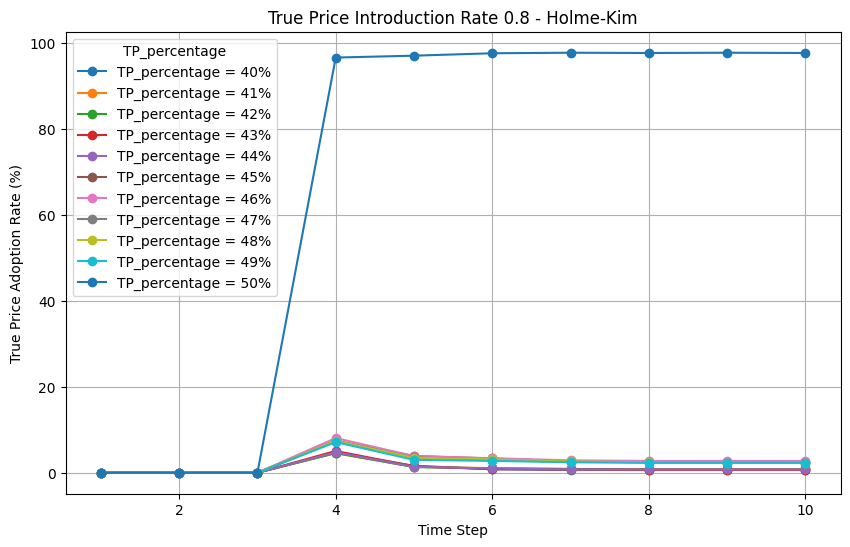

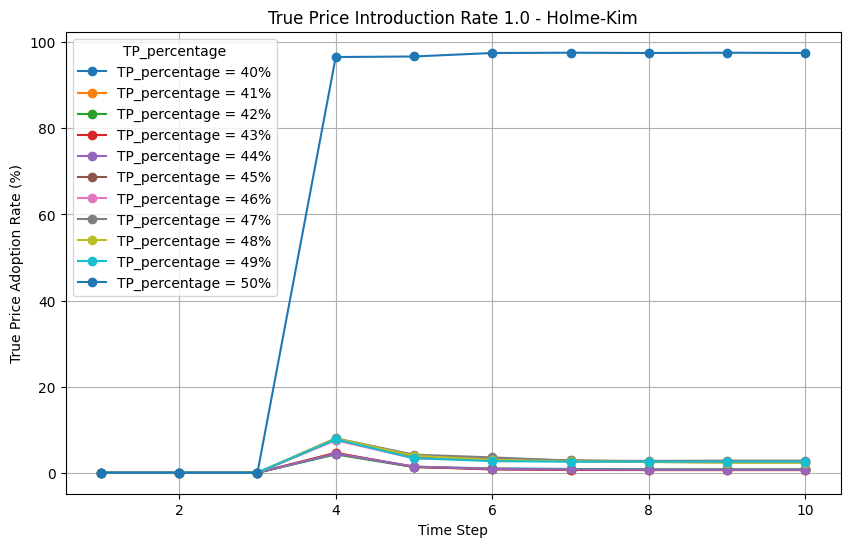

In [15]:
base_config = {
    'TP_percentage': 0.5,
    'tp_introduction_rate': 0.1,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'homophily_attribute': 'weight_social',  # Attribute to use for homophily
    'tolerance': 0.5,  # Tolerance range for homophily
    'seed': 42  # Seed for reproducibility
}

# Configuration for Watts-Strogatz network
watts_strogatz_config = base_config.copy()
watts_strogatz_config.update({
    'network_type': 'watts_strogatz',
    'network_params': {
        'n': 1600,
        'k': 8,
        'p': 0.3
    }
})


# Configuration for Barabasi-Albert network
barabasi_albert_config = base_config.copy()
barabasi_albert_config.update({
    'network_type': 'barabasi_albert',
    'network_params': {
        'n': 1600,
        'm': 8
    }
})

# Configuration for Random Regular network
random_regular_config = base_config.copy()
random_regular_config.update({
    'network_type': 'random_regular',
    'network_params': {
        'n': 1600,
        'd': 8
    }
})

# Configuration for Holme-Kim network
holme_kim_config = base_config.copy()
holme_kim_config.update({
    'network_type': 'holme_kim',
    'network_params': {
        'n': 1600,
        'm': 8,
        'p': 0.3
    }
})

network_configs = {
    'Watts-Strogatz': watts_strogatz_config,
    'Barabasi-Albert': barabasi_albert_config,
    'Random Regular': random_regular_config,
    'Holme-Kim': holme_kim_config
}


# Define a range of values for TP_percentage
tp_percentages = np.arange(0.4, 0.510, 0.01)  
# Hold the number of steps constant for each simulation
num_steps = 10

# Function to run simulations for each TP_percentage
def run_simulation_for_tp_and_rate(config, tp_percentages, tp_introduction_rate, num_steps):
    adoption_rates_by_tp_percentage = []

    for tp_percentage in tqdm(tp_percentages, desc=f'TP Percentage Progress for rate {tp_introduction_rate}'):
        # Update the config with the current TP_percentage and tp_introduction_rate
        config['TP_percentage'] = tp_percentage
        config['tp_introduction_rate'] = tp_introduction_rate
        
        # Run the simulation
        model = ConsumatModel(config)
        model_data, _ = run_simulation(model, num_steps)
        
        # Extract the adoption rates from the DataFrame
        adoption_rates = model_data['Adoption Rates'].values
        
        # Store the adoption rates for this TP_percentage
        adoption_rates_by_tp_percentage.append(adoption_rates)
    
    return adoption_rates_by_tp_percentage

all_network_results = {}
tp_introduction_rates = np.arange(0.2, 1.2, 0.2)

for network_name, network_config in network_configs.items():
    all_network_results[network_name] = {}
    for tp_introduction_rate in tp_introduction_rates:
        print(f"Running simulations for {network_name} network with introduction rate {tp_introduction_rate}...")
        config = base_config.copy()
        config.update(network_config)
        adoption_rates_by_tp_percentage = run_simulation_for_tp_and_rate(config, tp_percentages, tp_introduction_rate, num_steps)
        all_network_results[network_name][tp_introduction_rate] = adoption_rates_by_tp_percentage


# Plot the results for each network and introduction rate
for network_name, results_by_rate in all_network_results.items():
    for tp_introduction_rate, adoption_rates_by_tp_percentage in results_by_rate.items():
        plt.figure(figsize=(10, 6))
        for i, tp_percentage in enumerate(tp_percentages):
            plt.plot(range(1, num_steps + 1), adoption_rates_by_tp_percentage[i], label=f'TP_percentage = {tp_percentage * 100:.0f}%', marker='o')
        plt.title(f'True Price Introduction Rate {tp_introduction_rate:.1f} - {network_name}')
        plt.xlabel('Time Step')
        plt.ylabel('True Price Adoption Rate (%)')
        plt.legend(title='TP_percentage')
        plt.grid(True)
        plt.show()

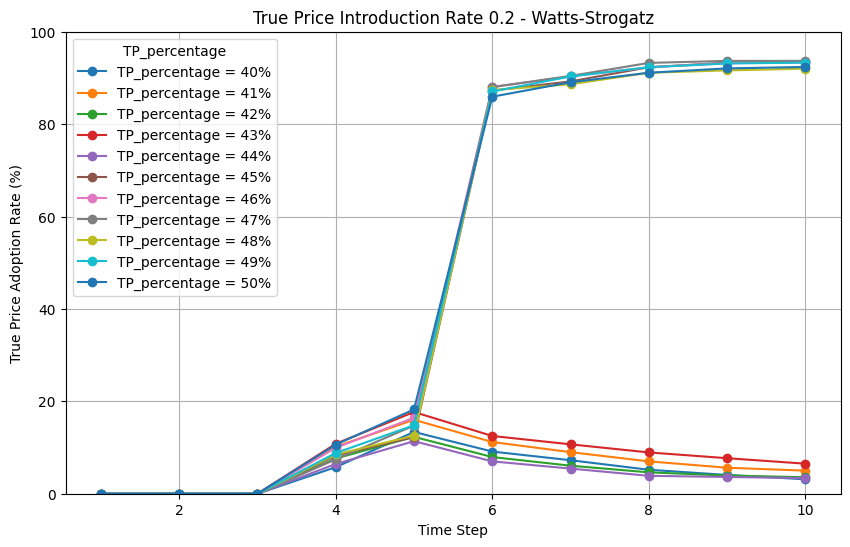

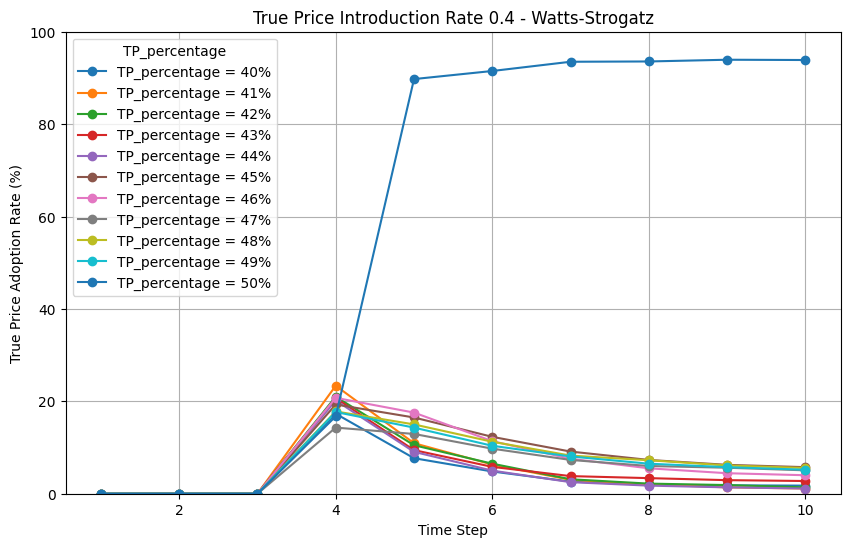

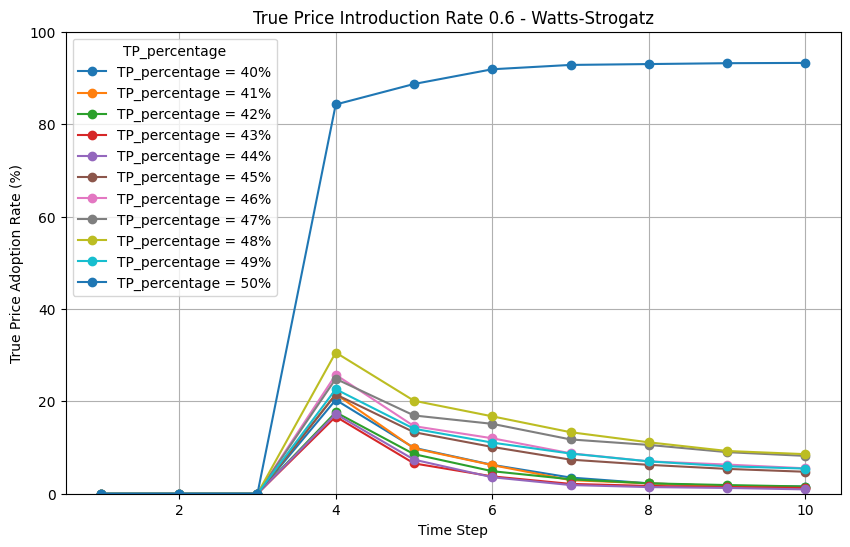

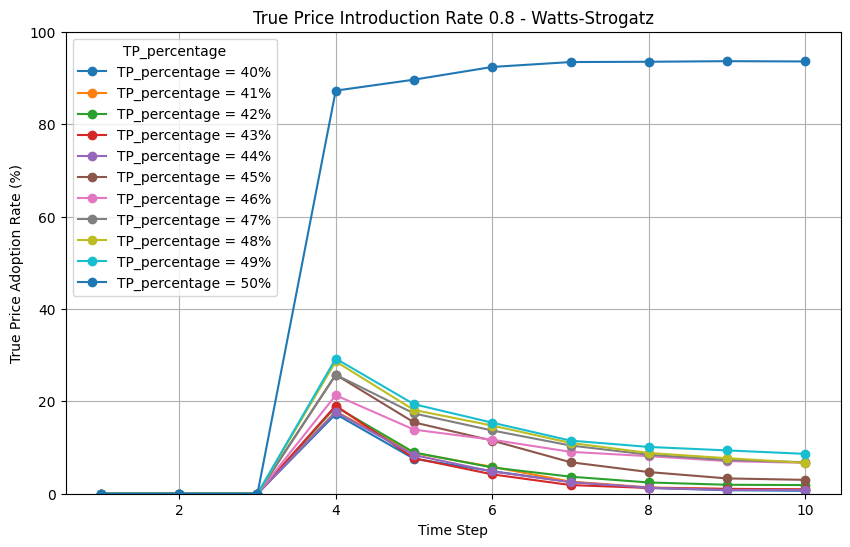

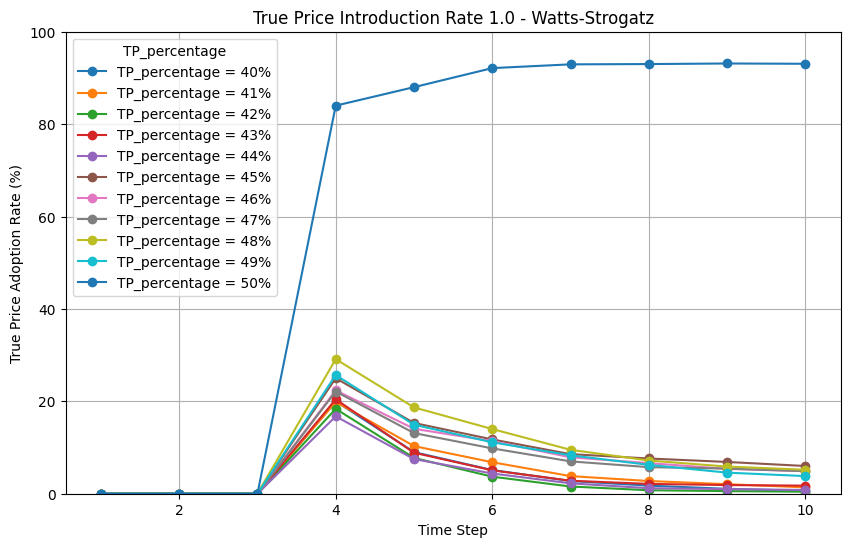

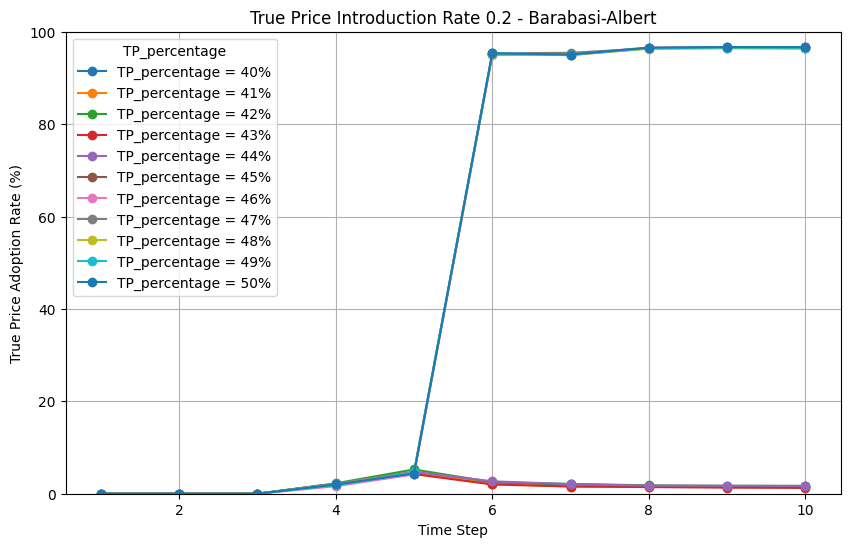

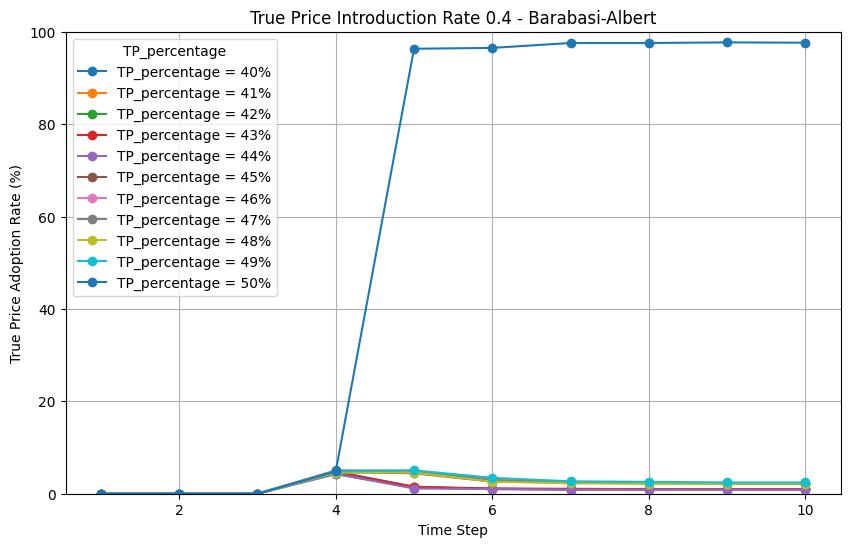

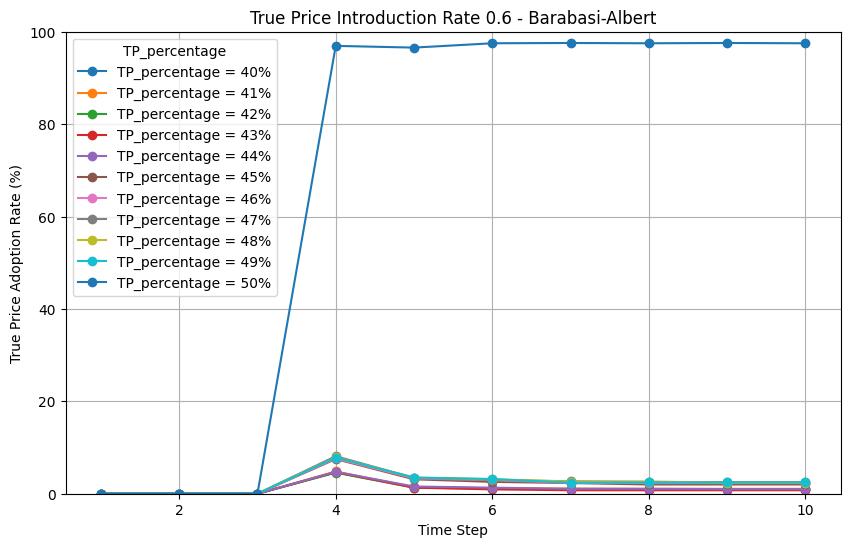

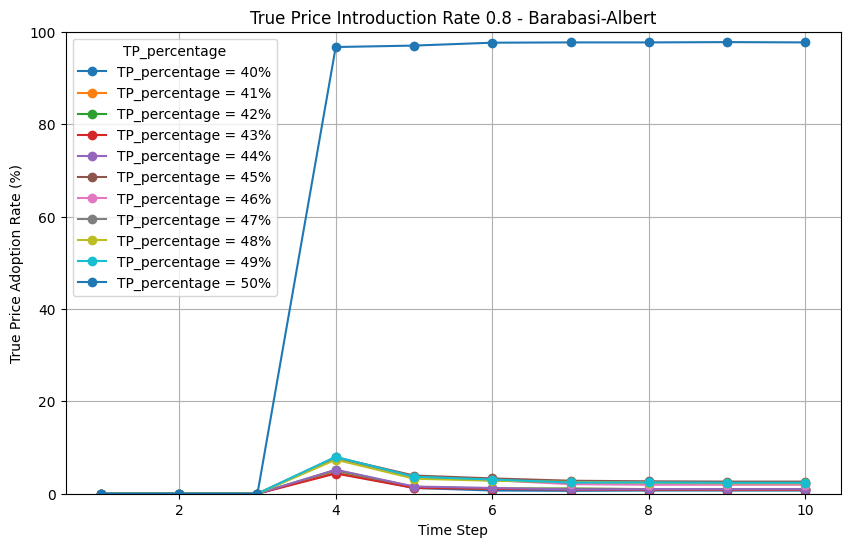

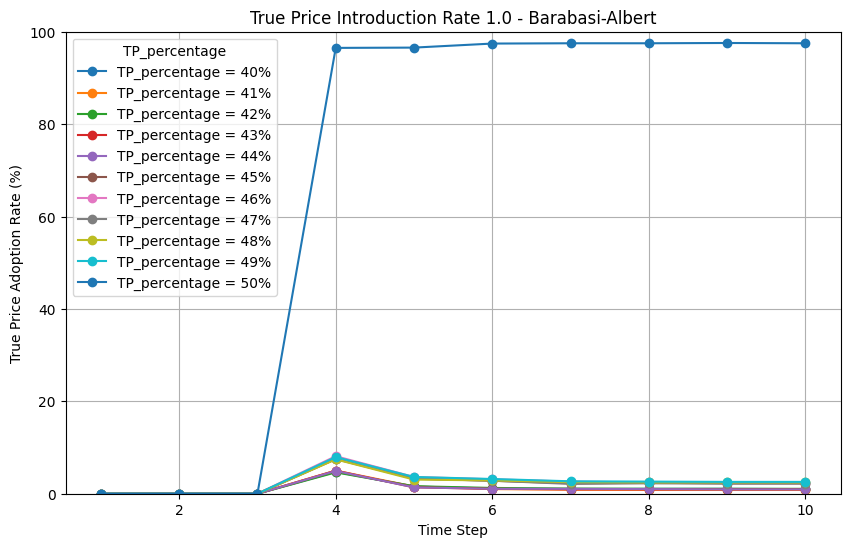

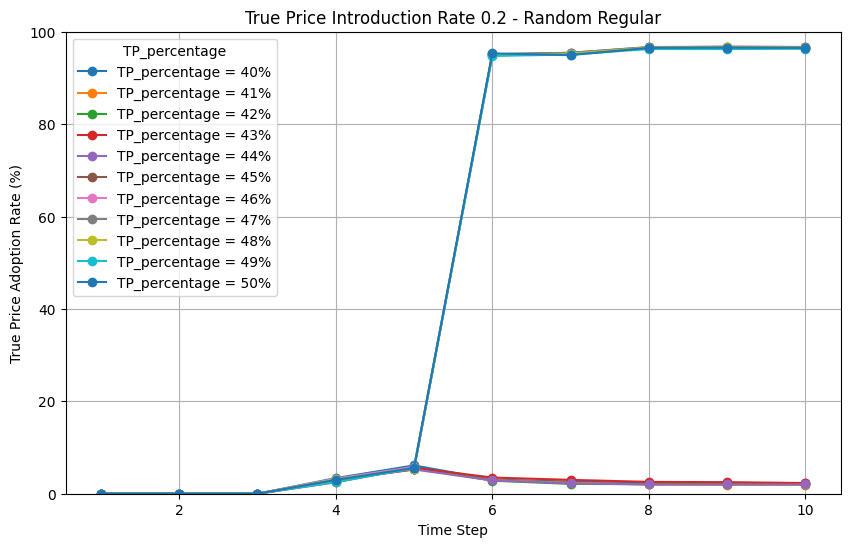

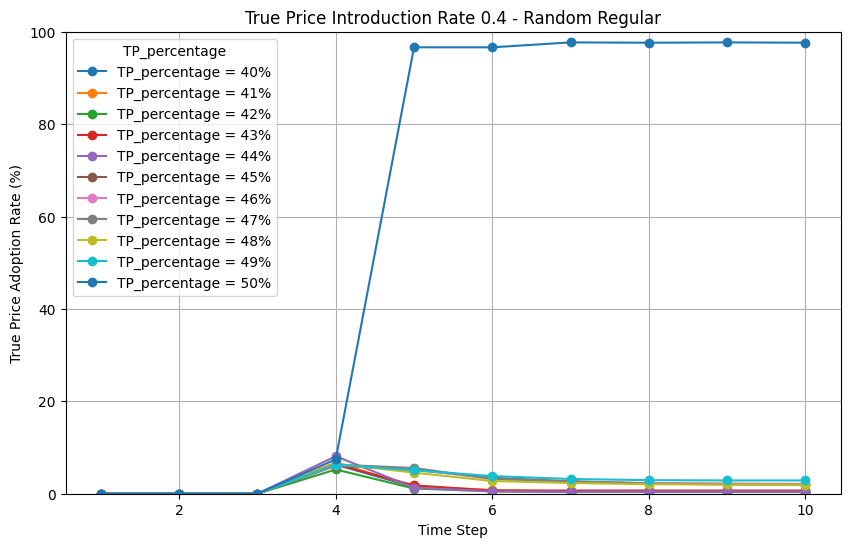

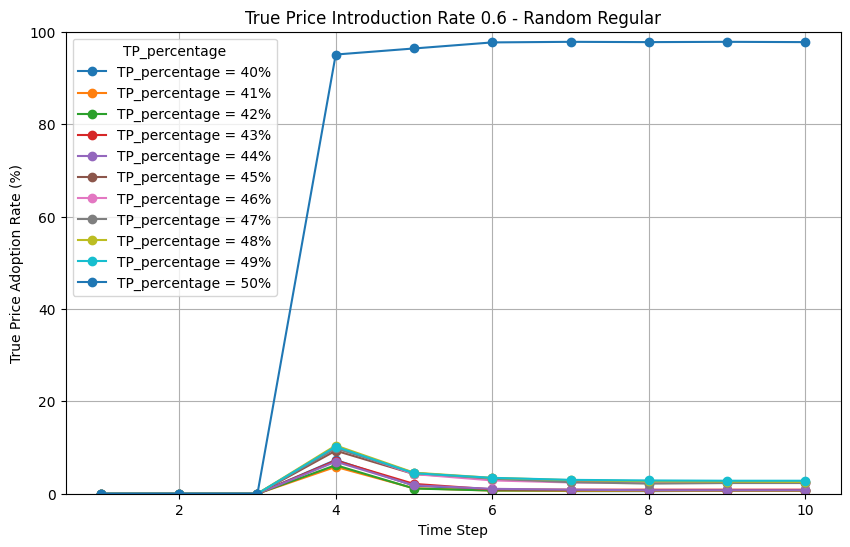

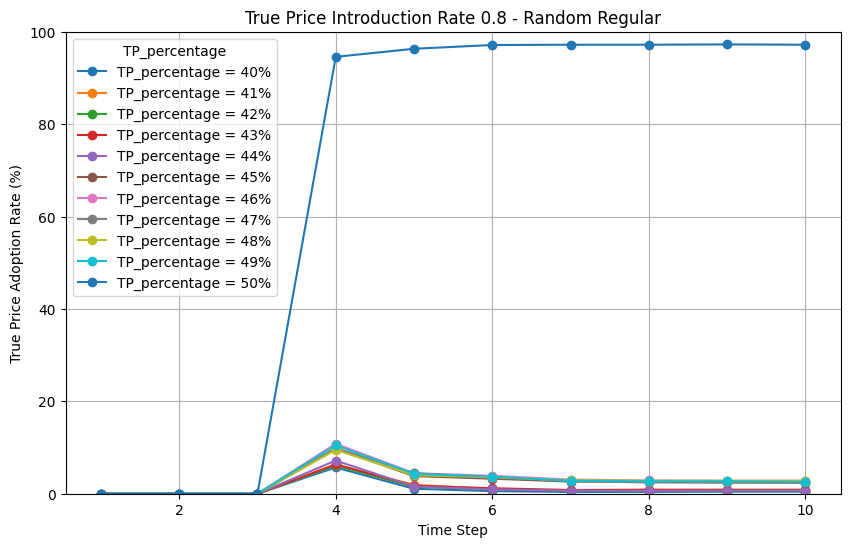

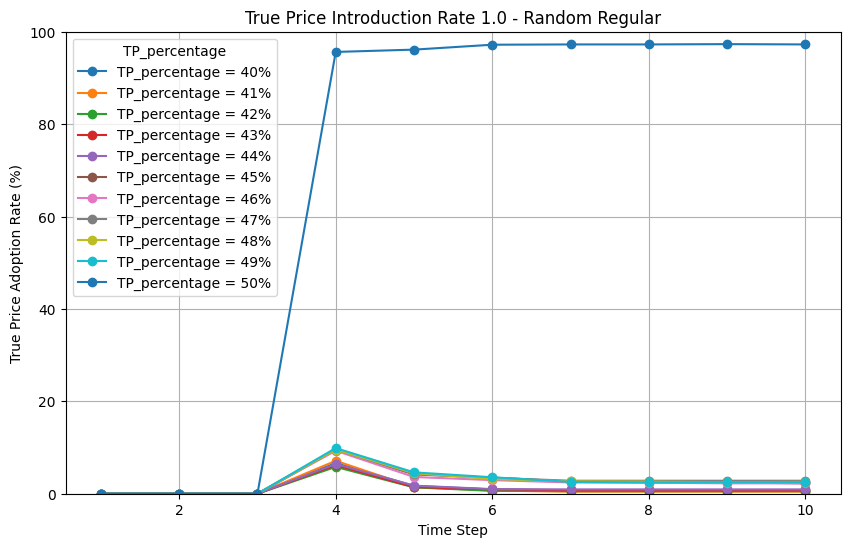

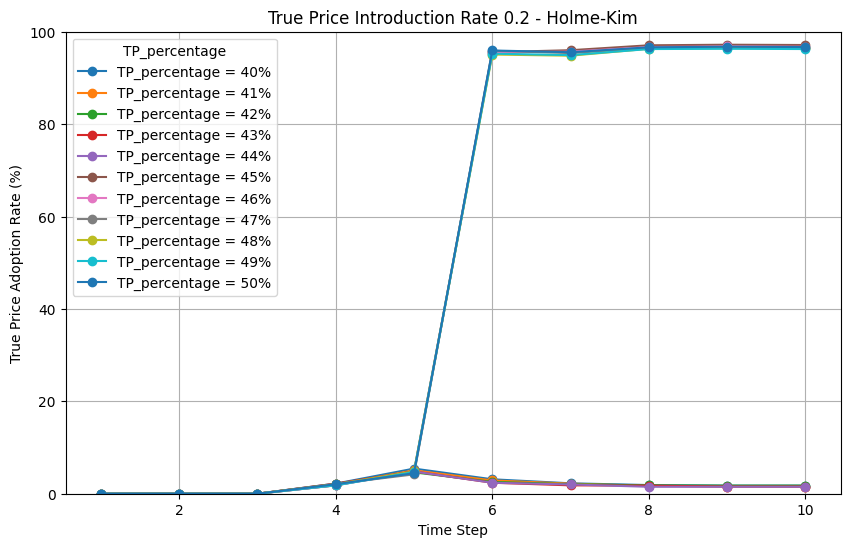

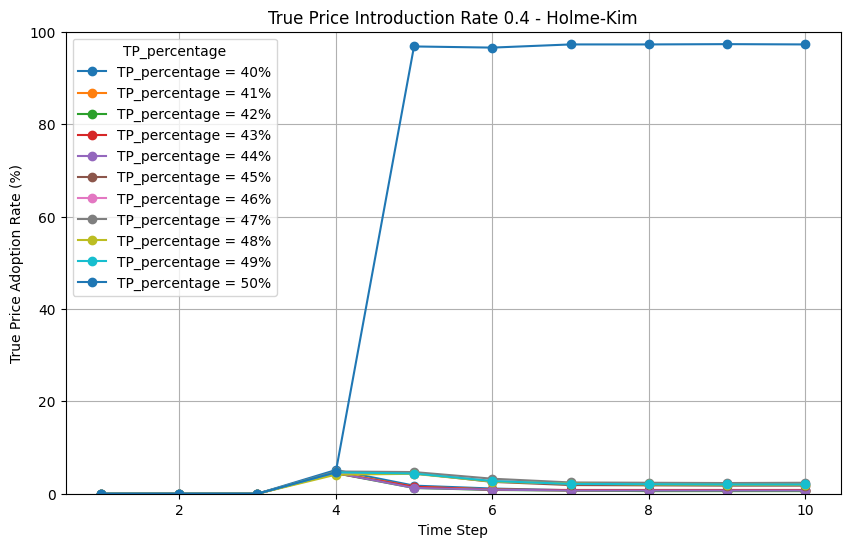

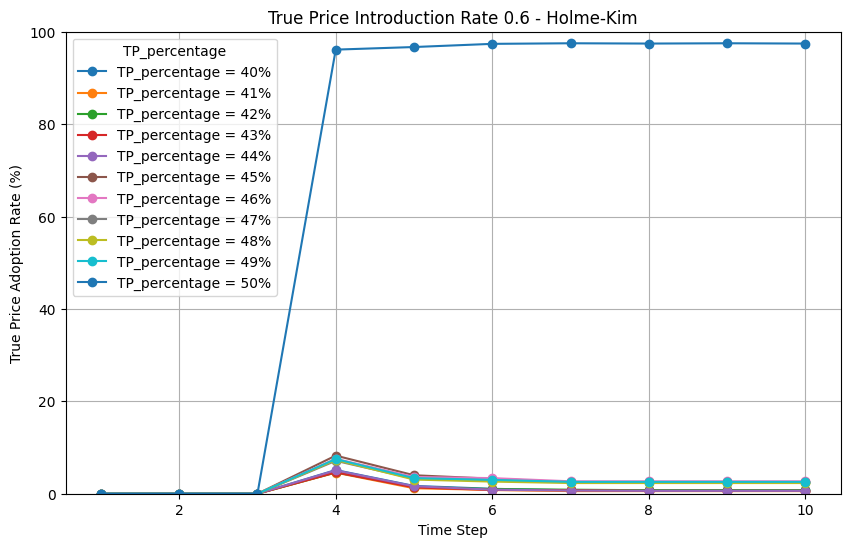

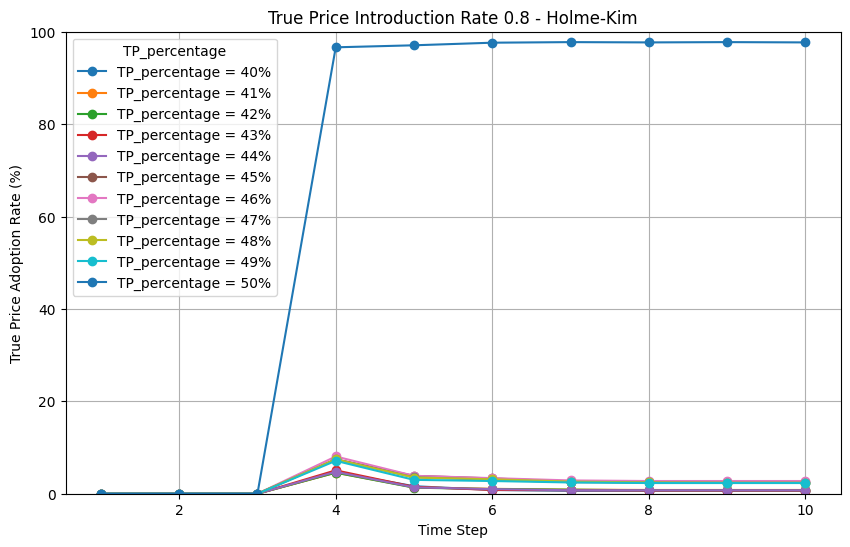

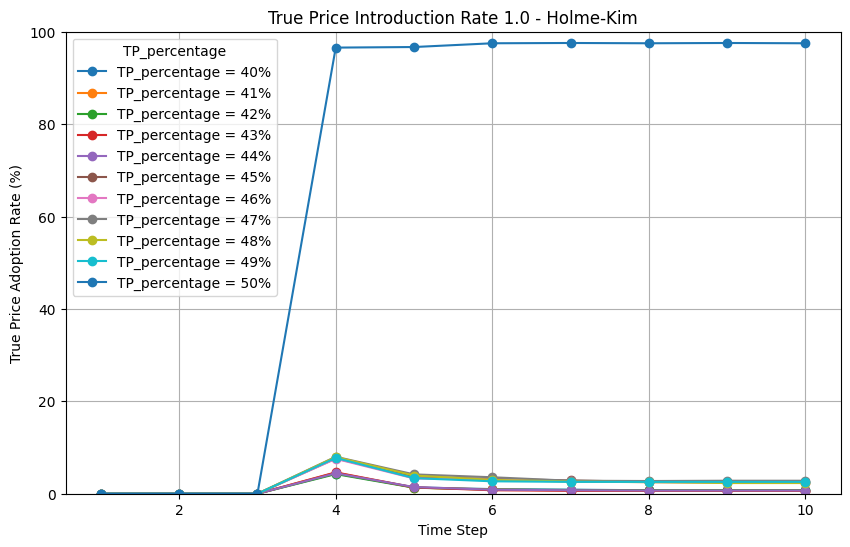

In [17]:
# Plot the results for each network and introduction rate
for network_name, results_by_rate in all_network_results.items():
    for tp_introduction_rate, adoption_rates_by_tp_percentage in results_by_rate.items():
        plt.figure(figsize=(10, 6))
        for i, tp_percentage in enumerate(tp_percentages):
            plt.plot(range(1, num_steps + 1), adoption_rates_by_tp_percentage[i], label=f'TP_percentage = {tp_percentage * 100:.0f}%', marker='o')
        plt.title(f'True Price Introduction Rate {tp_introduction_rate:.1f} - {network_name}')
        plt.xlabel('Time Step')
        plt.ylabel('True Price Adoption Rate (%)')
        plt.ylim(0,100)
        plt.legend(title='TP_percentage')
        plt.grid(True)
        plt.show()

Running simulations for Watts-Strogatz network...


Tolerance Progress: 100%|██████████| 10/10 [05:21<00:00, 32.19s/it]


Running simulations for Barabasi-Albert network...


Tolerance Progress: 100%|██████████| 10/10 [03:51<00:00, 23.19s/it]


Running simulations for Random Regular network...


Tolerance Progress: 100%|██████████| 10/10 [03:43<00:00, 22.36s/it]


Running simulations for Holme-Kim network...


Tolerance Progress: 100%|██████████| 10/10 [03:21<00:00, 20.17s/it]


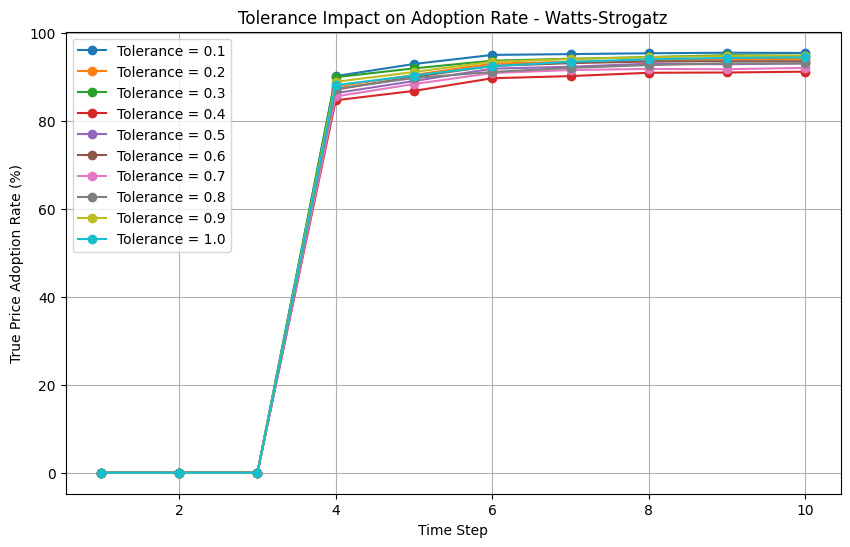

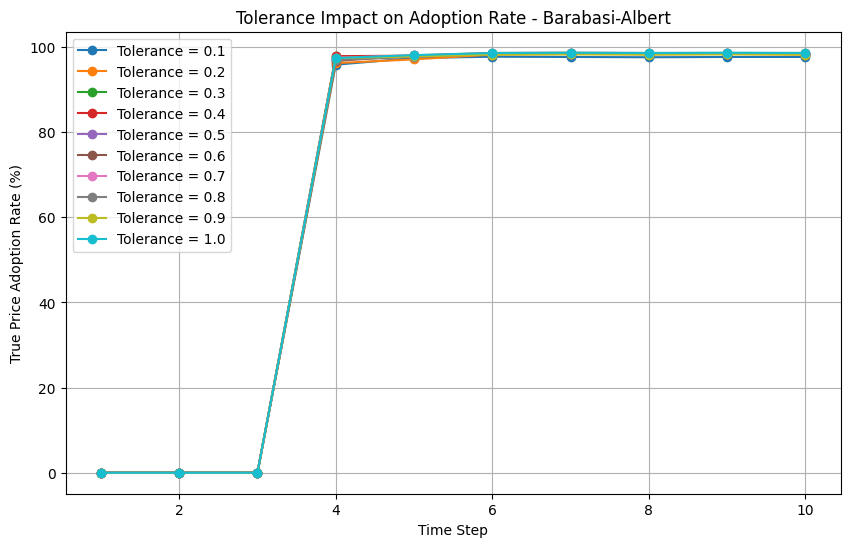

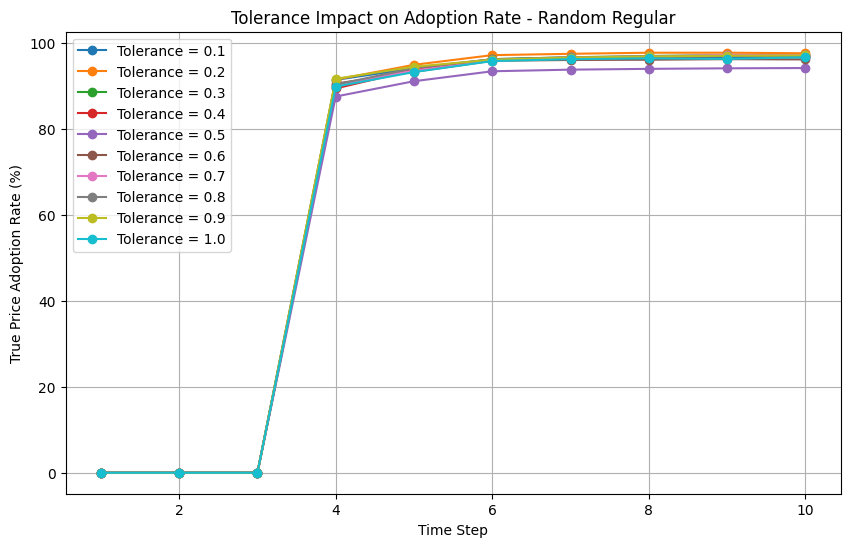

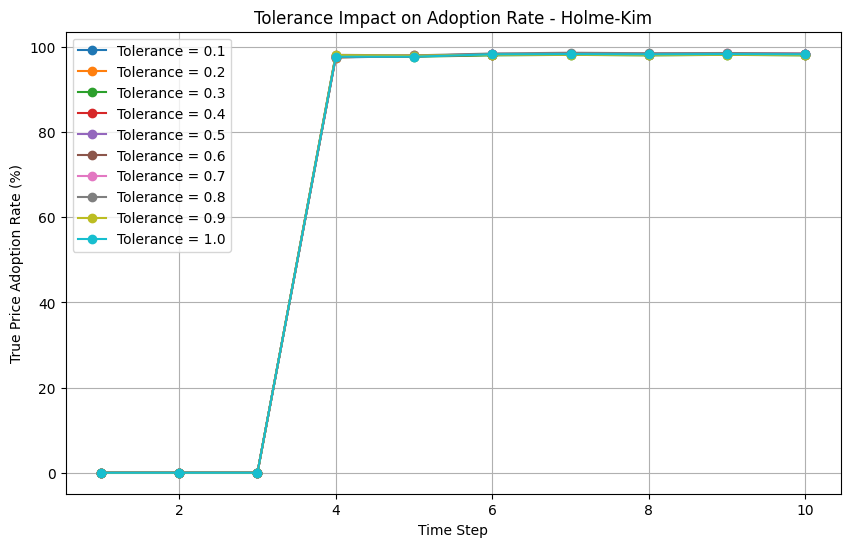

In [10]:
base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'homophily_attribute': 'weight_social',  # Attribute to use for homophily
    'tolerance': 0.5,  # Tolerance range for homophily
    'seed': 42  # Seed for reproducibility
}

# Network configurations
network_configs = {
    'Watts-Strogatz': {
        'network_type': 'watts_strogatz',
        'network_params': {
            'n': 1600,
            'k': 4,
            'p': 0.2
        }
    },
    'Barabasi-Albert': {
        'network_type': 'barabasi_albert',
        'network_params': {
            'n': 1600,
            'm': 4
        }
    },
    'Random Regular': {
        'network_type': 'random_regular',
        'network_params': {
            'n': 1600,
            'd': 4
        }
    },
    'Holme-Kim': {
        'network_type': 'holme_kim',
        'network_params': {
            'n': 1600,
            'm': 4,
            'p': 0.1
        }
    }
}

# Define a range of values for tolerance
tolerances = np.linspace(0.1, 1.0, 10)  # From 0.1 to 1.0, with increments of 0.1

# Hold the number of steps constant for each simulation
num_steps = 10

# Function to run simulations for each tolerance
def run_simulation_for_tolerance(config, tolerances, num_steps):
    adoption_rates_by_tolerance = []

    for tolerance in tqdm(tolerances, desc='Tolerance Progress'):
        # Update the config with the current tolerance
        config['tolerance'] = tolerance
        
        # Run the simulation
        model = ConsumatModel(config)
        model_data, _ = run_simulation(model, num_steps)
        
        # Extract the adoption rates from the DataFrame
        adoption_rates = model_data['Adoption Rates'].values
        
        # Store the adoption rates for this tolerance
        adoption_rates_by_tolerance.append(adoption_rates)
    
    return adoption_rates_by_tolerance

# Run simulations and collect results for all networks
all_network_results = {}
for network_name, network_config in network_configs.items():
    print(f"Running simulations for {network_name} network...")
    config = base_config.copy()
    config.update(network_config)
    adoption_rates_by_tolerance = run_simulation_for_tolerance(config, tolerances, num_steps)
    all_network_results[network_name] = adoption_rates_by_tolerance

# Plot the results for each network
for network_name, adoption_rates_by_tolerance in all_network_results.items():
    plt.figure(figsize=(10, 6))
    for i, tolerance in enumerate(tolerances):
        plt.plot(range(1, num_steps + 1), adoption_rates_by_tolerance[i], label=f'Tolerance = {tolerance:.1f}', marker='o')
    plt.title(f'Tolerance Impact on Adoption Rate - {network_name}')
    plt.xlabel('Time Step')
    plt.ylabel('True Price Adoption Rate (%)')
    plt.legend()
    plt.grid(True)
    plt.show()


Running simulations for Watts-Strogatz network...


Homophily Attribute Progress: 100%|██████████| 5/5 [02:43<00:00, 32.70s/it]


Running simulations for Barabasi-Albert network...


Homophily Attribute Progress: 100%|██████████| 5/5 [01:41<00:00, 20.25s/it]


Running simulations for Random Regular network...


Homophily Attribute Progress: 100%|██████████| 5/5 [02:08<00:00, 25.62s/it]


Running simulations for Holme-Kim network...


Homophily Attribute Progress: 100%|██████████| 5/5 [01:44<00:00, 20.88s/it]


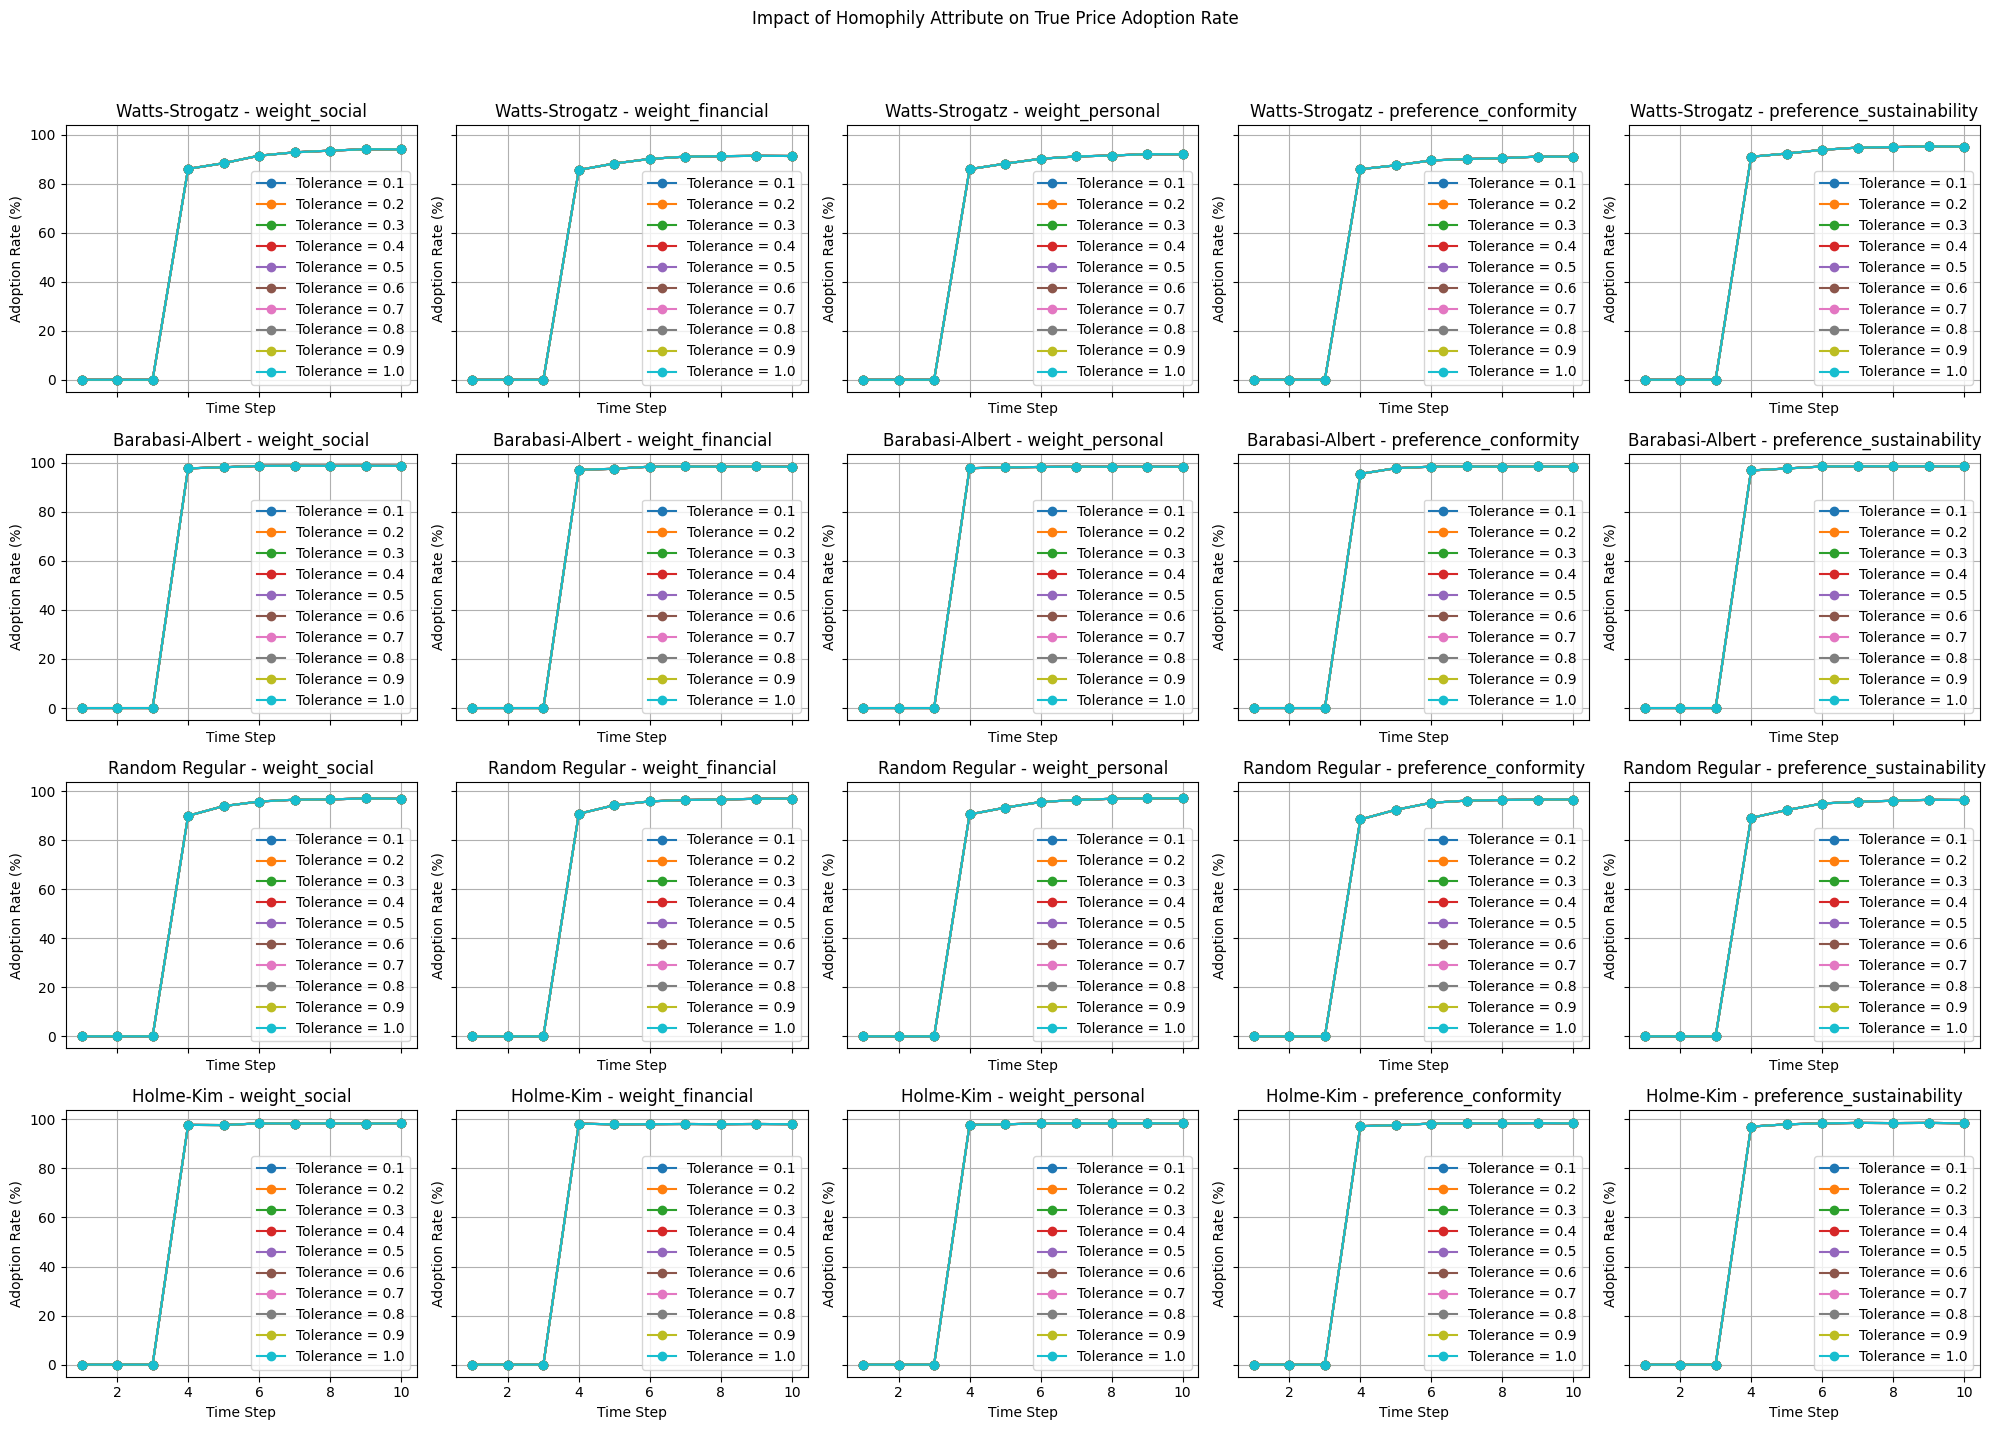

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mesa import Model
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
import networkx as nx

# Define the base configuration
base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'homophily_attribute': 'weight_social',  # Attribute to use for homophily
    'tolerance': 0.5,  # Tolerance range for homophily
    'seed': 42  # Seed for reproducibility
}

# Define network configurations
network_configs = {
    'Watts-Strogatz': {
        'network_type': 'watts_strogatz',
        'network_params': {
            'n': 1600,
            'k': 4,
            'p': 0.2
        }
    },
    'Barabasi-Albert': {
        'network_type': 'barabasi_albert',
        'network_params': {
            'n': 1600,
            'm': 4
        }
    },
    'Random Regular': {
        'network_type': 'random_regular',
        'network_params': {
            'n': 1600,
            'd': 4
        }
    },
    'Holme-Kim': {
        'network_type': 'holme_kim',
        'network_params': {
            'n': 1600,
            'm': 4,
            'p': 0.1
        }
    }
}

# Define a range of homophily attributes
homophily_attributes = ['weight_social', 'weight_financial', 'weight_personal', 'preference_conformity', 'preference_sustainability']

# Function to run simulations for each homophily attribute
def run_simulation_for_homophily_attribute(config, homophily_attributes, num_steps):
    adoption_rates_by_attribute = []

    for attribute in tqdm(homophily_attributes, desc='Homophily Attribute Progress'):
        # Update the config with the current homophily attribute
        config['homophily_attribute'] = attribute
        
        # Run the simulation
        model = ConsumatModel(config)
        model_data, _ = run_simulation(model, num_steps)
        
        # Extract the adoption rates from the DataFrame
        adoption_rates = model_data['Adoption Rates'].values
        
        # Store the adoption rates for this homophily attribute
        adoption_rates_by_attribute.append(adoption_rates)
    
    return adoption_rates_by_attribute

# Run simulations and collect results for all networks
all_network_results = {}
for network_name, network_config in network_configs.items():
    print(f"Running simulations for {network_name} network...")
    config = base_config.copy()
    config.update(network_config)
    adoption_rates_by_attribute = run_simulation_for_homophily_attribute(config, homophily_attributes, num_steps)
    all_network_results[network_name] = adoption_rates_by_attribute

# Plot the results for each network and homophily attribute
fig, axes = plt.subplots(len(network_configs), len(homophily_attributes), figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle('Impact of Homophily Attribute on True Price Adoption Rate')

for row_idx, (network_name, adoption_rates_by_attribute) in enumerate(all_network_results.items()):
    for col_idx, attribute in enumerate(homophily_attributes):
        ax = axes[row_idx, col_idx]
        for i, tolerance in enumerate(tolerances):
            ax.plot(range(1, num_steps + 1), adoption_rates_by_attribute[col_idx], label=f'Tolerance = {tolerance:.1f}', marker='o')
        ax.set_title(f'{network_name} - {attribute}')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('Adoption Rate (%)')
        ax.legend()
        ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Network: watts_strogatz
Average degree: 4.0
Rewiring probability: 0.2
Clustering coefficient: 0.26850446428571373
Average path length: 7.399803783614759
Degree distribution: (array([  0,   0,  45, 378, 784, 325,  62,   6]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Agent 0 has 4 neighbors
Agent 1 has 4 neighbors
Agent 2 has 3 neighbors
Agent 3 has 5 neighbors
Agent 4 has 3 neighbors


Simulation Progress: 100%|██████████| 10/10 [00:35<00:00,  3.58s/it]


Network: watts_strogatz
Average degree: 4.0
Rewiring probability: 0.2
Clustering coefficient: 0.2673556547619043
Average path length: 7.38416119449656
Degree distribution: (array([  0,   0,  51, 371, 783, 325,  63,   7]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Agent 0 has 4 neighbors
Agent 1 has 4 neighbors
Agent 2 has 3 neighbors
Agent 3 has 5 neighbors
Agent 4 has 3 neighbors


Simulation Progress: 100%|██████████| 10/10 [00:27<00:00,  2.77s/it]


Network: watts_strogatz
Average degree: 4.0
Rewiring probability: 0.2
Clustering coefficient: 0.26454613095238044
Average path length: 7.391085834896811
Degree distribution: (array([  0,   0,  44, 376, 791, 321,  62,   6]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Agent 0 has 4 neighbors
Agent 1 has 4 neighbors
Agent 2 has 3 neighbors
Agent 3 has 5 neighbors
Agent 4 has 3 neighbors


Simulation Progress: 100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


Network: watts_strogatz
Average degree: 4.0
Rewiring probability: 0.2
Clustering coefficient: 0.24328124999999967
Average path length: 7.095608974358974
Degree distribution: (array([  0,   0,  72, 376, 733, 331,  76,  12]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Agent 0 has 4 neighbors
Agent 1 has 4 neighbors
Agent 2 has 3 neighbors
Agent 3 has 5 neighbors
Agent 4 has 3 neighbors


Simulation Progress: 100%|██████████| 10/10 [00:18<00:00,  1.86s/it]


Network: watts_strogatz
Average degree: 4.0
Rewiring probability: 0.2
Clustering coefficient: 0.2574360119047616
Average path length: 7.303759380863039
Degree distribution: (array([  0,   1,  50, 379, 769, 330,  63,   8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Agent 0 has 4 neighbors
Agent 1 has 4 neighbors
Agent 2 has 3 neighbors
Agent 3 has 5 neighbors
Agent 4 has 3 neighbors


Simulation Progress: 100%|██████████| 10/10 [00:18<00:00,  1.86s/it]


Network: barabasi_albert
Average degree: 7.98
Rewiring probability: N/A
Clustering coefficient: 0.023653431014005123
Average path length: 3.345560506566604
Degree distribution: (array([  0,   0,   3,  12, 486, 338, 184, 130,  88,  55,  51,  37,  24,
        21,  25,  23,  17,  12,   6,   9,   6,   7,   7,   7,   4,   4,
         4,   2,   3,   2,   0,   1,   1,   0,   1,   1,   4,   0,   0,
         2,   0,   1,   1,   1,   2,   1,   1,   0,   0,   1,   2,   1,
         0,   0,   1,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   2,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0

Simulation Progress: 100%|██████████| 10/10 [00:18<00:00,  1.84s/it]


Network: barabasi_albert
Average degree: 7.98
Rewiring probability: N/A
Clustering coefficient: 0.0241222431072992
Network is not connected
Degree distribution: (array([  2,   2,   2,  11, 482, 335, 191, 128,  89,  51,  54,  37,  24,
        21,  24,  25,  15,  13,   4,  10,   7,   7,   8,   6,   4,   4,
         4,   2,   3,   2,   0,   0,   2,   0,   1,   1,   4,   0,   0,
         2,   0,   1,   1,   1,   2,   1,   1,   0,   0,   1,   2,   1,
         0,   0,   1,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   2,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,

Simulation Progress: 100%|██████████| 10/10 [00:00<00:00, 16.00it/s]


Network: barabasi_albert
Average degree: 7.98
Rewiring probability: N/A
Clustering coefficient: 0.023924116354577606
Average path length: 3.3457512507817384
Degree distribution: (array([  0,   0,   2,  16, 489, 324, 190, 134,  89,  51,  50,  38,  24,
        24,  22,  23,  19,  11,   6,  10,   5,   7,   8,   6,   4,   4,
         4,   2,   3,   2,   0,   0,   2,   0,   1,   1,   4,   0,   0,
         2,   0,   1,   1,   1,   2,   1,   1,   0,   0,   1,   2,   1,
         0,   0,   1,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   2,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   

Simulation Progress: 100%|██████████| 10/10 [00:18<00:00,  1.81s/it]


Network: barabasi_albert
Average degree: 7.96625
Rewiring probability: N/A
Clustering coefficient: 0.023504887233228664
Average path length: 3.352582864290181
Degree distribution: (array([  0,   2,  17,  75, 392, 308, 224, 126,  82,  68,  53,  46,  18,
        19,  24,  20,  18,  12,   7,   9,   8,   8,   5,   6,   3,   7,
         2,   4,   3,   0,   1,   1,   1,   1,   0,   0,   4,   1,   1,
         1,   0,   1,   3,   1,   0,   2,   0,   0,   0,   1,   2,   1,
         0,   1,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   1,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   0,   1,   0,   0,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 

Simulation Progress: 100%|██████████| 10/10 [00:18<00:00,  1.90s/it]


Network: barabasi_albert
Average degree: 7.9775
Rewiring probability: N/A
Clustering coefficient: 0.024371760085261648
Network is not connected
Degree distribution: (array([  1,   3,   4,  20, 473, 324, 199, 132,  79,  58,  56,  31,  29,
        21,  23,  25,  17,  10,   6,  10,   6,   8,   7,   4,   6,   4,
         3,   3,   3,   2,   0,   0,   2,   0,   1,   2,   3,   0,   0,
         2,   0,   1,   1,   1,   3,   0,   1,   0,   0,   1,   2,   1,
         0,   1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   2,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 

Simulation Progress: 100%|██████████| 10/10 [00:00<00:00, 15.68it/s]


Network: random_regular
Average degree: 4.0
Rewiring probability: N/A
Clustering coefficient: 0.0006249999999999999
Average path length: 6.048910256410257
Degree distribution: (array([   0,    0,    0,   18, 1582]), array([0, 1, 2, 3, 4, 5]))
Agent 0 has 4 neighbors
Agent 1 has 4 neighbors
Agent 2 has 4 neighbors
Agent 3 has 4 neighbors
Agent 4 has 4 neighbors


Simulation Progress: 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


Network: random_regular
Average degree: 4.0
Rewiring probability: N/A
Clustering coefficient: 0.0006249999999999999
Network is not connected
Degree distribution: (array([   1,    1,    2,   14, 1558,   24]), array([0, 1, 2, 3, 4, 5, 6]))
Agent 0 has 4 neighbors
Agent 1 has 4 neighbors
Agent 2 has 4 neighbors
Agent 3 has 4 neighbors
Agent 4 has 4 neighbors


Simulation Progress: 100%|██████████| 10/10 [00:00<00:00, 20.18it/s]


Network: random_regular
Average degree: 4.0
Rewiring probability: N/A
Clustering coefficient: 0.0006249999999999999
Average path length: 6.043206691682301
Degree distribution: (array([   0,    0,    3,   24, 1544,   29]), array([0, 1, 2, 3, 4, 5, 6]))
Agent 0 has 4 neighbors
Agent 1 has 4 neighbors
Agent 2 has 4 neighbors
Agent 3 has 4 neighbors
Agent 4 has 4 neighbors


Simulation Progress: 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


Network: random_regular
Average degree: 4.0
Rewiring probability: N/A
Clustering coefficient: 0.0011250000000000001
Average path length: 6.0074960913070665
Degree distribution: (array([   0,    1,   18,  133, 1283,  165]), array([0, 1, 2, 3, 4, 5, 6]))
Agent 0 has 4 neighbors
Agent 1 has 4 neighbors
Agent 2 has 4 neighbors
Agent 3 has 4 neighbors
Agent 4 has 4 neighbors


Simulation Progress: 100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


Network: random_regular
Average degree: 4.0
Rewiring probability: N/A
Clustering coefficient: 0.0008541666666666667
Average path length: 6.038277048155097
Degree distribution: (array([   0,    0,    2,   50, 1496,   52]), array([0, 1, 2, 3, 4, 5, 6]))
Agent 0 has 3 neighbors
Agent 1 has 4 neighbors
Agent 2 has 4 neighbors
Agent 3 has 4 neighbors
Agent 4 has 4 neighbors


Simulation Progress: 100%|██████████| 10/10 [00:18<00:00,  1.81s/it]


Network: holme_kim
Average degree: 7.975
Rewiring probability: 0.1
Clustering coefficient: 0.06461219540733225
Average path length: 3.3469949968730455
Degree distribution: (array([  0,   0,   1,  11, 523, 316, 189, 122,  63,  71,  53,  46,  31,
        17,  11,  17,  16,  14,   9,   5,  10,   5,   8,   6,   5,   7,
         5,   0,   1,   2,   2,   1,   0,   2,   1,   0,   1,   1,   2,
         0,   0,   2,   2,   0,   3,   1,   0,   0,   0,   4,   0,   0,
         0,   2,   0,   0,   0,   0,   0,   1,   0,   1,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   1,   0,   0,   0,   0,   1,   0,   0,   2,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  

Simulation Progress: 100%|██████████| 10/10 [00:18<00:00,  1.82s/it]


Network: holme_kim
Average degree: 7.97375
Rewiring probability: 0.1
Clustering coefficient: 0.06459062529334346
Network is not connected
Degree distribution: (array([  2,   0,   3,  14, 502, 330, 191, 121,  63,  72,  50,  49,  28,
        17,  10,  18,  16,  16,   8,   5,  11,   4,   8,   5,   5,   8,
         4,   1,   1,   3,   1,   1,   0,   2,   1,   0,   1,   1,   2,
         0,   0,   2,   2,   0,   3,   1,   0,   0,   0,   4,   0,   0,
         0,   2,   0,   0,   0,   0,   0,   1,   0,   1,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   1,   0,   0,   0,   0,   1,   0,   0,   2,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,

Simulation Progress: 100%|██████████| 10/10 [00:00<00:00, 15.79it/s]


Network: holme_kim
Average degree: 7.97375
Rewiring probability: 0.1
Clustering coefficient: 0.06528305734164468
Average path length: 3.34797138836773
Degree distribution: (array([  0,   1,   2,  15, 508, 323, 190, 124,  61,  76,  49,  48,  28,
        16,  14,  16,  15,  16,   7,   7,   9,   7,   6,   4,   7,   7,
         5,   0,   1,   2,   1,   2,   0,   2,   1,   0,   1,   1,   2,
         0,   0,   2,   2,   0,   3,   1,   0,   0,   1,   3,   0,   0,
         0,   2,   0,   0,   0,   0,   0,   1,   0,   1,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   1,   0,   0,   0,   0,   1,   0,   0,   2,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  

Simulation Progress: 100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


Network: holme_kim
Average degree: 7.9625
Rewiring probability: 0.1
Clustering coefficient: 0.059289074747316935
Average path length: 3.3610412757973736
Degree distribution: (array([  0,   5,  17,  67, 409, 322, 201, 127,  81,  68,  50,  50,  30,
        18,   8,  16,  16,  15,  10,   8,   7,   5,  10,   5,   3,   9,
         4,   1,   0,   1,   2,   0,   2,   2,   1,   0,   1,   0,   2,
         1,   1,   2,   3,   1,   1,   0,   0,   0,   0,   3,   1,   0,
         0,   2,   0,   0,   0,   0,   1,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   1,   0,   0,   0,   0,   1,   1,   0,   1,   0,   0,   0,
         0,   1,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   1]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,

Simulation Progress: 100%|██████████| 10/10 [00:18<00:00,  1.90s/it]


Network: holme_kim
Average degree: 7.975
Rewiring probability: 0.1
Clustering coefficient: 0.0647422452579752
Network is not connected
Degree distribution: (array([  1,   1,   7,  20, 496, 315, 199, 124,  61,  70,  58,  41,  32,
        19,  10,  16,  17,  14,   8,   5,  11,   6,   8,   4,   6,   6,
         6,   0,   1,   2,   1,   2,   0,   2,   1,   0,   1,   1,   2,
         0,   0,   1,   3,   0,   3,   1,   0,   0,   0,   4,   0,   0,
         0,   2,   0,   0,   0,   0,   0,   1,   0,   1,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   1,   0,   0,   0,   0,   1,   0,   0,   2,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  3

Simulation Progress: 100%|██████████| 10/10 [00:00<00:00, 15.88it/s]


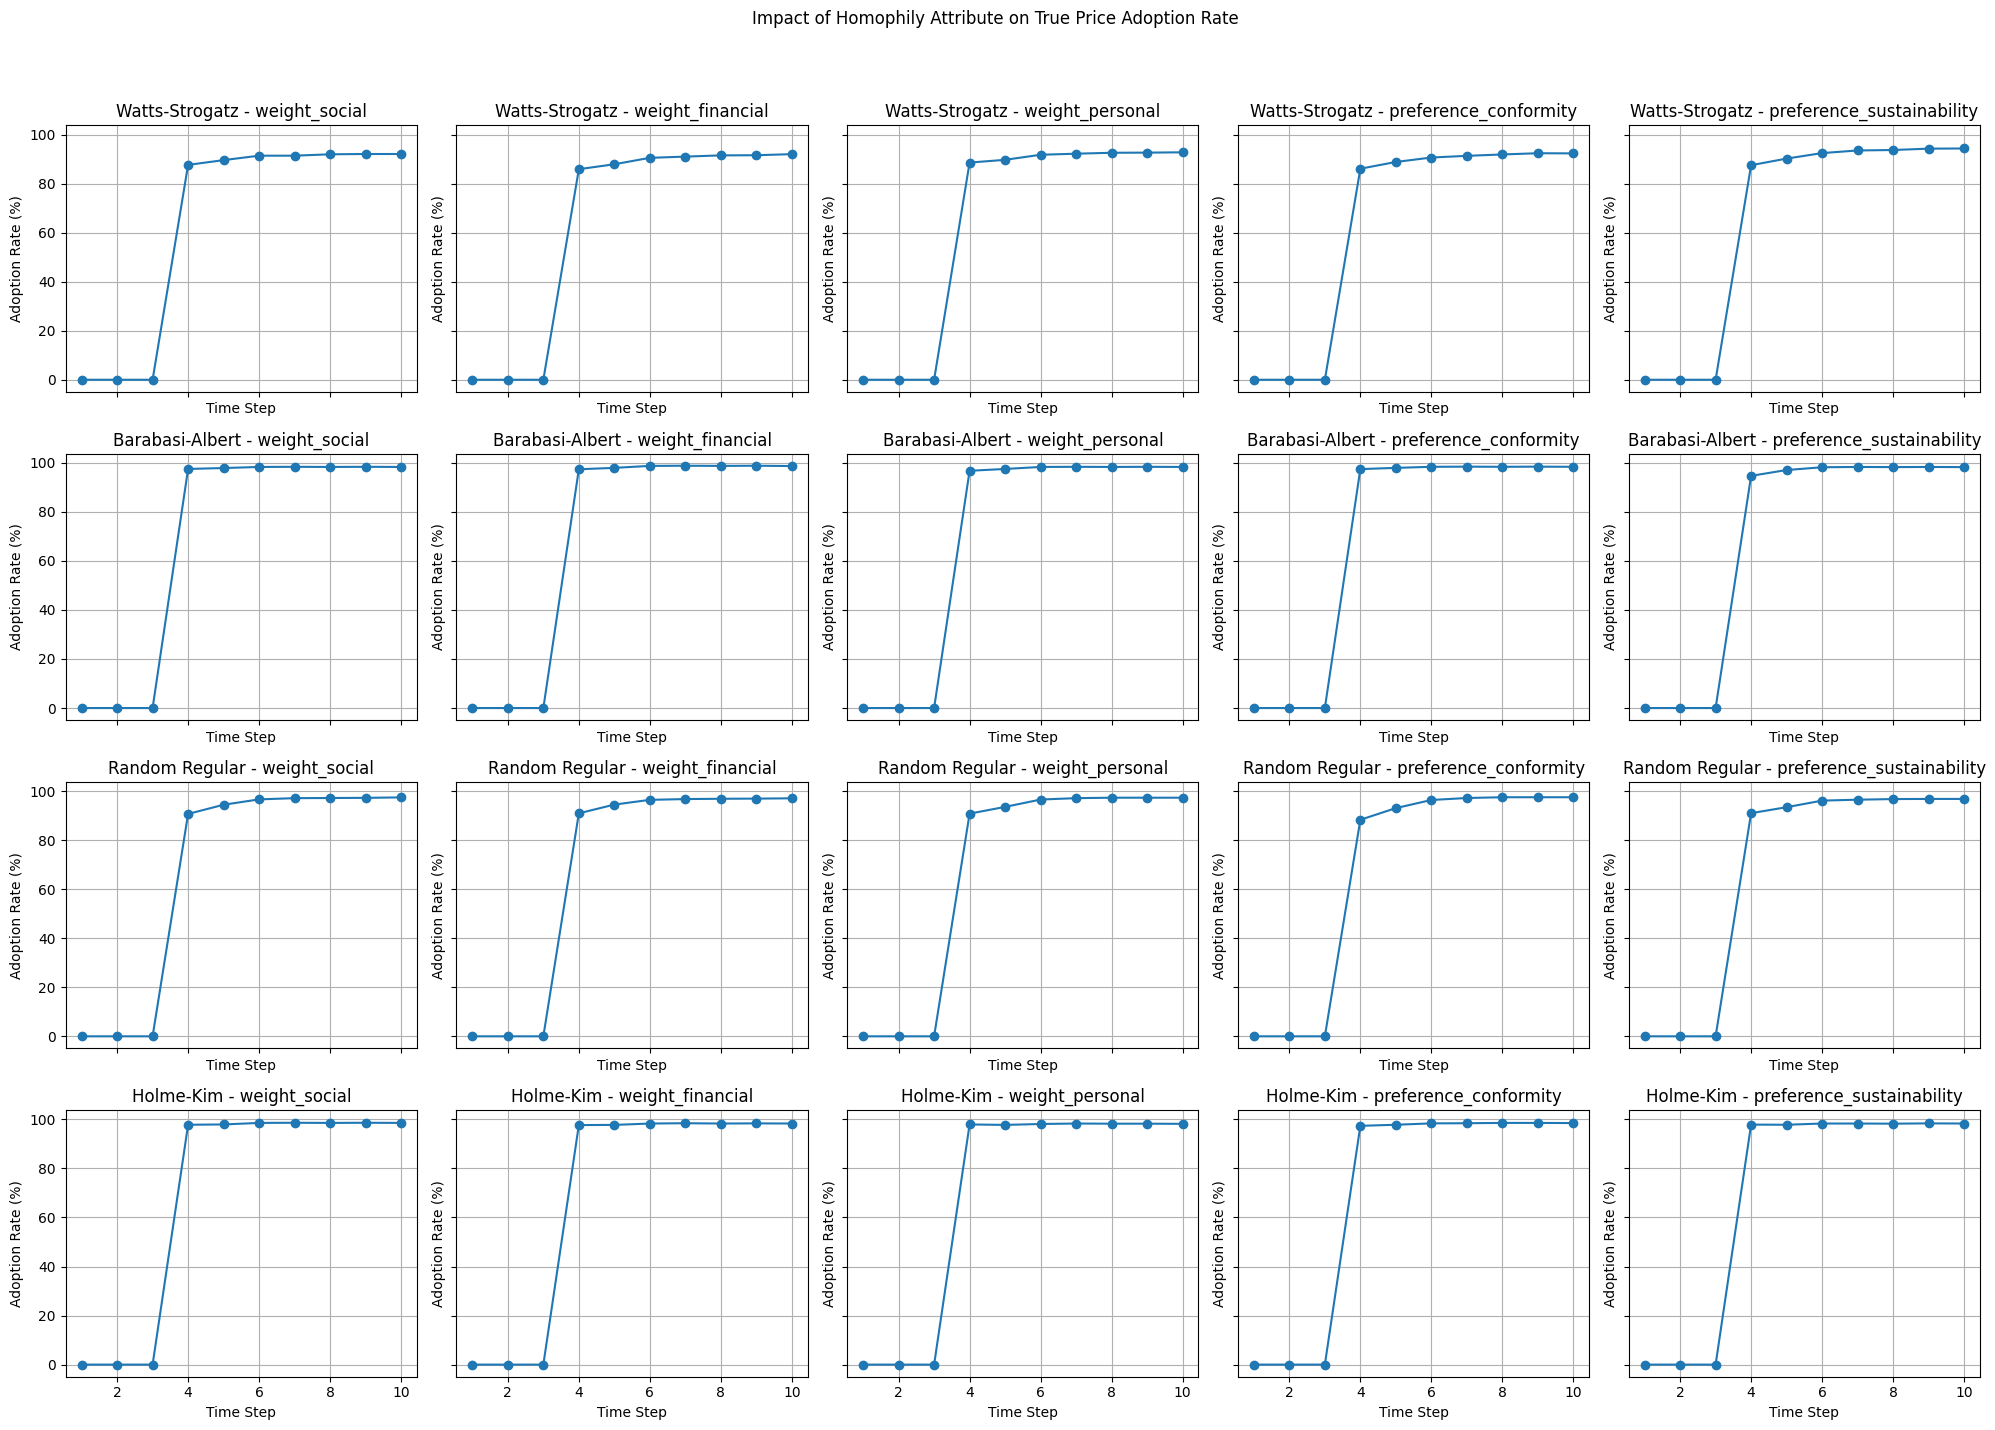

Running simulations for Watts-Strogatz network...


Simulation Progress: 100%|██████████| 10/10 [00:19<00:00,  1.92s/it]


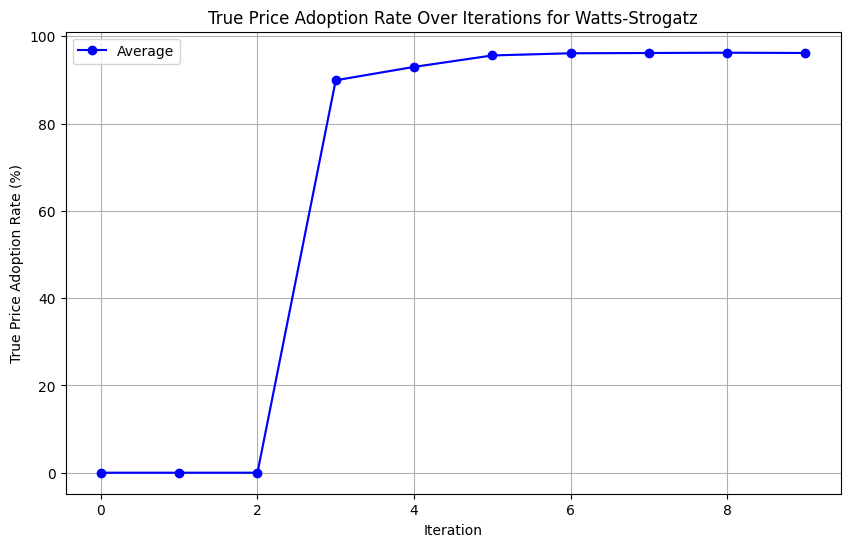

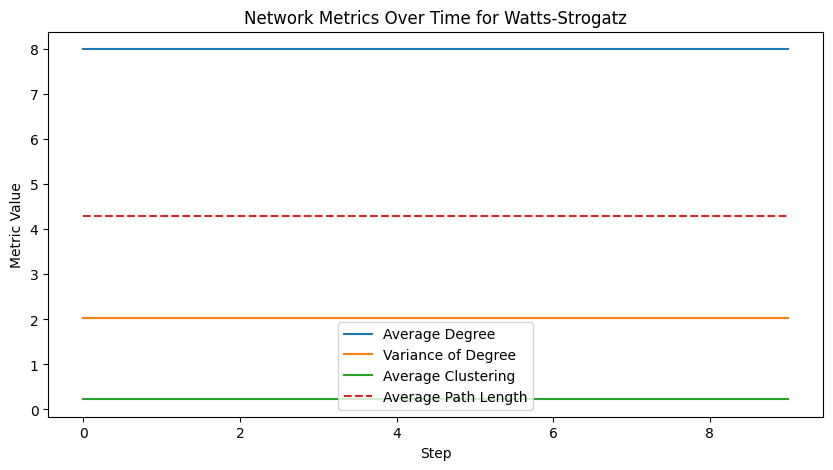

Running simulations for Barabasi-Albert network...


Simulation Progress: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it]


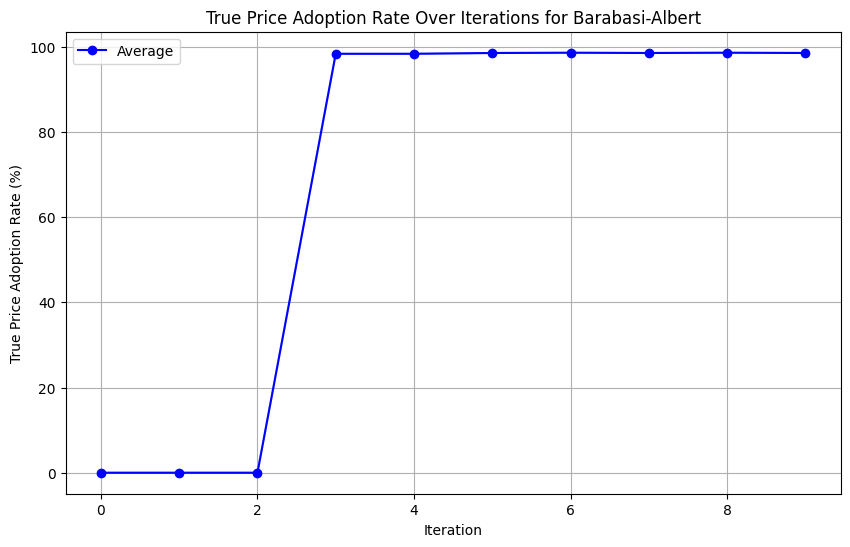

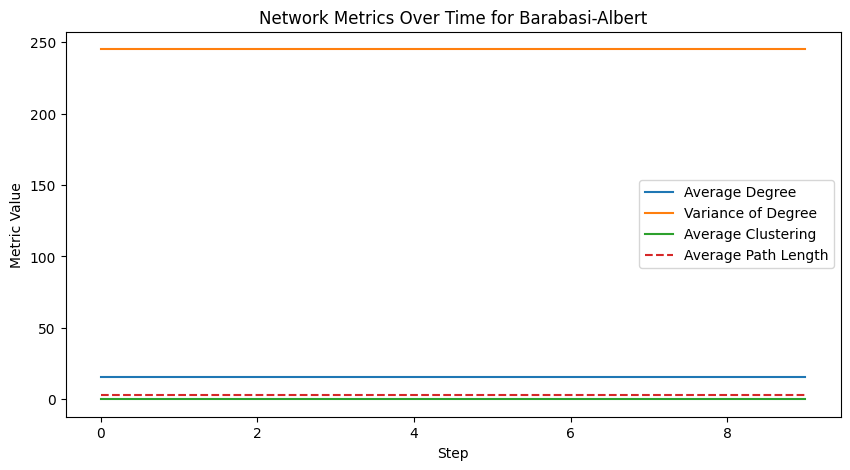

Running simulations for Random Regular network...


Simulation Progress: 100%|██████████| 10/10 [00:18<00:00,  1.85s/it]


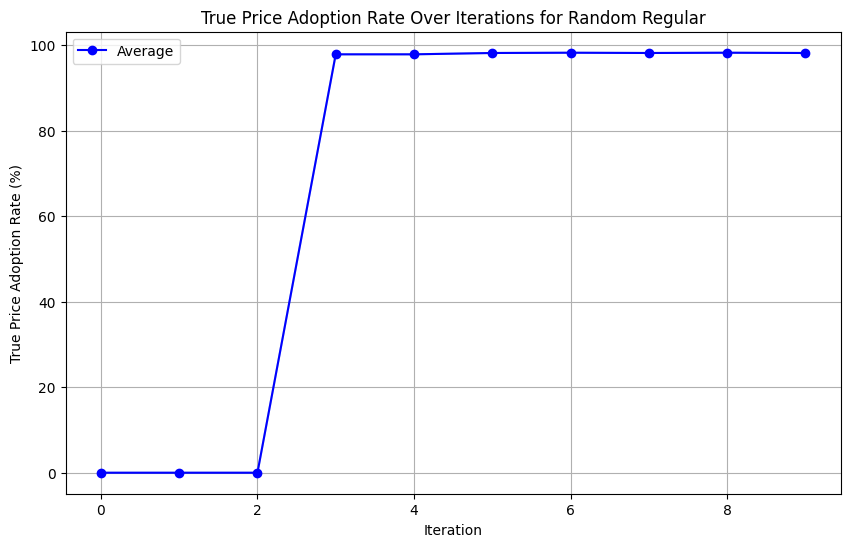

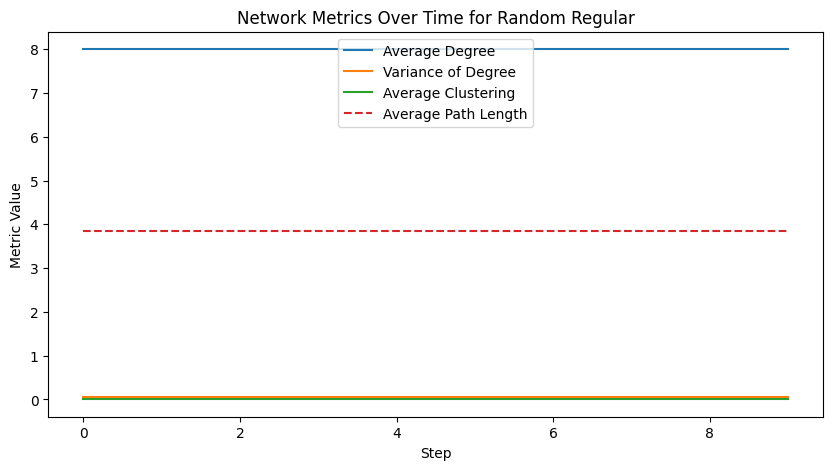

Running simulations for Holme-Kim network...


Simulation Progress: 100%|██████████| 10/10 [00:20<00:00,  2.01s/it]


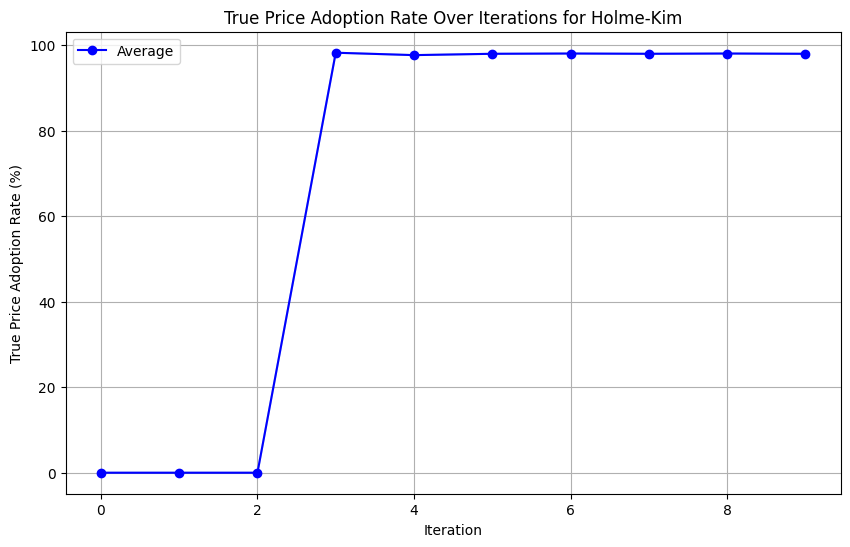

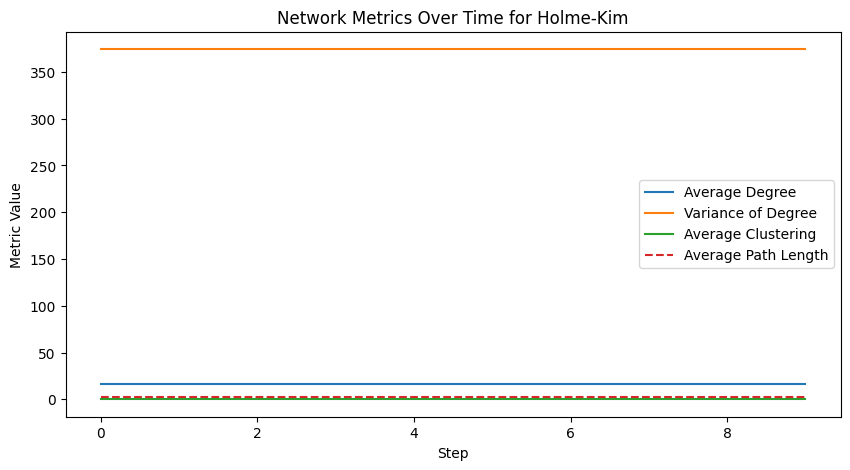

Simulation Progress: 100%|██████████| 10/10 [00:19<00:00,  1.93s/it]


Decision Mode Counts for Watts-Strogatz network:
      Repeat  Imitate  Deliberate  Social_Compare
Step                                             
1        126      977         163             334
2        336      951          37             276
3        384     1009          15             192
4       1030      109         276             185
5       1424       77          57              42
6       1461       75          35              29
7       1469       73          32              26
8       1473       71          30              26
9       1478       71          26              25
10      1480       71          24              25


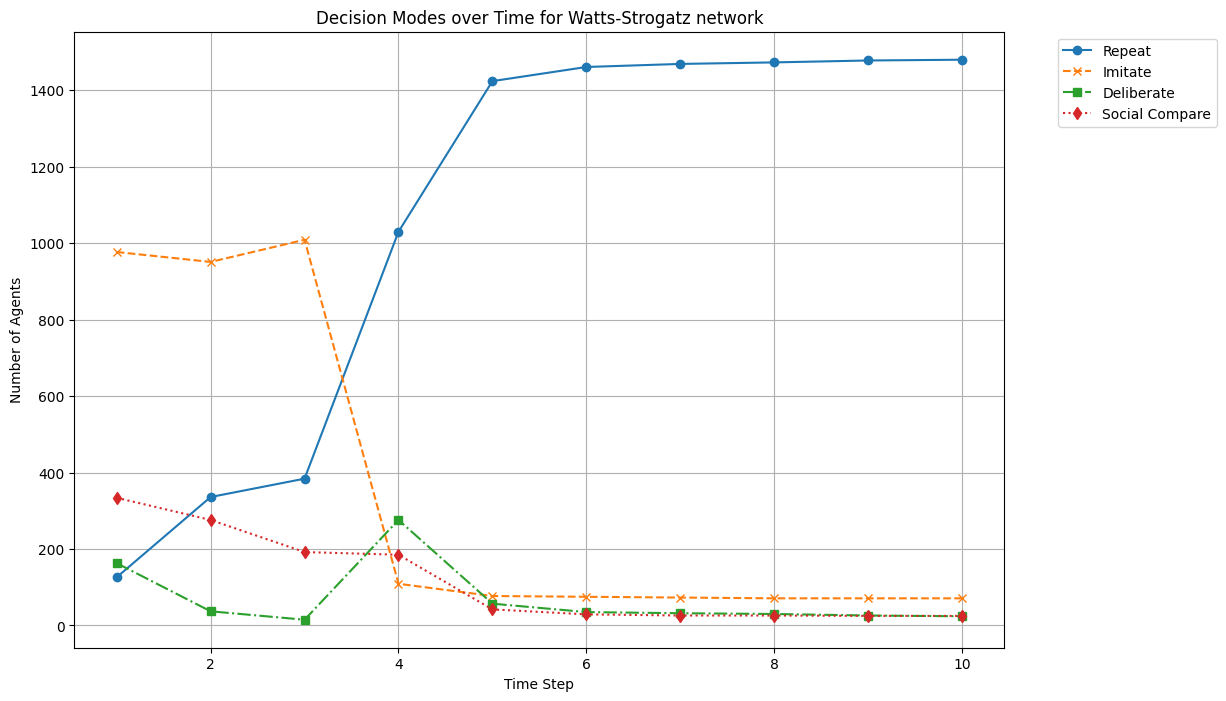

Simulation Progress: 100%|██████████| 10/10 [00:20<00:00,  2.01s/it]

Decision Mode Counts for Barabasi-Albert network:
      Repeat  Imitate  Deliberate  Social_Compare
Step                                             
1        126      977         163             334
2        363      974          34             229
3        442     1089           7              62
4       1232       72         197              99
5       1490       64          31              15
6       1495       63          28              14
7       1496       64          27              13
8       1496       63          28              13
9       1496       64          27              13
10      1496       63          28              13


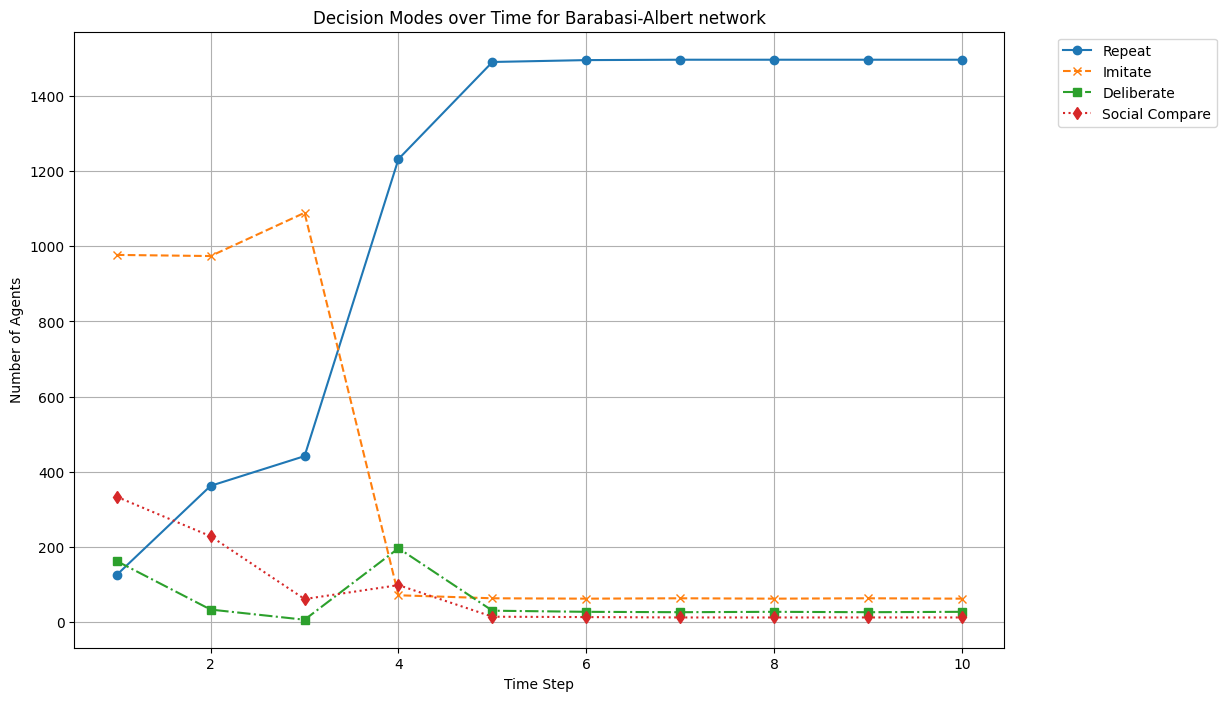

Simulation Progress: 100%|██████████| 10/10 [00:17<00:00,  1.76s/it]

Decision Mode Counts for Random Regular network:
      Repeat  Imitate  Deliberate  Social_Compare
Step                                             
1        126      977         163             334
2        333      915          49             303
3        404      987          10             199
4       1157       77         228             138
5       1485       63          35              17
6       1503       63          22              12
7       1504       66          22               8
8       1504       64          22              10
9       1504       66          22               8
10      1504       64          22              10


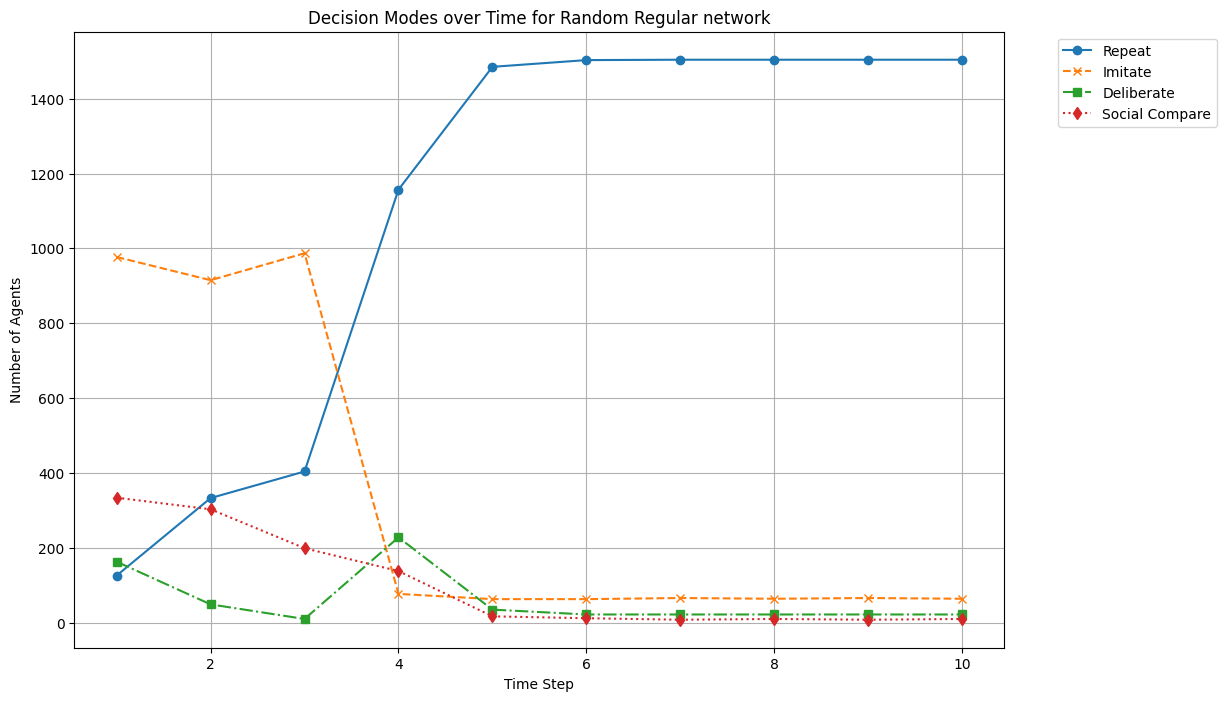

Simulation Progress: 100%|██████████| 10/10 [00:19<00:00,  1.98s/it]

Decision Mode Counts for Holme-Kim network:
      Repeat  Imitate  Deliberate  Social_Compare
Step                                             
1        126      977         163             334
2        332      911          54             303
3        433     1063           9              95
4       1208       69         206             117
5       1498       64          25              13
6       1507       60          21              12
7       1508       62          19              11
8       1508       60          20              12
9       1507       63          19              11
10      1508       60          20              12


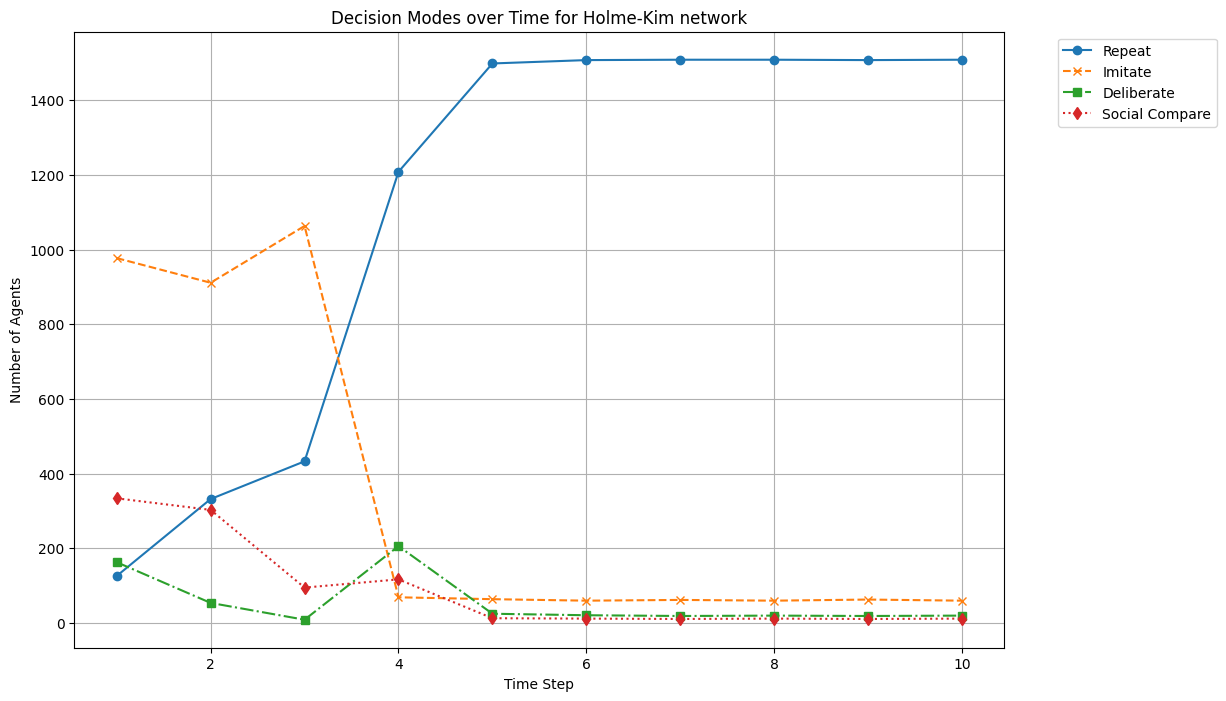

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mesa import Model
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
import networkx as nx

# Base configuration
base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'tolerance': 0.5,
    'seed': 42  # Seed for reproducibility
}

# Network configurations with a constant 'degree' parameter
network_configs = {
    'Watts-Strogatz': {
        'network_type': 'watts_strogatz',
        'network_params': {
            'n': 1600,
            'k': 4,  
            'p': 0.2
        }
    },
    'Barabasi-Albert': {
        'network_type': 'barabasi_albert',
        'network_params': {
            'n': 1600,
            'm': 4  
        }
    },
    'Random Regular': {
        'network_type': 'random_regular',
        'network_params': {
            'n': 1600,
            'd': 4  
        }
    },
    'Holme-Kim': {
        'network_type': 'holme_kim',
        'network_params': {
            'n': 1600,
            'm': 4,  
            'p': 0.1
        }
    }
}

# Define a range of homophily attributes
homophily_attributes = ['weight_social', 'weight_financial', 'weight_personal', 'preference_conformity', 'preference_sustainability']

# Hold the number of steps constant for each simulation
num_steps = 10

# Define the number of simulations for averaging
num_simulations = 3

# Function to run simulations for the network configurations
def run_simulation_for_networks(config, num_steps):
    results = { 'Adoption Rate': [], 'Satisfaction': [], 'Choice Changes': [], 'Decision Mode Changes': [], 'Decision Modes': [] }

    # Run the simulation
    model = ConsumatModel(config)

    # Debug: Print network properties
    G = model.get_network()
    print(f"Network: {config['network_type']}")
    print(f"Average degree: {np.mean([d for n, d in G.degree()])}")
    print(f"Rewiring probability: {config['network_params'].get('p', 'N/A')}")
    print(f"Clustering coefficient: {nx.average_clustering(G)}")
    if nx.is_connected(G):
        print(f"Average path length: {nx.average_shortest_path_length(G)}")
    else:
        print("Network is not connected")

    # Print the degree distribution
    degrees = [d for n, d in G.degree()]
    print(f"Degree distribution: {np.histogram(degrees, bins=range(max(degrees) + 1))}")

    # Check agent neighbors
    for agent in model.schedule.agents[:5]:  # Check the first 5 agents
        neighbors = model.get_neighbors_for_agent(agent)
        print(f"Agent {agent.unique_id} has {len(neighbors)} neighbors")
    
    model_data, agent_data = run_simulation(model, num_steps)
    
    # Extract the metrics from the DataFrame
    adoption_rates = model_data['True_Price_Adoption_Rate'].values
    average_satisfaction = model_data['Average_Satisfaction'].values
    average_choice_changes = model_data['Average_Choice_Changes'].values
    average_decision_mode_changes = model_data['Average_Decision_Mode_Changes'].values
    
    # Store the metrics for this network
    results['Adoption Rate'].append(adoption_rates)
    results['Satisfaction'].append(average_satisfaction)
    results['Choice Changes'].append(average_choice_changes)
    results['Decision Mode Changes'].append(average_decision_mode_changes)
    
    # Collect decision modes count over time
    decision_modes_count = agent_data.groupby('Step').sum()[['Repeat', 'Imitate', 'Deliberate', 'Social_Compare']]
    results['Decision Modes'] = decision_modes_count
    
    return results

# Function to run simulations for each homophily attribute
def run_simulation_for_homophily_attribute(config, homophily_attributes, num_steps):
    all_results = {}
    for attribute in homophily_attributes:
        config['homophily_attribute'] = attribute
        attribute_results = run_simulation_for_networks(config, num_steps)
        all_results[attribute] = attribute_results
    return all_results

# Run simulations and collect results for all networks
all_network_results = {}
for network_name, network_config in network_configs.items():
    config = base_config.copy()
    config.update(network_config)
    all_network_results[network_name] = run_simulation_for_homophily_attribute(config, homophily_attributes, num_steps)

# Plot the results for each network and homophily attribute
fig, axes = plt.subplots(len(network_configs), len(homophily_attributes), figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle('Impact of Homophily Attribute on True Price Adoption Rate')

for row_idx, (network_name, results_by_attribute) in enumerate(all_network_results.items()):
    for col_idx, (attribute, results) in enumerate(results_by_attribute.items()):
        ax = axes[row_idx, col_idx]
        adoption_rates = results['Adoption Rate'][0]  # Assuming one simulation
        ax.plot(range(1, num_steps + 1), adoption_rates, marker='o')
        ax.set_title(f'{network_name} - {attribute}')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('Adoption Rate (%)')
        ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Function to run the simulation
def run_simulation(model, num_steps):
    # List to store True Price Adoption Rates
    adoption_rates = []

    # Run the model for a specified number of steps with tqdm for progress tracking
    for _ in tqdm(range(num_steps), desc='Simulation Progress'):
        model.step()
        # Calculate and append the current adoption rate to the list
        current_adoption_rate = model.calculate_true_price_adoption_rate()
        adoption_rates.append(current_adoption_rate)

    # Retrieve collected data from the model's DataCollector
    model_data = model.datacollector.get_model_vars_dataframe()
    agent_data = model.datacollector.get_agent_vars_dataframe()
    # Append the adoption rates to the DataFrame
    model_data['Adoption Rates'] = adoption_rates

    return model_data, agent_data

# Example network configurations (replace with actual configurations)
network_configurations = {
    'Watts-Strogatz': watts_strogatz_config,
    'Barabasi-Albert': barabasi_albert_config,
    'Random Regular': random_regular_config,
    'Holme-Kim': holme_kim_config
}

# Define the number of simulations and steps
num_simulations = 1
num_steps = 10

# Run all simulations
results = run_all_simulations(network_configurations, num_steps, num_simulations)

# Generate and plot decision mode counts
for network_name, config in network_configurations.items():
    model = ConsumatModel(config)
    _, agent_data = run_simulation(model, num_steps)
    
    # Generate the decision modes count DataFrame
    decision_modes_count = generate_decision_modes_count(agent_data)
    print(f"Decision Mode Counts for {network_name} network:")
    print(decision_modes_count)

    # Plot the decision modes count over time
    plt.figure(figsize=(12, 8))
    plt.plot(decision_modes_count.index, decision_modes_count['Repeat'], label='Repeat', linestyle='-', marker='o')
    plt.plot(decision_modes_count.index, decision_modes_count['Imitate'], label='Imitate', linestyle='--', marker='x')
    plt.plot(decision_modes_count.index, decision_modes_count['Deliberate'], label='Deliberate', linestyle='-.', marker='s')
    plt.plot(decision_modes_count.index, decision_modes_count['Social_Compare'], label='Social Compare', linestyle=':', marker='d')
    plt.title(f'Decision Modes over Time for {network_name} network')
    plt.xlabel('Time Step')
    plt.ylabel('Number of Agents')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()


## Global Sensitivity Analysis

Sobol indices

Saltelli sampling

Pick key parameters (e.g. alpha, beta, rewiring probability) and key measures (true price adoption rate...)

### Sensitivity Analysis

### GSA - Weight Social

In [28]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'homophily_attribute': 'weight_social',  # Attribute to use for homophily
    'tolerance': 0.5,  # Tolerance range for homophily
    'seed': 42  # Seed for reproducibility
}

# Configuration for Watts-Strogatz network
watts_strogatz_config = base_config.copy()
watts_strogatz_config.update({
    'network_type': 'watts_strogatz',
    'network_params': {
        'n': 1600,
        'k': 8,
        'p': 0.3
    }
})


# Configuration for Barabasi-Albert network
barabasi_albert_config = base_config.copy()
barabasi_albert_config.update({
    'network_type': 'barabasi_albert',
    'network_params': {
        'n': 1600,
        'm': 8
    }
})

# Configuration for Random Regular network
random_regular_config = base_config.copy()
random_regular_config.update({
    'network_type': 'random_regular',
    'network_params': {
        'n': 1600,
        'd': 8
    }
})

# Configuration for Holme-Kim network
holme_kim_config = base_config.copy()
holme_kim_config.update({
    'network_type': 'holme_kim',
    'network_params': {
        'n': 1600,
        'm': 8,
        'p': 0.3
    }
})


# Define the model inputs for each network type
network_problems = {
    'Watts-Strogatz': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'tolerance', 'k', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1],  [2, 10], [0, 1]]  # Define bounds for k and p
    },
    'Barabasi-Albert': {
        'num_vars': 5,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'tolerance' ,'m'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1],  [1, 10]]  # Define bounds for m
    },
    'Random Regular': {
        'num_vars': 5,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold',  'tolerance','d'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1], [2, 10]]  # Define bounds for d
    },
    'Holme-Kim': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'tolerance', 'm', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1], [1, 10], [0, 1]]  # Define bounds for m and p
    }
}

In [31]:
# Number of samples
num_samples = 256

# Generate samples for each network problem
samples = {}
for network_name, problem in network_problems.items():
    samples[network_name] = saltelli.sample(problem, num_samples)


/var/folders/53/cl5y6r2x7n5_942j6h59yyh00000gn/T/ipykernel_3492/3267385317.py:7: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  samples[network_name] = saltelli.sample(problem, num_samples)


In [32]:
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
from tqdm import tqdm
from SALib.sample import saltelli
from SALib.analyze import sobol
import json

def collect_simulation_data(model, num_steps):
    collected_data = {
        'Step': [],
        'Adoption Rate': [],
        'Avg_F_Satisfaction': [],
        'Avg_S_Satisfaction': [],
        'Avg_P_Satisfaction': [],
        'Avg_F_Uncertainty': [],
        'Avg_S_Uncertainty': [],
        'Avg_P_Uncertainty': []
    }

    for step in range(num_steps):
        model.step()
        collected_data['Step'].append(step)
        collected_data['Adoption Rate'].append(model.calculate_true_price_adoption_rate())
        collected_data['Avg_F_Satisfaction'].append(np.mean([agent.F_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_S_Satisfaction'].append(np.mean([agent.S_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_P_Satisfaction'].append(np.mean([agent.P_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_F_Uncertainty'].append(np.mean([agent.F_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_S_Uncertainty'].append(np.mean([agent.S_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_P_Uncertainty'].append(np.mean([agent.P_uncertainty for agent in model.schedule.agents]))

    model_data = pd.DataFrame(collected_data)
    return model_data

def run_single_simulation(params, config, network_name, num_steps):
    config = config.copy()
    config['TP_percentage'] = params[0]
    config['satisfaction_threshold'] = params[1]
    config['uncertainty_threshold'] = params[2]
    config['tolerance'] = params[3]

    if network_name == 'Watts-Strogatz':
        config['network_params']['k'] = int(params[4])
        config['network_params']['p'] = params[5]
    elif network_name == 'Barabasi-Albert':
        config['network_params']['m'] = int(params[4])
    elif network_name == 'Random Regular':
        config['network_params']['d'] = int(params[4])
    elif network_name == 'Holme-Kim':
        config['network_params']['m'] = int(params[4])
        config['network_params']['p'] = params[5]

    model = ConsumatModel(config)
    model_data = collect_simulation_data(model, num_steps)
    final_step_data = model_data.iloc[-1]

    return [
        final_step_data['Adoption Rate'],
        final_step_data['Avg_F_Satisfaction'],
        final_step_data['Avg_S_Satisfaction'],
        final_step_data['Avg_P_Satisfaction'],
        final_step_data['Avg_F_Uncertainty'],
        final_step_data['Avg_S_Uncertainty'],
        final_step_data['Avg_P_Uncertainty']
    ]

def run_gsa_simulation_parallel(network_name, config, samples, num_steps, n_jobs=-1):
    all_results = Parallel(n_jobs=n_jobs)(
        delayed(run_single_simulation)(params, config, network_name, num_steps)
        for params in tqdm(samples, desc=f'Running simulations for {network_name}')
    )
    return np.array(all_results)

num_steps = 10

# Run GSA for each network
for network_name, config in network_configurations.items():
    print(f"Running GSA for {network_name} network...")
    config = base_config.copy()
    config.update(network_configs[network_name])
    all_results = run_gsa_simulation_parallel(network_name, config, samples[network_name], num_steps)
    
    results = {}
    
    # Perform Sobol sensitivity analysis
    for i, output in enumerate(['Adoption Rate', 'Avg_F_Satisfaction', 'Avg_S_Satisfaction', 'Avg_P_Satisfaction', 'Avg_F_Uncertainty', 'Avg_S_Uncertainty', 'Avg_P_Uncertainty']):
        Si = sobol.analyze(network_problems[network_name], all_results[:, i], print_to_console=True)
        results[output] = {
            'S1': Si['S1'].tolist(),
            'ST': Si['ST'].tolist(),
            'S2': Si['S2'].tolist()
        }
        print(f'Sensitivity analysis for {output} ({network_name} network with weight social homophily):')
        print(Si)
    
    for output, result in results.items():
        df = pd.DataFrame(result)
        df.to_csv(f'sensitivity_results_{network_name}_weightsocial_{output}.csv', index=False)


Running GSA for Watts-Strogatz network...


Running simulations for Watts-Strogatz: 100%|██████████| 56/56 [06:22<00:00,  6.83s/it]


                              ST      ST_conf
TP_percentage           1.397529     1.067331
satisfaction_threshold  0.070352     0.950469
uncertainty_threshold   0.004334    22.048526
tolerance               0.000120     0.612459
k                       0.008095    41.181748
p                       0.379930  1934.415324
                              S1      S1_conf
TP_percentage           1.280397    25.067929
satisfaction_threshold  0.209035    41.292090
uncertainty_threshold   0.040076   198.377357
tolerance              -0.006492    33.062949
k                       0.056087   271.115491
p                      -0.356471  1858.139402
                                                       S2     S2_conf
(TP_percentage, satisfaction_threshold)         -0.451143  162.711568
(TP_percentage, uncertainty_threshold)          -0.078487  186.497597
(TP_percentage, tolerance)                      -0.085180  151.342404
(TP_percentage, k)                              -0.079668  197.547042
(TP_pe

Running simulations for Barabasi-Albert:  33%|███▎      | 16/48 [00:06<00:13,  2.36it/s]

KeyboardInterrupt: 

GSA - Weight Financial

In [ ]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'homophily_attribute': 'weight_financial',  # Attribute to use for homophily
    'tolerance': 0.5,  # Tolerance range for homophily
    'seed': 42  # Seed for reproducibility
}

# Configuration for Watts-Strogatz network
watts_strogatz_config = base_config.copy()
watts_strogatz_config.update({
    'network_type': 'watts_strogatz',
    'network_params': {
        'n': 1600,
        'k': 8,
        'p': 0.3
    }
})


# Configuration for Barabasi-Albert network
barabasi_albert_config = base_config.copy()
barabasi_albert_config.update({
    'network_type': 'barabasi_albert',
    'network_params': {
        'n': 1600,
        'm': 8
    }
})

# Configuration for Random Regular network
random_regular_config = base_config.copy()
random_regular_config.update({
    'network_type': 'random_regular',
    'network_params': {
        'n': 1600,
        'd': 8
    }
})

# Configuration for Holme-Kim network
holme_kim_config = base_config.copy()
holme_kim_config.update({
    'network_type': 'holme_kim',
    'network_params': {
        'n': 1600,
        'm': 8,
        'p': 0.3
    }
})


# Define the model inputs for each network type
network_problems = {
    'Watts-Strogatz': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'tolerance', 'k', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1],  [2, 10], [0, 1]]  # Define bounds for k and p
    },
    'Barabasi-Albert': {
        'num_vars': 5,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'tolerance' ,'m'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1],  [1, 10]]  # Define bounds for m
    },
    'Random Regular': {
        'num_vars': 5,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold',  'tolerance','d'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1], [2, 10]]  # Define bounds for d
    },
    'Holme-Kim': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'tolerance', 'm', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1], [1, 10], [0, 1]]  # Define bounds for m and p
    }
}

# Number of samples
num_samples = 256

# Generate samples for each network problem
samples = {}
for network_name, problem in network_problems.items():
    samples[network_name] = saltelli.sample(problem, num_samples)
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
from tqdm import tqdm
from SALib.sample import saltelli
from SALib.analyze import sobol
import json

def collect_simulation_data(model, num_steps):
    collected_data = {
        'Step': [],
        'Adoption Rate': [],
        'Avg_F_Satisfaction': [],
        'Avg_S_Satisfaction': [],
        'Avg_P_Satisfaction': [],
        'Avg_F_Uncertainty': [],
        'Avg_S_Uncertainty': [],
        'Avg_P_Uncertainty': []
    }

    for step in range(num_steps):
        model.step()
        collected_data['Step'].append(step)
        collected_data['Adoption Rate'].append(model.calculate_true_price_adoption_rate())
        collected_data['Avg_F_Satisfaction'].append(np.mean([agent.F_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_S_Satisfaction'].append(np.mean([agent.S_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_P_Satisfaction'].append(np.mean([agent.P_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_F_Uncertainty'].append(np.mean([agent.F_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_S_Uncertainty'].append(np.mean([agent.S_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_P_Uncertainty'].append(np.mean([agent.P_uncertainty for agent in model.schedule.agents]))

    model_data = pd.DataFrame(collected_data)
    return model_data

def run_single_simulation(params, config, network_name, num_steps):
    config = config.copy()
    config['TP_percentage'] = params[0]
    config['satisfaction_threshold'] = params[1]
    config['uncertainty_threshold'] = params[2]
    config['tolerance'] = params[3]

    if network_name == 'Watts-Strogatz':
        config['network_params']['k'] = int(params[4])
        config['network_params']['p'] = params[5]
    elif network_name == 'Barabasi-Albert':
        config['network_params']['m'] = int(params[4])
    elif network_name == 'Random Regular':
        config['network_params']['d'] = int(params[4])
    elif network_name == 'Holme-Kim':
        config['network_params']['m'] = int(params[4])
        config['network_params']['p'] = params[5]

    model = ConsumatModel(config)
    model_data = collect_simulation_data(model, num_steps)
    final_step_data = model_data.iloc[-1]

    return [
        final_step_data['Adoption Rate'],
        final_step_data['Avg_F_Satisfaction'],
        final_step_data['Avg_S_Satisfaction'],
        final_step_data['Avg_P_Satisfaction'],
        final_step_data['Avg_F_Uncertainty'],
        final_step_data['Avg_S_Uncertainty'],
        final_step_data['Avg_P_Uncertainty']
    ]

def run_gsa_simulation_parallel(network_name, config, samples, num_steps, n_jobs=-1):
    all_results = Parallel(n_jobs=n_jobs)(
        delayed(run_single_simulation)(params, config, network_name, num_steps)
        for params in tqdm(samples, desc=f'Running simulations for {network_name}')
    )
    return np.array(all_results)

num_steps = 10

# Run GSA for each network
for network_name, config in network_configurations.items():
    print(f"Running GSA for {network_name} network...")
    config = base_config.copy()
    config.update(network_configs[network_name])
    all_results = run_gsa_simulation_parallel(network_name, config, samples[network_name], num_steps)
    
    results = {}
    
    # Perform Sobol sensitivity analysis
    for i, output in enumerate(['Adoption Rate', 'Avg_F_Satisfaction', 'Avg_S_Satisfaction', 'Avg_P_Satisfaction', 'Avg_F_Uncertainty', 'Avg_S_Uncertainty', 'Avg_P_Uncertainty']):
        Si = sobol.analyze(network_problems[network_name], all_results[:, i], print_to_console=True)
        results[output] = {
            'S1': Si['S1'].tolist(),
            'ST': Si['ST'].tolist(),
            'S2': Si['S2'].tolist()
        }
        print(f'Sensitivity analysis for {output} ({network_name} network with Weight Financial homophily):')
        print(Si)
    
    for output, result in results.items():
        df = pd.DataFrame(result)
        df.to_csv(f'sensitivity_results_{network_name}_weightfinancial_{output}.csv', index=False)


GSA Weight Personal

In [ ]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'homophily_attribute': 'weight_personal',  # Attribute to use for homophily
    'tolerance': 0.5,  # Tolerance range for homophily
    'seed': 42  # Seed for reproducibility
}

# Configuration for Watts-Strogatz network
watts_strogatz_config = base_config.copy()
watts_strogatz_config.update({
    'network_type': 'watts_strogatz',
    'network_params': {
        'n': 1600,
        'k': 8,
        'p': 0.3
    }
})


# Configuration for Barabasi-Albert network
barabasi_albert_config = base_config.copy()
barabasi_albert_config.update({
    'network_type': 'barabasi_albert',
    'network_params': {
        'n': 1600,
        'm': 8
    }
})

# Configuration for Random Regular network
random_regular_config = base_config.copy()
random_regular_config.update({
    'network_type': 'random_regular',
    'network_params': {
        'n': 1600,
        'd': 8
    }
})

# Configuration for Holme-Kim network
holme_kim_config = base_config.copy()
holme_kim_config.update({
    'network_type': 'holme_kim',
    'network_params': {
        'n': 1600,
        'm': 8,
        'p': 0.3
    }
})


# Define the model inputs for each network type
network_problems = {
    'Watts-Strogatz': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'tolerance', 'k', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1],  [2, 10], [0, 1]]  # Define bounds for k and p
    },
    'Barabasi-Albert': {
        'num_vars': 5,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'tolerance' ,'m'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1],  [1, 10]]  # Define bounds for m
    },
    'Random Regular': {
        'num_vars': 5,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold',  'tolerance','d'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1], [2, 10]]  # Define bounds for d
    },
    'Holme-Kim': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'tolerance', 'm', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1], [1, 10], [0, 1]]  # Define bounds for m and p
    }
}

# Number of samples
num_samples = 256

# Generate samples for each network problem
samples = {}
for network_name, problem in network_problems.items():
    samples[network_name] = saltelli.sample(problem, num_samples)
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
from tqdm import tqdm
from SALib.sample import saltelli
from SALib.analyze import sobol
import json

def collect_simulation_data(model, num_steps):
    collected_data = {
        'Step': [],
        'Adoption Rate': [],
        'Avg_F_Satisfaction': [],
        'Avg_S_Satisfaction': [],
        'Avg_P_Satisfaction': [],
        'Avg_F_Uncertainty': [],
        'Avg_S_Uncertainty': [],
        'Avg_P_Uncertainty': []
    }

    for step in range(num_steps):
        model.step()
        collected_data['Step'].append(step)
        collected_data['Adoption Rate'].append(model.calculate_true_price_adoption_rate())
        collected_data['Avg_F_Satisfaction'].append(np.mean([agent.F_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_S_Satisfaction'].append(np.mean([agent.S_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_P_Satisfaction'].append(np.mean([agent.P_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_F_Uncertainty'].append(np.mean([agent.F_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_S_Uncertainty'].append(np.mean([agent.S_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_P_Uncertainty'].append(np.mean([agent.P_uncertainty for agent in model.schedule.agents]))

    model_data = pd.DataFrame(collected_data)
    return model_data

def run_single_simulation(params, config, network_name, num_steps):
    config = config.copy()
    config['TP_percentage'] = params[0]
    config['satisfaction_threshold'] = params[1]
    config['uncertainty_threshold'] = params[2]
    config['tolerance'] = params[3]

    if network_name == 'Watts-Strogatz':
        config['network_params']['k'] = int(params[4])
        config['network_params']['p'] = params[5]
    elif network_name == 'Barabasi-Albert':
        config['network_params']['m'] = int(params[4])
    elif network_name == 'Random Regular':
        config['network_params']['d'] = int(params[4])
    elif network_name == 'Holme-Kim':
        config['network_params']['m'] = int(params[4])
        config['network_params']['p'] = params[5]

    model = ConsumatModel(config)
    model_data = collect_simulation_data(model, num_steps)
    final_step_data = model_data.iloc[-1]

    return [
        final_step_data['Adoption Rate'],
        final_step_data['Avg_F_Satisfaction'],
        final_step_data['Avg_S_Satisfaction'],
        final_step_data['Avg_P_Satisfaction'],
        final_step_data['Avg_F_Uncertainty'],
        final_step_data['Avg_S_Uncertainty'],
        final_step_data['Avg_P_Uncertainty']
    ]

def run_gsa_simulation_parallel(network_name, config, samples, num_steps, n_jobs=-1):
    all_results = Parallel(n_jobs=n_jobs)(
        delayed(run_single_simulation)(params, config, network_name, num_steps)
        for params in tqdm(samples, desc=f'Running simulations for {network_name}')
    )
    return np.array(all_results)

num_steps = 10

# Run GSA for each network
for network_name, config in network_configurations.items():
    print(f"Running GSA for {network_name} network...")
    config = base_config.copy()
    config.update(network_configs[network_name])
    all_results = run_gsa_simulation_parallel(network_name, config, samples[network_name], num_steps)
    
    results = {}
    
    # Perform Sobol sensitivity analysis
    for i, output in enumerate(['Adoption Rate', 'Avg_F_Satisfaction', 'Avg_S_Satisfaction', 'Avg_P_Satisfaction', 'Avg_F_Uncertainty', 'Avg_S_Uncertainty', 'Avg_P_Uncertainty']):
        Si = sobol.analyze(network_problems[network_name], all_results[:, i], print_to_console=True)
        results[output] = {
            'S1': Si['S1'].tolist(),
            'ST': Si['ST'].tolist(),
            'S2': Si['S2'].tolist()
        }
        print(f'Sensitivity analysis for {output} ({network_name} network with Weight Personal homophily):')
        print(Si)
    
    for output, result in results.items():
        df = pd.DataFrame(result)
        df.to_csv(f'sensitivity_results_{network_name}_weightpersonal_{output}.csv', index=False)


GSA Preference Sustainability

In [ ]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'homophily_attribute': 'preference_sustainability',  # Attribute to use for homophily
    'tolerance': 0.5,  # Tolerance range for homophily
    'seed': 42  # Seed for reproducibility
}

# Configuration for Watts-Strogatz network
watts_strogatz_config = base_config.copy()
watts_strogatz_config.update({
    'network_type': 'watts_strogatz',
    'network_params': {
        'n': 1600,
        'k': 8,
        'p': 0.3
    }
})


# Configuration for Barabasi-Albert network
barabasi_albert_config = base_config.copy()
barabasi_albert_config.update({
    'network_type': 'barabasi_albert',
    'network_params': {
        'n': 1600,
        'm': 8
    }
})

# Configuration for Random Regular network
random_regular_config = base_config.copy()
random_regular_config.update({
    'network_type': 'random_regular',
    'network_params': {
        'n': 1600,
        'd': 8
    }
})

# Configuration for Holme-Kim network
holme_kim_config = base_config.copy()
holme_kim_config.update({
    'network_type': 'holme_kim',
    'network_params': {
        'n': 1600,
        'm': 8,
        'p': 0.3
    }
})


# Define the model inputs for each network type
network_problems = {
    'Watts-Strogatz': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'tolerance', 'k', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1],  [2, 10], [0, 1]]  # Define bounds for k and p
    },
    'Barabasi-Albert': {
        'num_vars': 5,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'tolerance' ,'m'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1],  [1, 10]]  # Define bounds for m
    },
    'Random Regular': {
        'num_vars': 5,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold',  'tolerance','d'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1], [2, 10]]  # Define bounds for d
    },
    'Holme-Kim': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'tolerance', 'm', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1], [1, 10], [0, 1]]  # Define bounds for m and p
    }
}

# Number of samples
num_samples = 256

# Generate samples for each network problem
samples = {}
for network_name, problem in network_problems.items():
    samples[network_name] = saltelli.sample(problem, num_samples)
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
from tqdm import tqdm
from SALib.sample import saltelli
from SALib.analyze import sobol
import json

def collect_simulation_data(model, num_steps):
    collected_data = {
        'Step': [],
        'Adoption Rate': [],
        'Avg_F_Satisfaction': [],
        'Avg_S_Satisfaction': [],
        'Avg_P_Satisfaction': [],
        'Avg_F_Uncertainty': [],
        'Avg_S_Uncertainty': [],
        'Avg_P_Uncertainty': []
    }

    for step in range(num_steps):
        model.step()
        collected_data['Step'].append(step)
        collected_data['Adoption Rate'].append(model.calculate_true_price_adoption_rate())
        collected_data['Avg_F_Satisfaction'].append(np.mean([agent.F_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_S_Satisfaction'].append(np.mean([agent.S_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_P_Satisfaction'].append(np.mean([agent.P_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_F_Uncertainty'].append(np.mean([agent.F_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_S_Uncertainty'].append(np.mean([agent.S_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_P_Uncertainty'].append(np.mean([agent.P_uncertainty for agent in model.schedule.agents]))

    model_data = pd.DataFrame(collected_data)
    return model_data

def run_single_simulation(params, config, network_name, num_steps):
    config = config.copy()
    config['TP_percentage'] = params[0]
    config['satisfaction_threshold'] = params[1]
    config['uncertainty_threshold'] = params[2]
    config['tolerance'] = params[3]

    if network_name == 'Watts-Strogatz':
        config['network_params']['k'] = int(params[4])
        config['network_params']['p'] = params[5]
    elif network_name == 'Barabasi-Albert':
        config['network_params']['m'] = int(params[4])
    elif network_name == 'Random Regular':
        config['network_params']['d'] = int(params[4])
    elif network_name == 'Holme-Kim':
        config['network_params']['m'] = int(params[4])
        config['network_params']['p'] = params[5]

    model = ConsumatModel(config)
    model_data = collect_simulation_data(model, num_steps)
    final_step_data = model_data.iloc[-1]

    return [
        final_step_data['Adoption Rate'],
        final_step_data['Avg_F_Satisfaction'],
        final_step_data['Avg_S_Satisfaction'],
        final_step_data['Avg_P_Satisfaction'],
        final_step_data['Avg_F_Uncertainty'],
        final_step_data['Avg_S_Uncertainty'],
        final_step_data['Avg_P_Uncertainty']
    ]

def run_gsa_simulation_parallel(network_name, config, samples, num_steps, n_jobs=-1):
    all_results = Parallel(n_jobs=n_jobs)(
        delayed(run_single_simulation)(params, config, network_name, num_steps)
        for params in tqdm(samples, desc=f'Running simulations for {network_name}')
    )
    return np.array(all_results)

num_steps = 10

# Run GSA for each network
for network_name, config in network_configurations.items():
    print(f"Running GSA for {network_name} network...")
    config = base_config.copy()
    config.update(network_configs[network_name])
    all_results = run_gsa_simulation_parallel(network_name, config, samples[network_name], num_steps)
    
    results = {}
    
    # Perform Sobol sensitivity analysis
    for i, output in enumerate(['Adoption Rate', 'Avg_F_Satisfaction', 'Avg_S_Satisfaction', 'Avg_P_Satisfaction', 'Avg_F_Uncertainty', 'Avg_S_Uncertainty', 'Avg_P_Uncertainty']):
        Si = sobol.analyze(network_problems[network_name], all_results[:, i], print_to_console=True)
        results[output] = {
            'S1': Si['S1'].tolist(),
            'ST': Si['ST'].tolist(),
            'S2': Si['S2'].tolist()
        }
        print(f'Sensitivity analysis for {output} ({network_name} network with preference sustainability homophily):')
        print(Si)
    
    for output, result in results.items():
        df = pd.DataFrame(result)
        df.to_csv(f'sensitivity_results_{network_name}_preferencesustainability_{output}.csv', index=False)


GSA Preference Conformity

In [ ]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'homophily_attribute': 'preference_conformity',  # Attribute to use for homophily
    'tolerance': 0.5,  # Tolerance range for homophily
    'seed': 42  # Seed for reproducibility
}

# Configuration for Watts-Strogatz network
watts_strogatz_config = base_config.copy()
watts_strogatz_config.update({
    'network_type': 'watts_strogatz',
    'network_params': {
        'n': 1600,
        'k': 8,
        'p': 0.3
    }
})


# Configuration for Barabasi-Albert network
barabasi_albert_config = base_config.copy()
barabasi_albert_config.update({
    'network_type': 'barabasi_albert',
    'network_params': {
        'n': 1600,
        'm': 8
    }
})

# Configuration for Random Regular network
random_regular_config = base_config.copy()
random_regular_config.update({
    'network_type': 'random_regular',
    'network_params': {
        'n': 1600,
        'd': 8
    }
})

# Configuration for Holme-Kim network
holme_kim_config = base_config.copy()
holme_kim_config.update({
    'network_type': 'holme_kim',
    'network_params': {
        'n': 1600,
        'm': 8,
        'p': 0.3
    }
})


# Define the model inputs for each network type
network_problems = {
    'Watts-Strogatz': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'tolerance', 'k', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1],  [2, 10], [0, 1]]  # Define bounds for k and p
    },
    'Barabasi-Albert': {
        'num_vars': 5,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'tolerance' ,'m'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1],  [1, 10]]  # Define bounds for m
    },
    'Random Regular': {
        'num_vars': 5,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold',  'tolerance','d'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1], [2, 10]]  # Define bounds for d
    },
    'Holme-Kim': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'tolerance', 'm', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0, 1], [1, 10], [0, 1]]  # Define bounds for m and p
    }
}

# Number of samples
num_samples = 256

# Generate samples for each network problem
samples = {}
for network_name, problem in network_problems.items():
    samples[network_name] = saltelli.sample(problem, num_samples)
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
from tqdm import tqdm
from SALib.sample import saltelli
from SALib.analyze import sobol
import json

def collect_simulation_data(model, num_steps):
    collected_data = {
        'Step': [],
        'Adoption Rate': [],
        'Avg_F_Satisfaction': [],
        'Avg_S_Satisfaction': [],
        'Avg_P_Satisfaction': [],
        'Avg_F_Uncertainty': [],
        'Avg_S_Uncertainty': [],
        'Avg_P_Uncertainty': []
    }

    for step in range(num_steps):
        model.step()
        collected_data['Step'].append(step)
        collected_data['Adoption Rate'].append(model.calculate_true_price_adoption_rate())
        collected_data['Avg_F_Satisfaction'].append(np.mean([agent.F_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_S_Satisfaction'].append(np.mean([agent.S_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_P_Satisfaction'].append(np.mean([agent.P_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_F_Uncertainty'].append(np.mean([agent.F_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_S_Uncertainty'].append(np.mean([agent.S_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_P_Uncertainty'].append(np.mean([agent.P_uncertainty for agent in model.schedule.agents]))

    model_data = pd.DataFrame(collected_data)
    return model_data

def run_single_simulation(params, config, network_name, num_steps):
    config = config.copy()
    config['TP_percentage'] = params[0]
    config['satisfaction_threshold'] = params[1]
    config['uncertainty_threshold'] = params[2]
    config['tolerance'] = params[3]

    if network_name == 'Watts-Strogatz':
        config['network_params']['k'] = int(params[4])
        config['network_params']['p'] = params[5]
    elif network_name == 'Barabasi-Albert':
        config['network_params']['m'] = int(params[4])
    elif network_name == 'Random Regular':
        config['network_params']['d'] = int(params[4])
    elif network_name == 'Holme-Kim':
        config['network_params']['m'] = int(params[4])
        config['network_params']['p'] = params[5]

    model = ConsumatModel(config)
    model_data = collect_simulation_data(model, num_steps)
    final_step_data = model_data.iloc[-1]

    return [
        final_step_data['Adoption Rate'],
        final_step_data['Avg_F_Satisfaction'],
        final_step_data['Avg_S_Satisfaction'],
        final_step_data['Avg_P_Satisfaction'],
        final_step_data['Avg_F_Uncertainty'],
        final_step_data['Avg_S_Uncertainty'],
        final_step_data['Avg_P_Uncertainty']
    ]

def run_gsa_simulation_parallel(network_name, config, samples, num_steps, n_jobs=-1):
    all_results = Parallel(n_jobs=n_jobs)(
        delayed(run_single_simulation)(params, config, network_name, num_steps)
        for params in tqdm(samples, desc=f'Running simulations for {network_name}')
    )
    return np.array(all_results)

num_steps = 10

# Run GSA for each network
for network_name, config in network_configurations.items():
    print(f"Running GSA for {network_name} network...")
    config = base_config.copy()
    config.update(network_configs[network_name])
    all_results = run_gsa_simulation_parallel(network_name, config, samples[network_name], num_steps)
    
    results = {}
    
    # Perform Sobol sensitivity analysis
    for i, output in enumerate(['Adoption Rate', 'Avg_F_Satisfaction', 'Avg_S_Satisfaction', 'Avg_P_Satisfaction', 'Avg_F_Uncertainty', 'Avg_S_Uncertainty', 'Avg_P_Uncertainty']):
        Si = sobol.analyze(network_problems[network_name], all_results[:, i], print_to_console=True)
        results[output] = {
            'S1': Si['S1'].tolist(),
            'ST': Si['ST'].tolist(),
            'S2': Si['S2'].tolist()
        }
        print(f'Sensitivity analysis for {output} ({network_name} network with pref conformity homophily):')
        print(Si)
    
    for output, result in results.items():
        df = pd.DataFrame(result)
        df.to_csv(f'sensitivity_results_{network_name}_preferenceconformity_{output}.csv', index=False)


PAWN sensitivity analysis

In [32]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.utils import resample
from scipy.stats import ks_2samp
from joblib import Parallel, delayed


base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'homophily_attribute': 'preference_sustainability',  # Attribute to use for homophily
    'tolerance': 0.5,  # Tolerance range for homophily
    'seed': 42  # Seed for reproducibility
}

# Network configurations
network_configs = {
    'Watts-Strogatz': {
        'network_type': 'watts_strogatz',
        'network_params': {
            'n': 1600,
            'k': 8,
            'p': 0.3
        }
    },
    'Barabasi-Albert': {
        'network_type': 'barabasi_albert',
        'network_params': {
            'n': 1600,
            'm': 8
        }
    },
    'Random Regular': {
        'network_type': 'random_regular',
        'network_params': {
            'n': 1600,
            'd': 8
        }
    },
    'Holme-Kim': {
        'network_type': 'holme_kim',
        'network_params': {
            'n': 1600,
            'm': 8,
            'p': 0.3
        }
    }
}

# Define the parameter bounds for each network type
network_bounds = {
    'Watts-Strogatz': [[0, 1], [0, 1], [0, 1], [0, 1],[2, 20], [0, 1]],
    'Barabasi-Albert': [[0, 1], [0, 1], [0, 1], [0, 1],[2, 20]],
    'Random Regular': [[0, 1], [0, 1], [0, 1],[0, 1], [2, 20]],
    'Holme-Kim': [[0, 1], [0, 1], [0, 1],[0, 1], [2, 20], [0, 1]]
}

# Parameter names for each network type
network_params = {
    'Watts-Strogatz': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'tolerance','k', 'p'],
    'Barabasi-Albert': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','tolerance', 'm'],
    'Random Regular': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','tolerance', 'd'],
    'Holme-Kim': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','tolerance', 'm', 'p']
}

# Define the number of samples
num_samples = 2560
num_steps = 10

# Generate samples using Latin Hypercube Sampling (LHS)
param_values = {}
for network_name in network_configs.keys():
    param_values[network_name] = np.random.rand(num_samples, len(network_bounds[network_name]))
    for i, bounds in enumerate(network_bounds[network_name]):
        param_values[network_name][:, i] = param_values[network_name][:, i] * (bounds[1] - bounds[0]) + bounds[0]

def collect_simulation_data(model, num_steps):
    collected_data = {
        'Step': [],
        'Adoption Rate': [],
        'Avg_F_Satisfaction': [],
        'Avg_S_Satisfaction': [],
        'Avg_P_Satisfaction': [],
        'Avg_F_Uncertainty': [],
        'Avg_S_Uncertainty': [],
        'Avg_P_Uncertainty': []
    }

    for step in range(num_steps):
        model.step()
        collected_data['Step'].append(step)
        collected_data['Adoption Rate'].append(model.calculate_true_price_adoption_rate())
        collected_data['Avg_F_Satisfaction'].append(np.mean([agent.F_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_S_Satisfaction'].append(np.mean([agent.S_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_P_Satisfaction'].append(np.mean([agent.P_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_F_Uncertainty'].append(np.mean([agent.F_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_S_Uncertainty'].append(np.mean([agent.S_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_P_Uncertainty'].append(np.mean([agent.P_uncertainty for agent in model.schedule.agents]))

    model_data = pd.DataFrame(collected_data)
    return model_data

def run_single_simulation(params, config, network_name, num_steps):
    config = config.copy()
    config['TP_percentage'] = params[0]
    config['satisfaction_threshold'] = params[1]
    config['uncertainty_threshold'] = params[2]
    config['tolerance'] = params[3]

    if network_name == 'Watts-Strogatz':
        config['network_params']['k'] = int(params[4])
        config['network_params']['p'] = params[5]
    elif network_name == 'Barabasi-Albert':
        config['network_params']['m'] = int(params[4])
    elif network_name == 'Random Regular':
        config['network_params']['d'] = int(params[4])
    elif network_name == 'Holme-Kim':
        config['network_params']['m'] = int(params[4])
        config['network_params']['p'] = params[5]

    model = ConsumatModel(config)
    model_data = collect_simulation_data(model, num_steps)
    final_step_data = model_data.iloc[-1]
    return [
        final_step_data['Adoption Rate'],
        final_step_data['Avg_F_Satisfaction'],
        final_step_data['Avg_S_Satisfaction'],
        final_step_data['Avg_P_Satisfaction'],
        final_step_data['Avg_F_Uncertainty'],
        final_step_data['Avg_S_Uncertainty'],
        final_step_data['Avg_P_Uncertainty']
    ]

def run_gsa_simulation_parallel(network_name, config, samples, num_steps, n_jobs=-1):
    all_results = Parallel(n_jobs=n_jobs)(
        delayed(run_single_simulation)(params, config, network_name, num_steps)
        for params in tqdm(samples, desc=f'Running simulations for {network_name}')
    )
    return np.array(all_results)

# Run GSA for each network
for network_name, config in network_configs.items():
    print(f"Running GSA for {network_name} network...")
    config = base_config.copy()
    config.update(network_configs[network_name])
    samples = param_values[network_name]
    all_results = run_gsa_simulation_parallel(network_name, config, samples, num_steps)
    
    results_df = pd.DataFrame(all_results, columns=[
        'Adoption Rate',
        'Avg_F_Satisfaction',
        'Avg_S_Satisfaction',
        'Avg_P_Satisfaction',
        'Avg_F_Uncertainty',
        'Avg_S_Uncertainty',
        'Avg_P_Uncertainty'
    ])
    results_df.to_csv(f'sensitivity_analysis_results_{network_name}.csv', index=False)

    def pawn_sensitivity(param_values, outputs, num_intervals=10):
        sensitivity_indices = {}
        
        for i, param in enumerate(network_params[network_name]):
            param_column = param_values[:, i]
            sorted_indices = np.argsort(param_column)
            sorted_outputs = outputs[sorted_indices]
            sorted_param_values = param_column[sorted_indices]
            
            interval_size = len(sorted_param_values) // num_intervals
            conditional_distributions = []
            
            for j in range(num_intervals):
                interval_outputs = sorted_outputs[j*interval_size:(j+1)*interval_size]
                conditional_distributions.append(interval_outputs)
            
            ks_statistics = []
            for j in range(num_intervals):
                for k in range(j + 1, num_intervals):
                    ks_statistic, _ = ks_2samp(conditional_distributions[j], conditional_distributions[k])
                    ks_statistics.append(ks_statistic)
            
            sensitivity_index = np.mean(ks_statistics)
            sensitivity_indices[param] = sensitivity_index
        
        return sensitivity_indices

    # Compute PAWN sensitivity indices
    output_metrics = [
        'Adoption Rate', 'Avg_F_Satisfaction', 'Avg_S_Satisfaction',
        'Avg_P_Satisfaction', 'Avg_F_Uncertainty', 'Avg_S_Uncertainty',
        'Avg_P_Uncertainty'
    ]

    sensitivity_results = {}
    for i, output in enumerate(output_metrics):
        sensitivity_indices = pawn_sensitivity(samples, all_results[:, i])
        sensitivity_results[output] = sensitivity_indices
        print(f'PAWN Sensitivity Indices for {output} ({network_name} network):')
        for param, sensitivity in sensitivity_indices.items():
            print(f'  {param}: {sensitivity}')

    # Save sensitivity analysis results
    sensitivity_df = pd.DataFrame(sensitivity_results).T
    sensitivity_df.to_csv(f'pawn_sensitivity_indices_{network_name}.csv', index=True)


Running GSA for Watts-Strogatz network...


KeyboardInterrupt: 